In [ ]:
from pathlib import Path
import base64
import os
import re
import time
import json
import pandas as pd
import litellm

# Load .env (force override so notebook doesn't keep an old key)
try:
    from dotenv import load_dotenv, find_dotenv
    load_dotenv(find_dotenv(), override=True)
except Exception:
    pass

# Ensure litellm uses the key from env
litellm.api_key = os.getenv('OPENAI_API_KEY')

In [17]:
canva_samples = Path('../datasets/canva/')

# Create a dataframe of all the files in the canva samples directory
canva_samples_df = pd.DataFrame(list(canva_samples.glob('**/*')), columns=['path'])

# Add a column for the filename
canva_samples_df['filename'] = canva_samples_df['path'].apply(lambda x: x.name)

In [18]:
# For each webp, pass it to the openai API with litellm to desconstruct into the following spec
system_prompt = '''
You are a helpful graphic design assistant.
You take a graphic design and return a spec that can be used to reconstruct the image.

Your output should be a json object with the following fields:

{
    background_color: #ffffff,
    has_background_image: true,
    background_image_description: '<A description of the background image>',

    nodes: [
        {
            type: 'text',
            font_family: 'Arial',
            font_size: 12,
            text: 'Hello, world!'
        },
        {
            type: 'image'
            asset_description: '<A description of the image>'
        },
        ...
    ]
}
'''



14:47:11 - LiteLLM:DEBUG: utils.py:366 - 

14:47:11 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:11 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
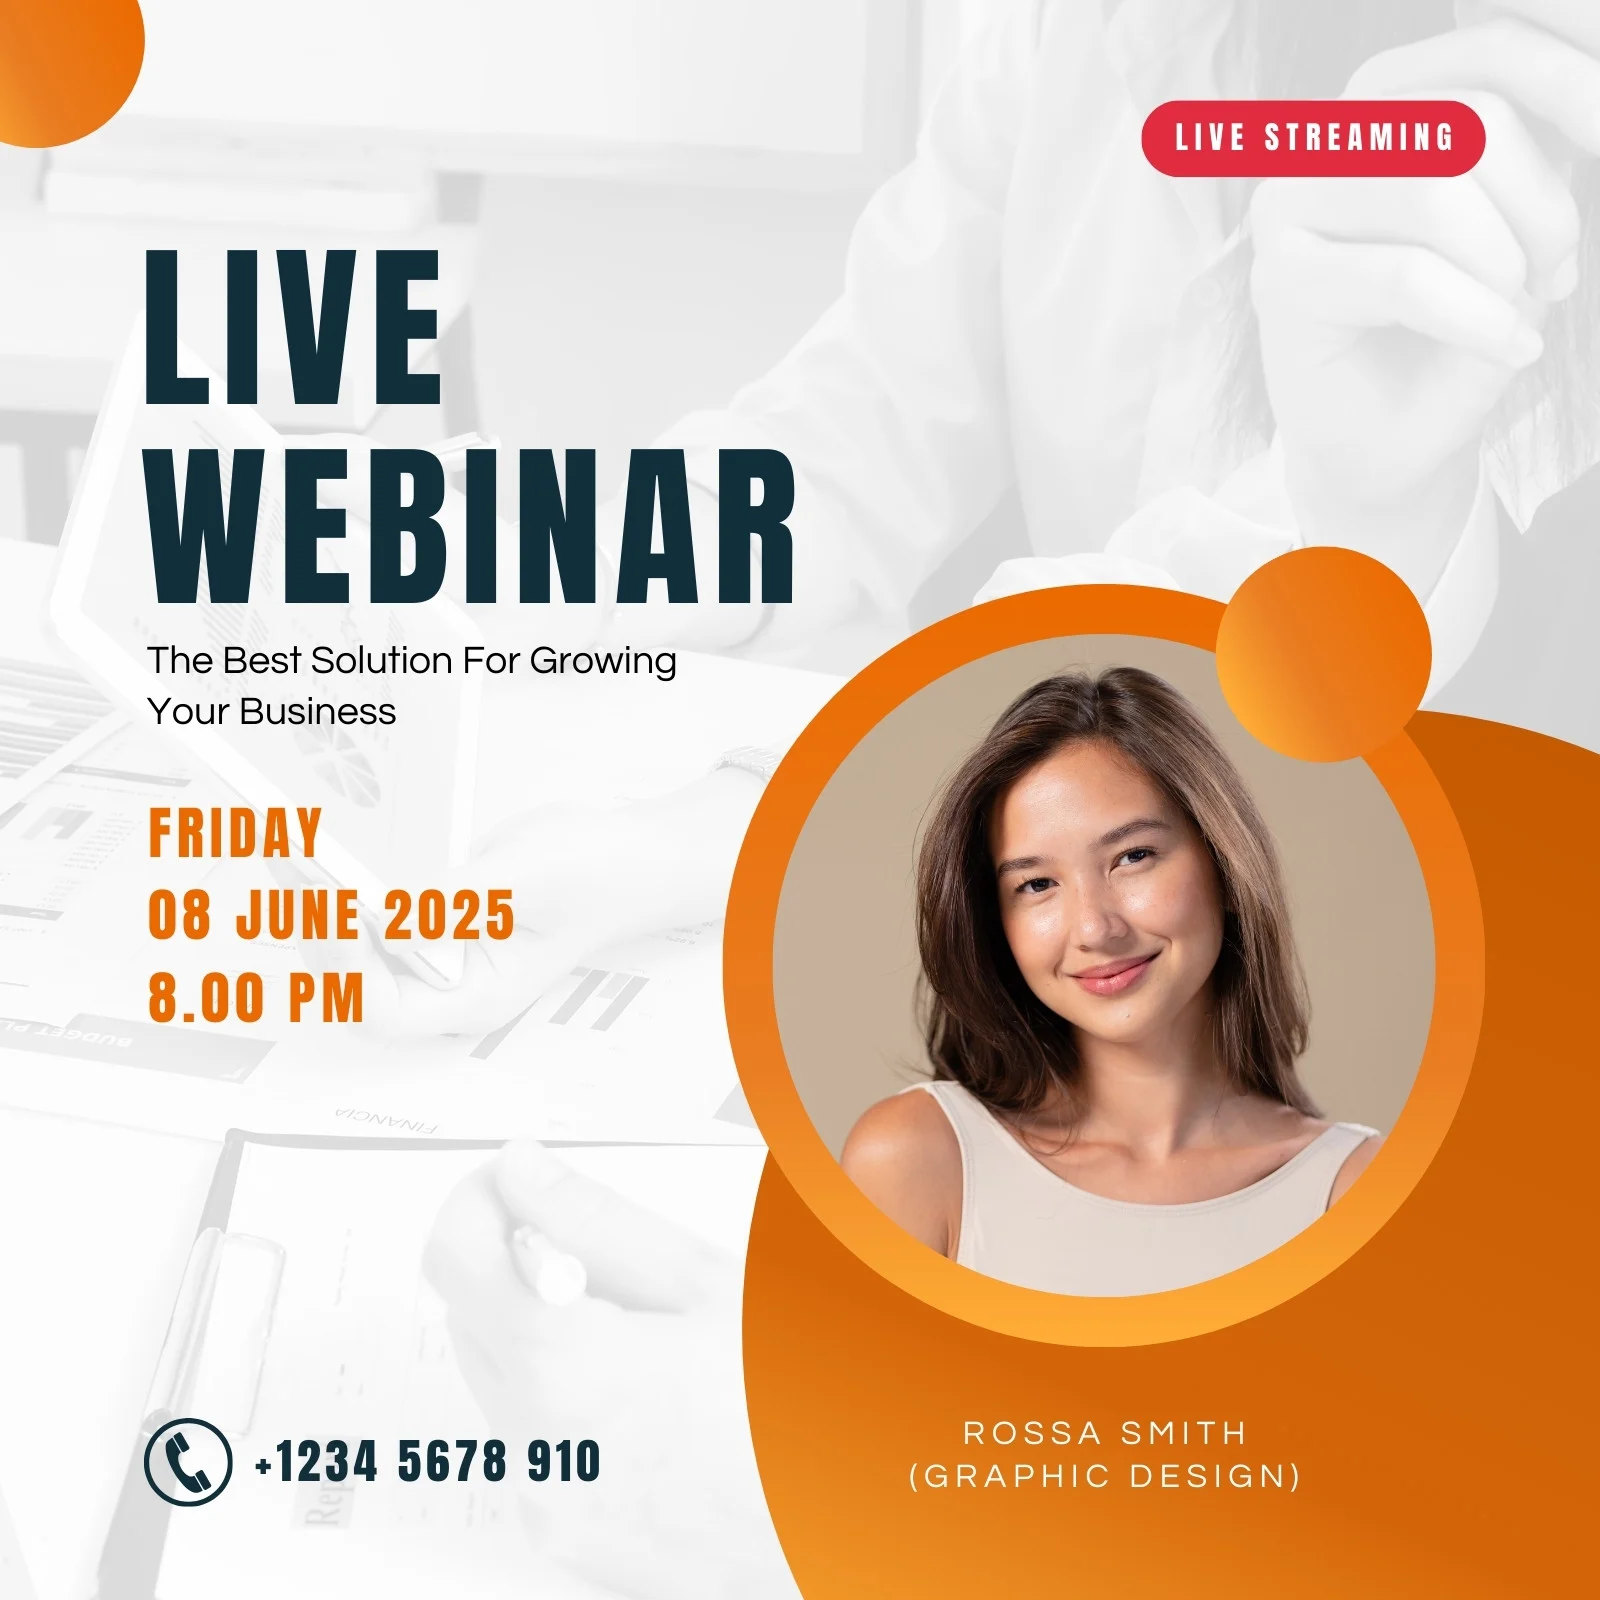
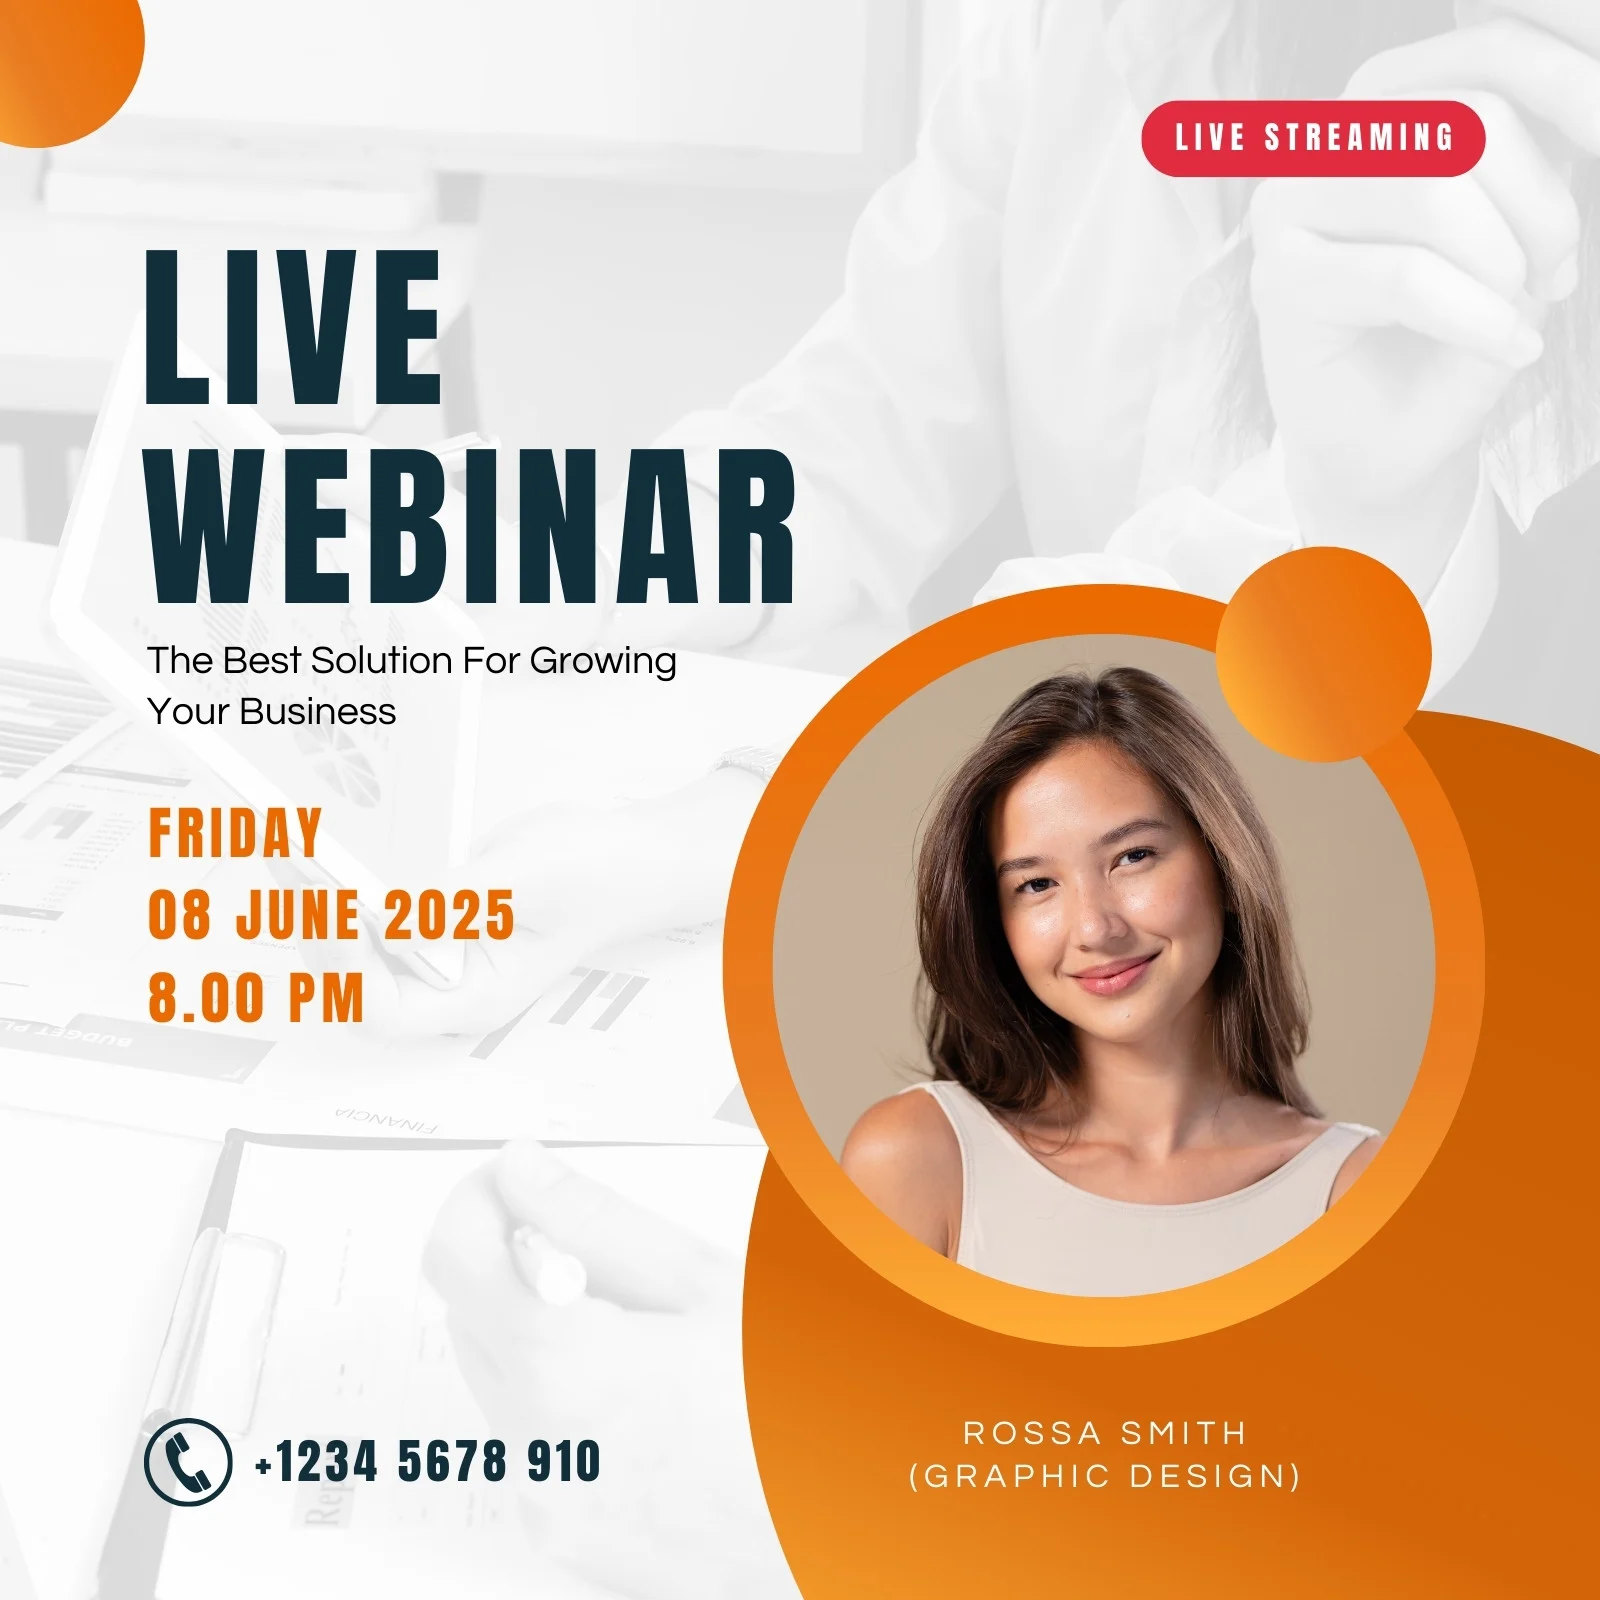
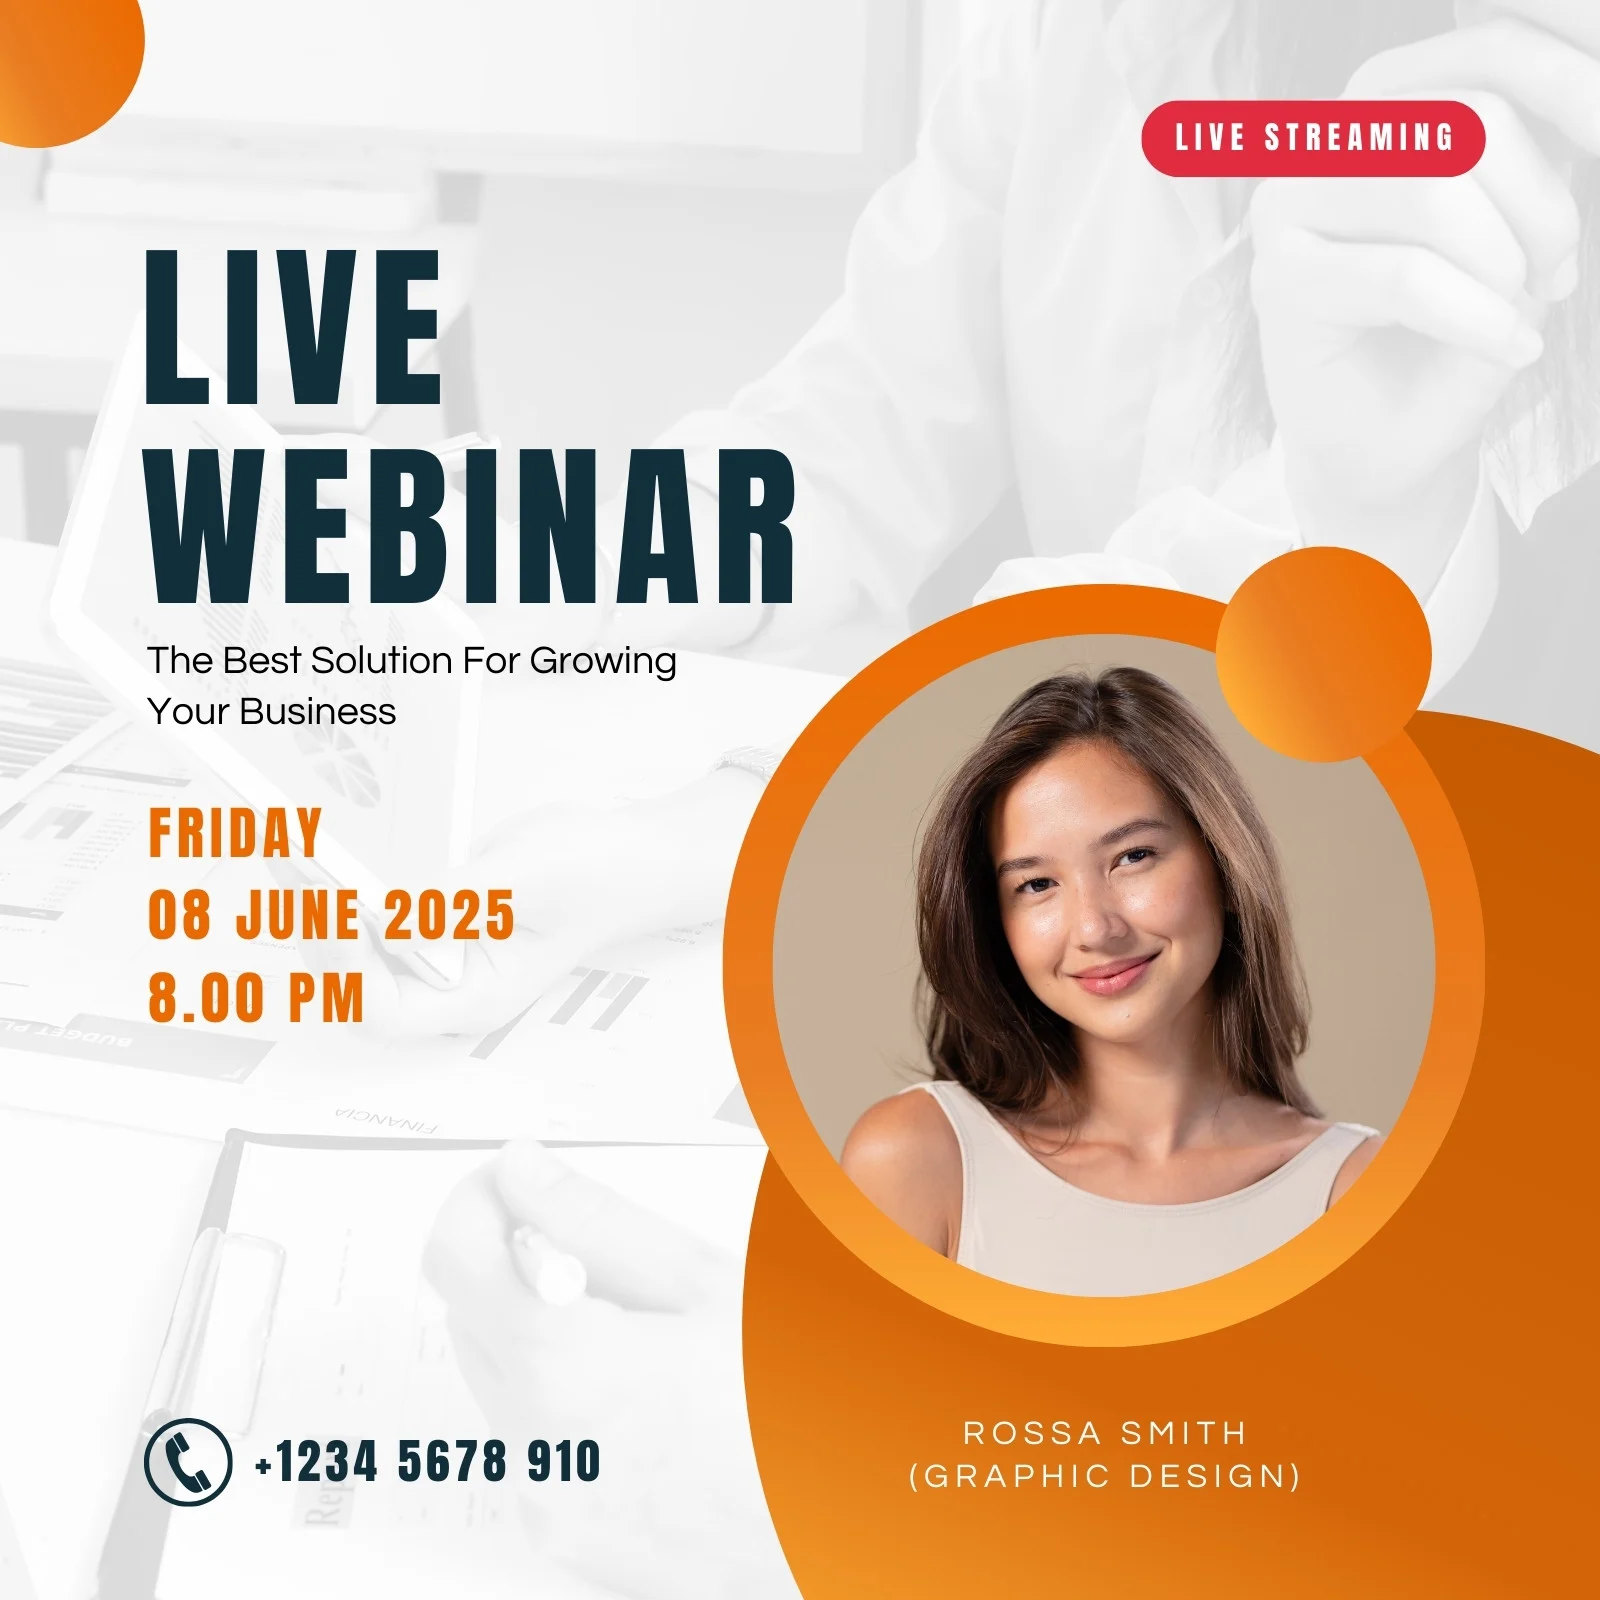

udFrRJ

Found 7 image files


14:47:13 - LiteLLM:DEBUG: main.py:6065 - openai.py: Received openai error - Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
14:47:13 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


14:47:13 - LiteLLM:DEBUG: exception_mapping_utils.py:2302 - Logging Details: logger_fn - None | callable(logger_fn) - False
14:47:13 - LiteLLM:DEBUG: litellm_logging.py:2540 - Logging Details LiteLLM-Failure Call: []



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:14 - LiteLLM:DEBUG: utils.py:366 - 

14:47:14 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:14 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
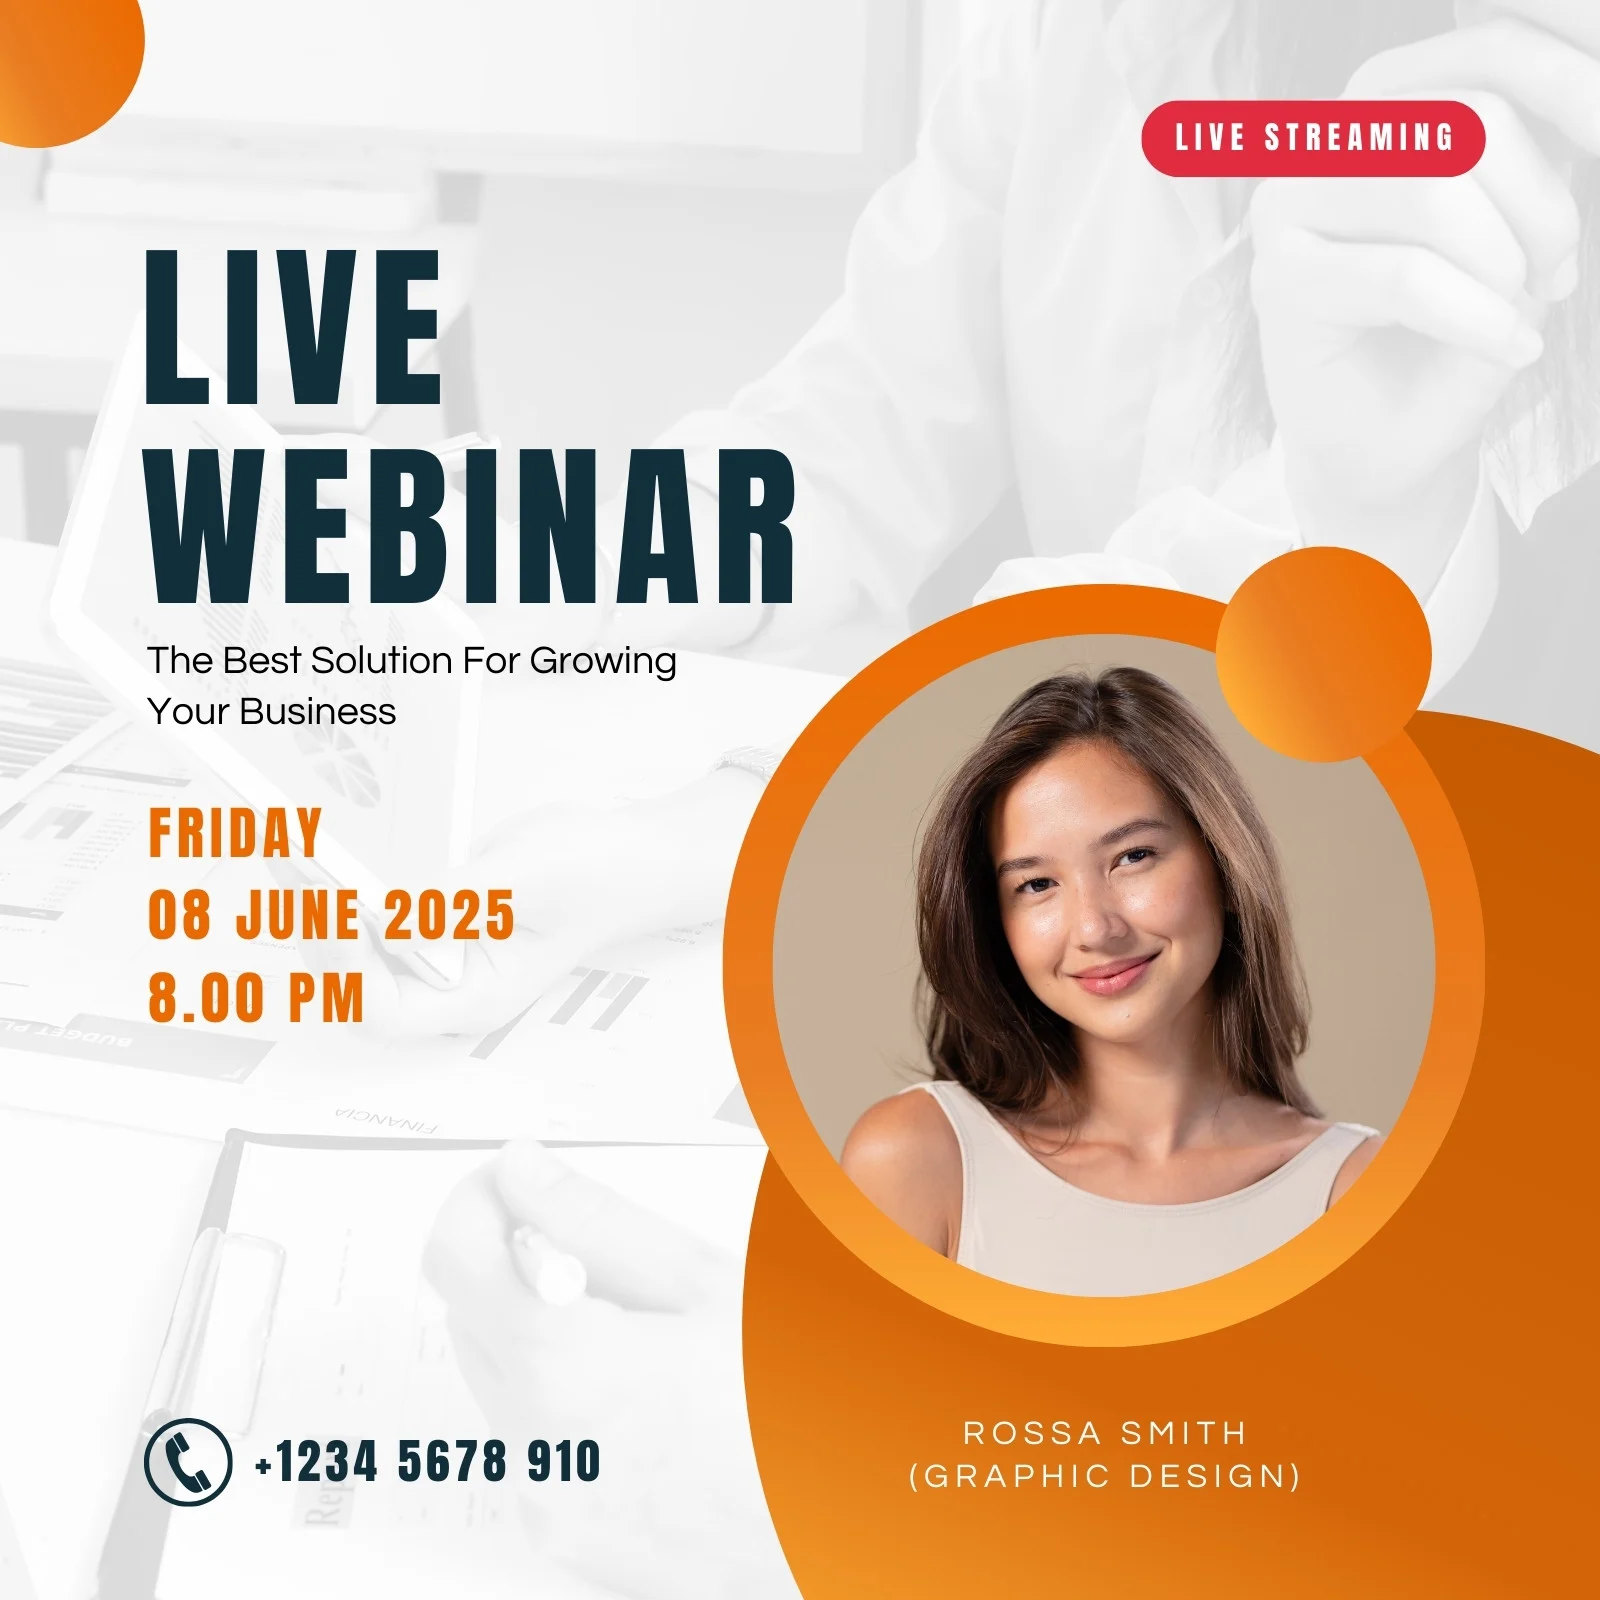
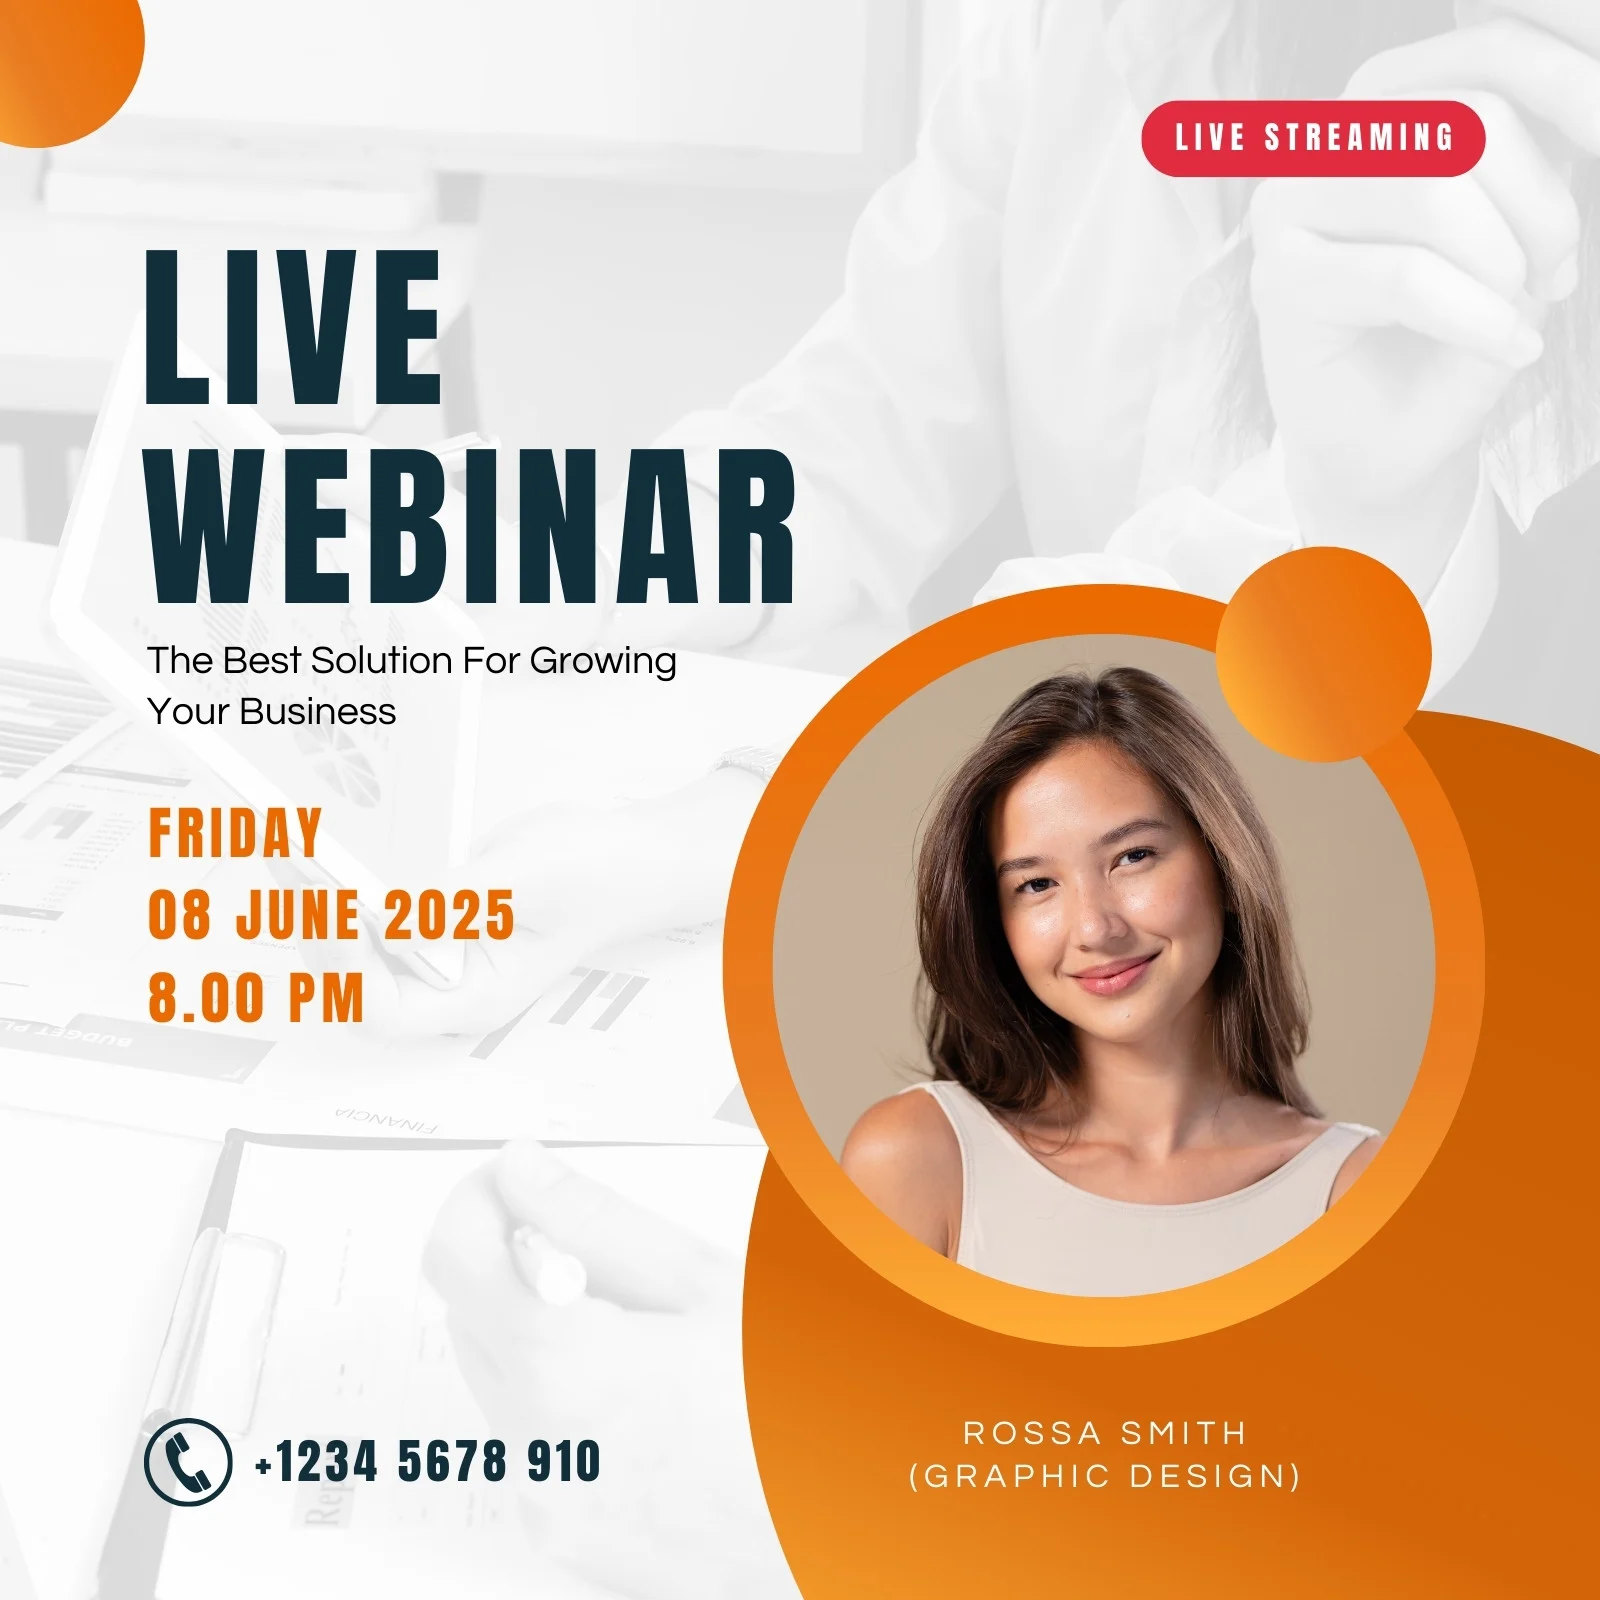
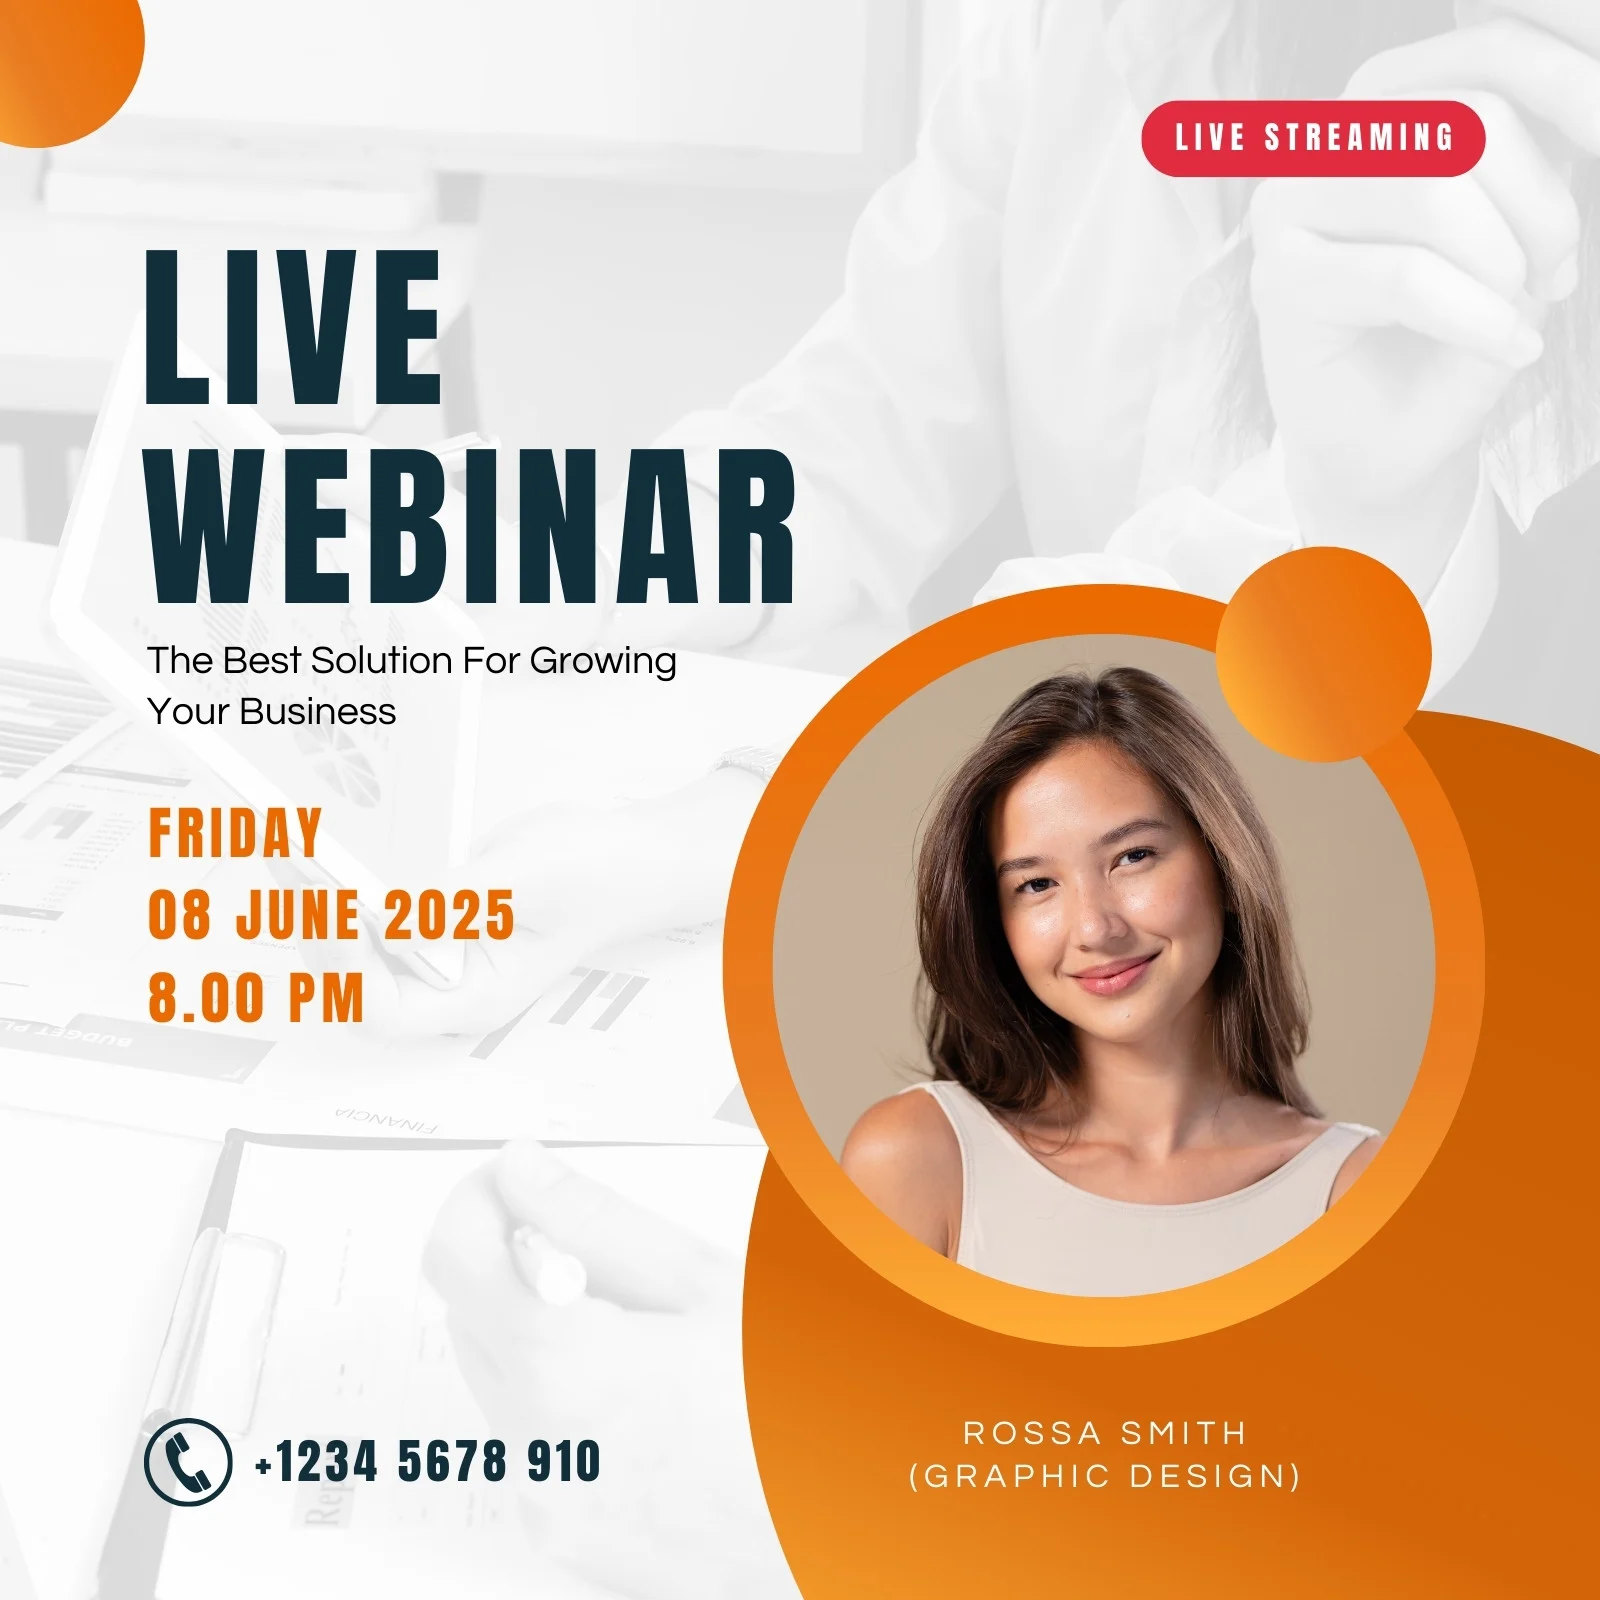


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:17 - LiteLLM:DEBUG: utils.py:366 - 

14:47:17 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:17 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
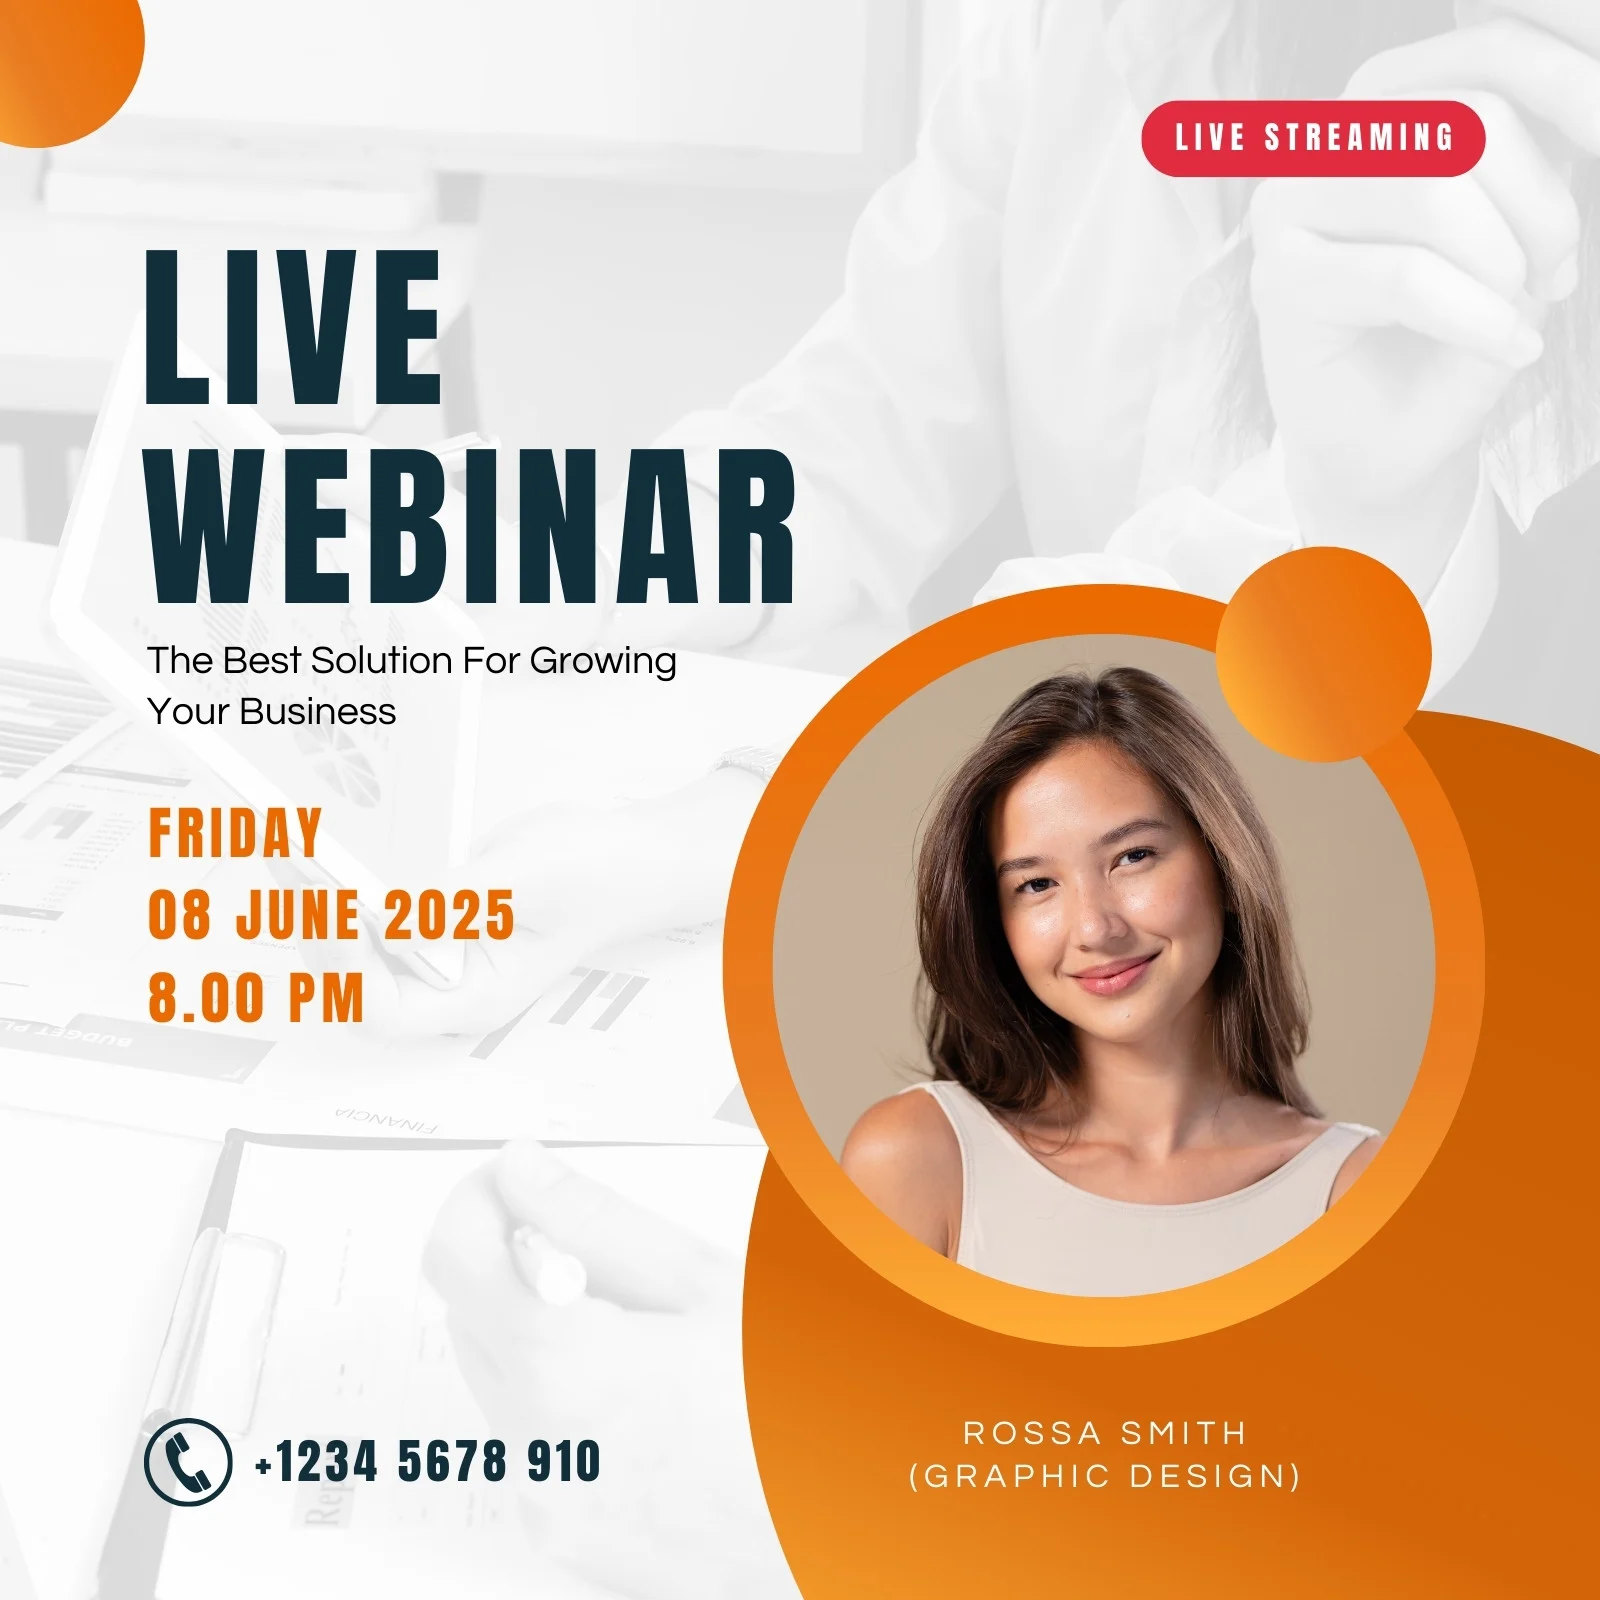
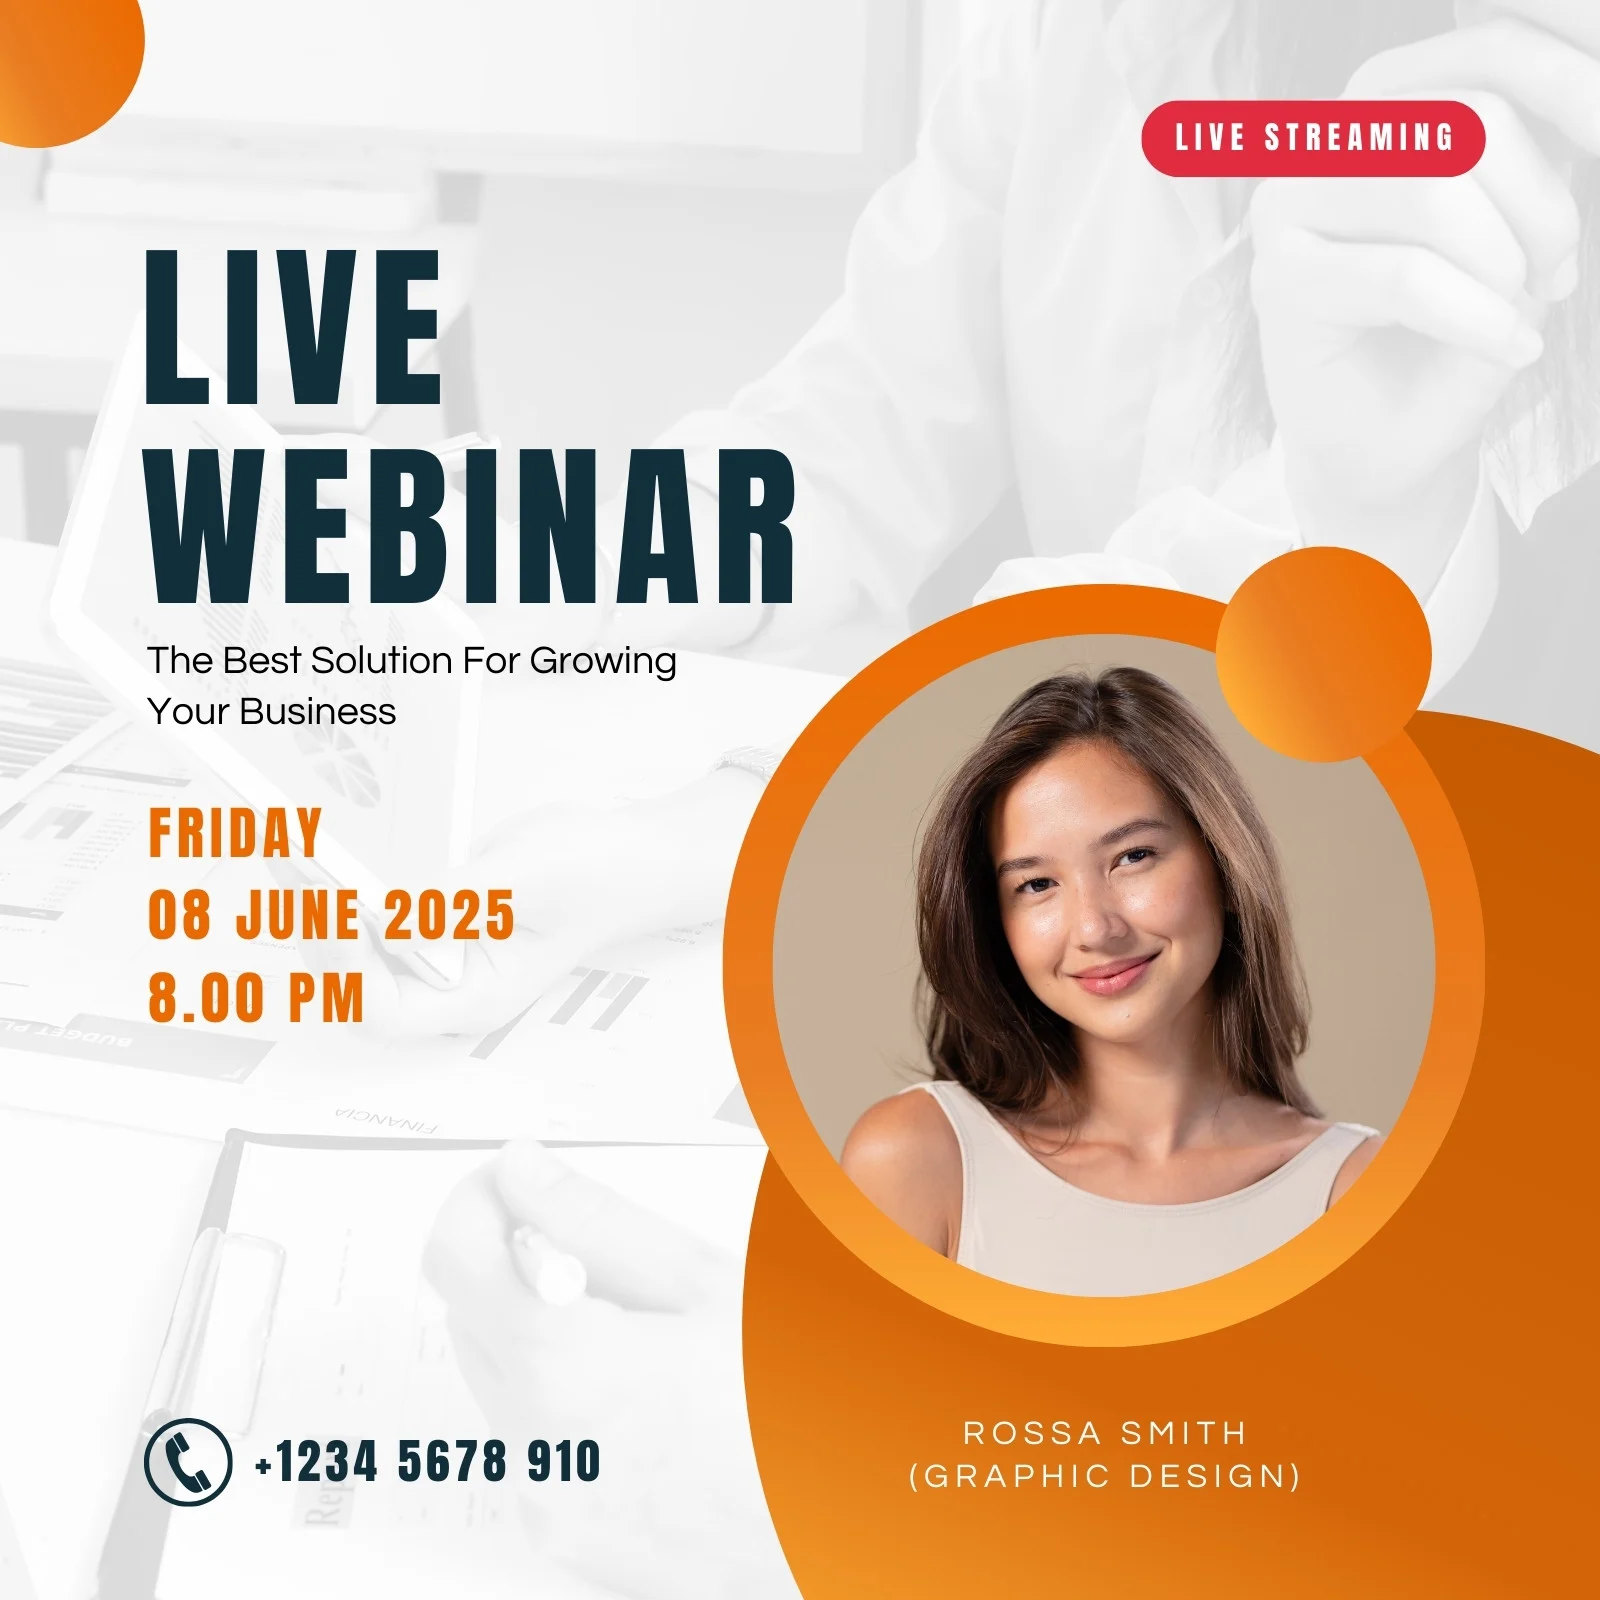
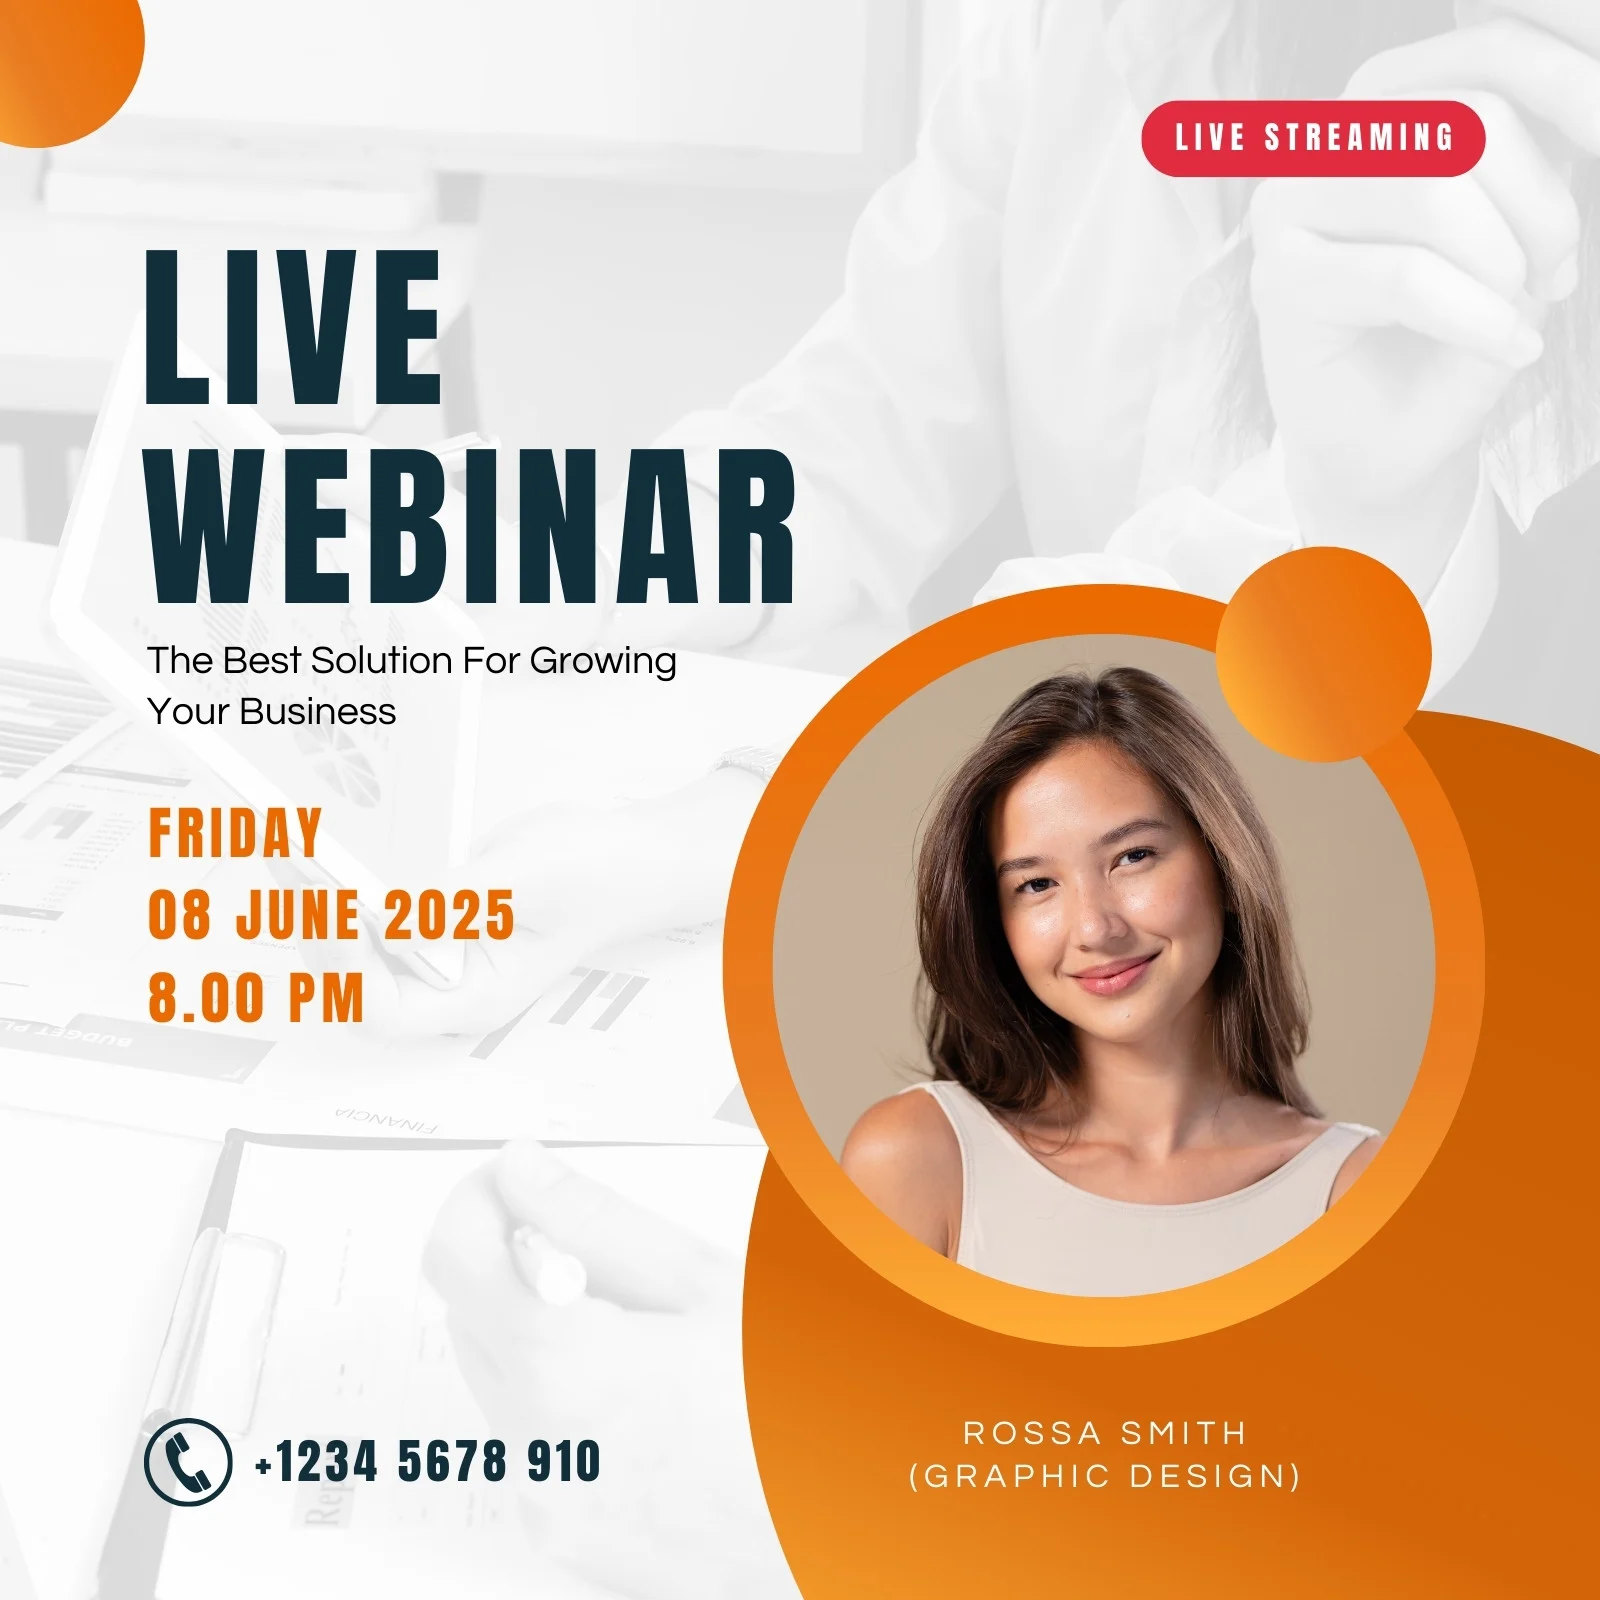


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:20 - LiteLLM:DEBUG: utils.py:366 - 

14:47:20 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:20 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
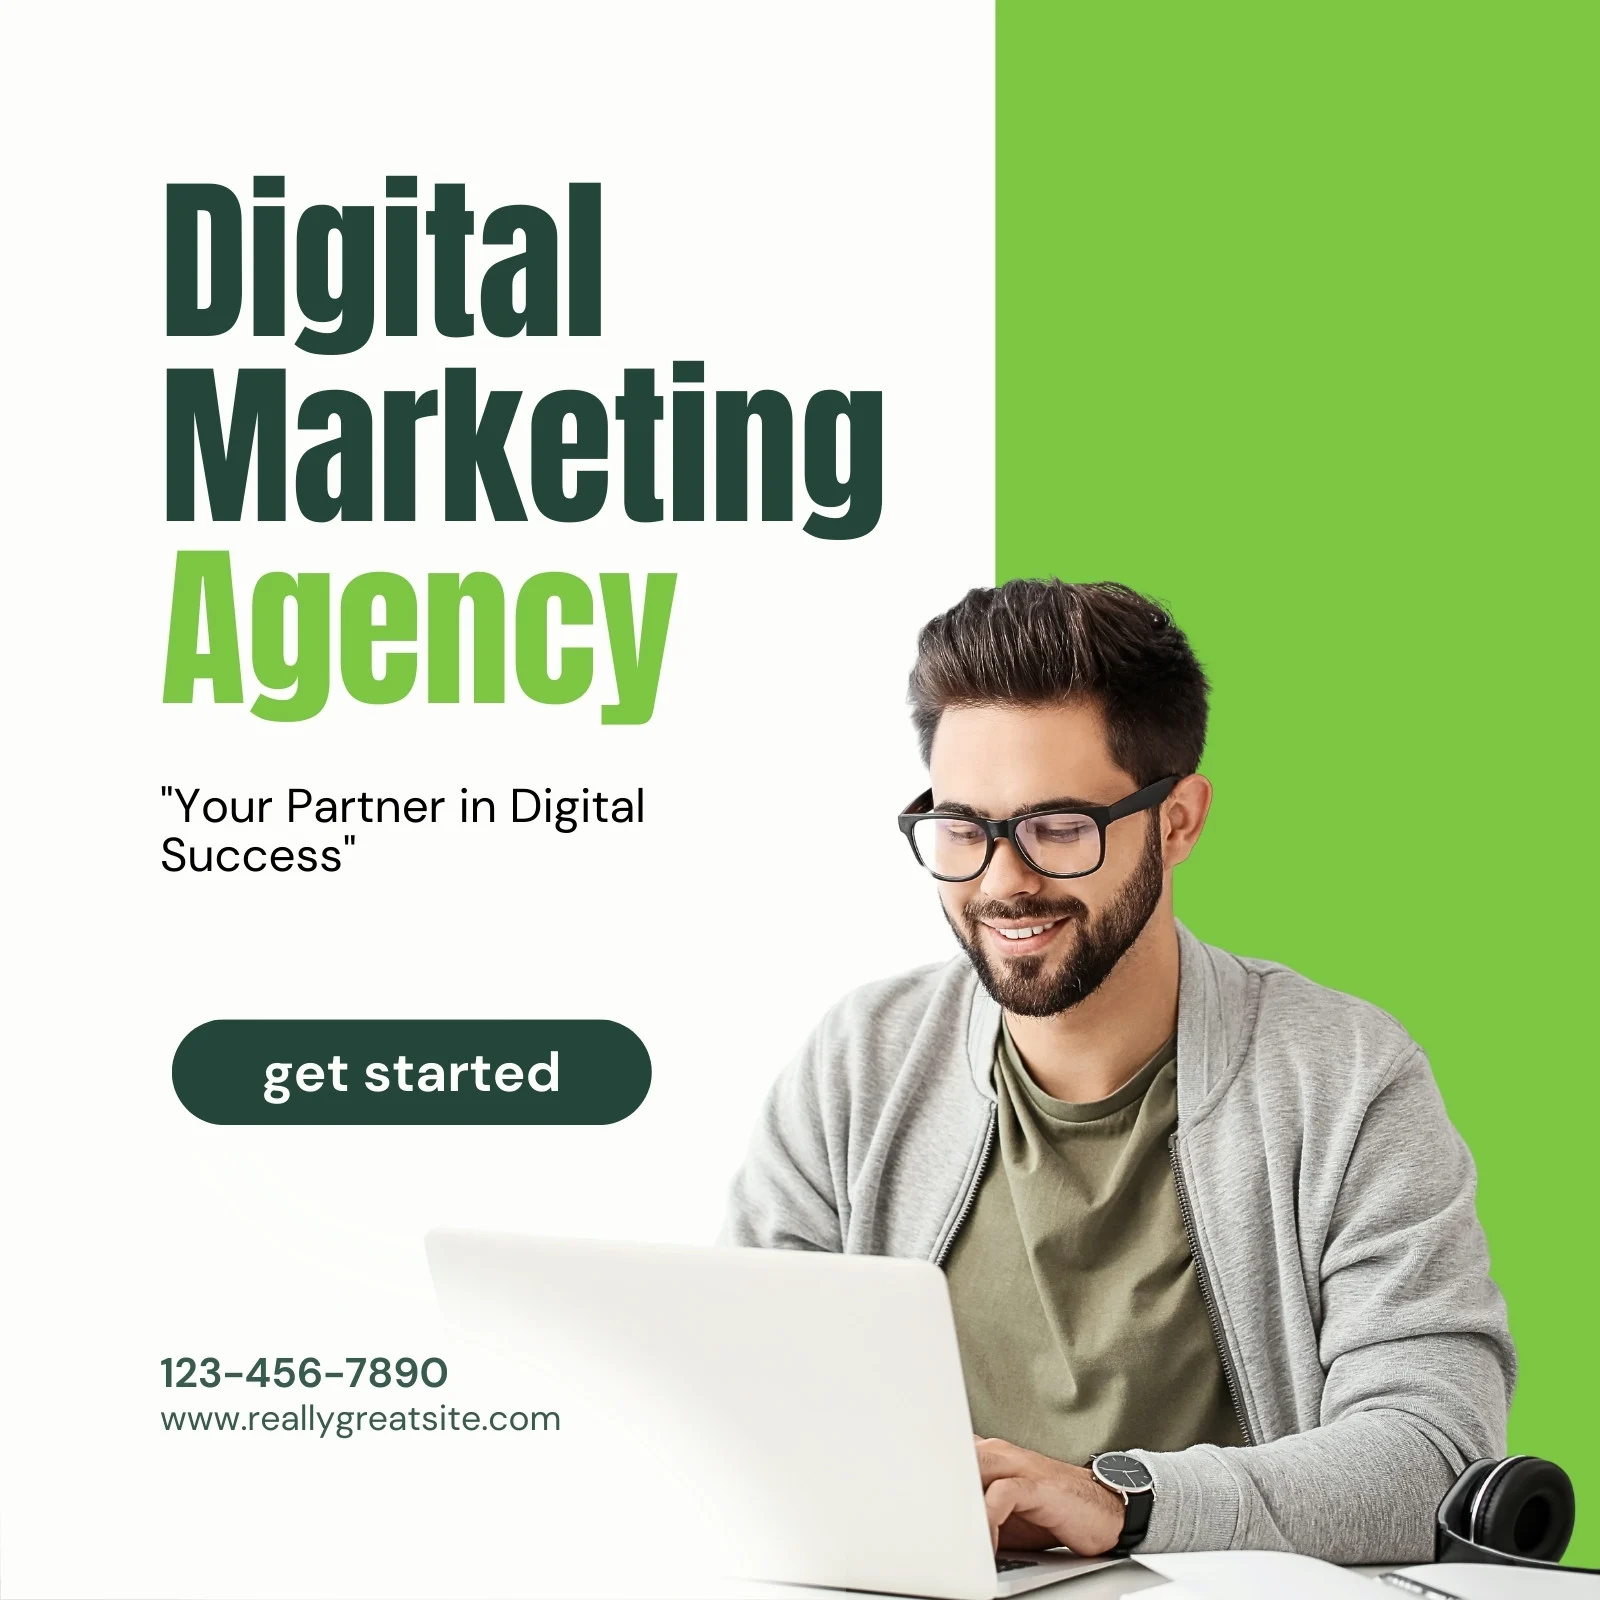
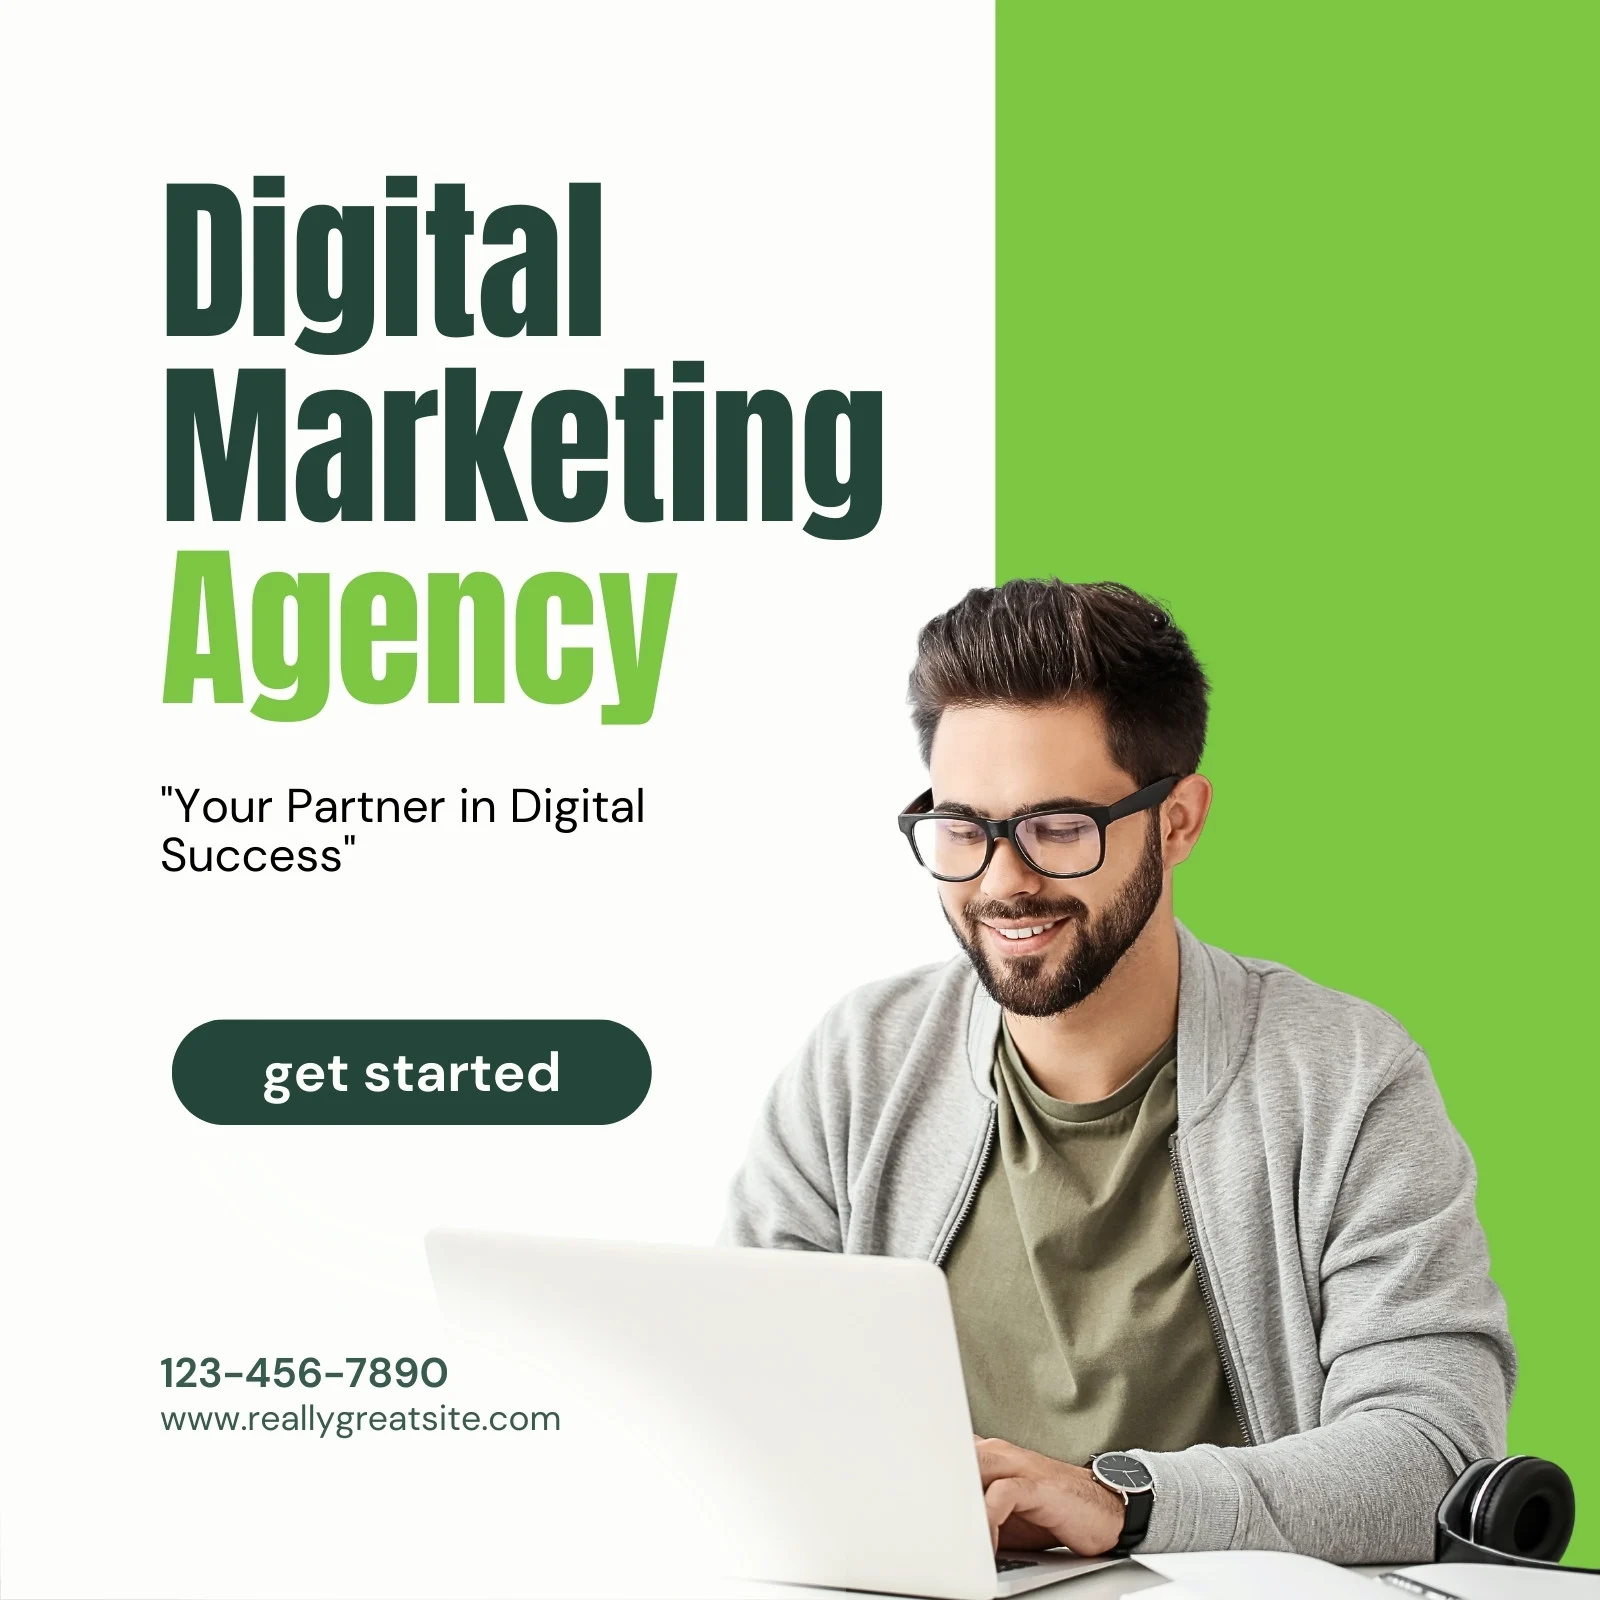
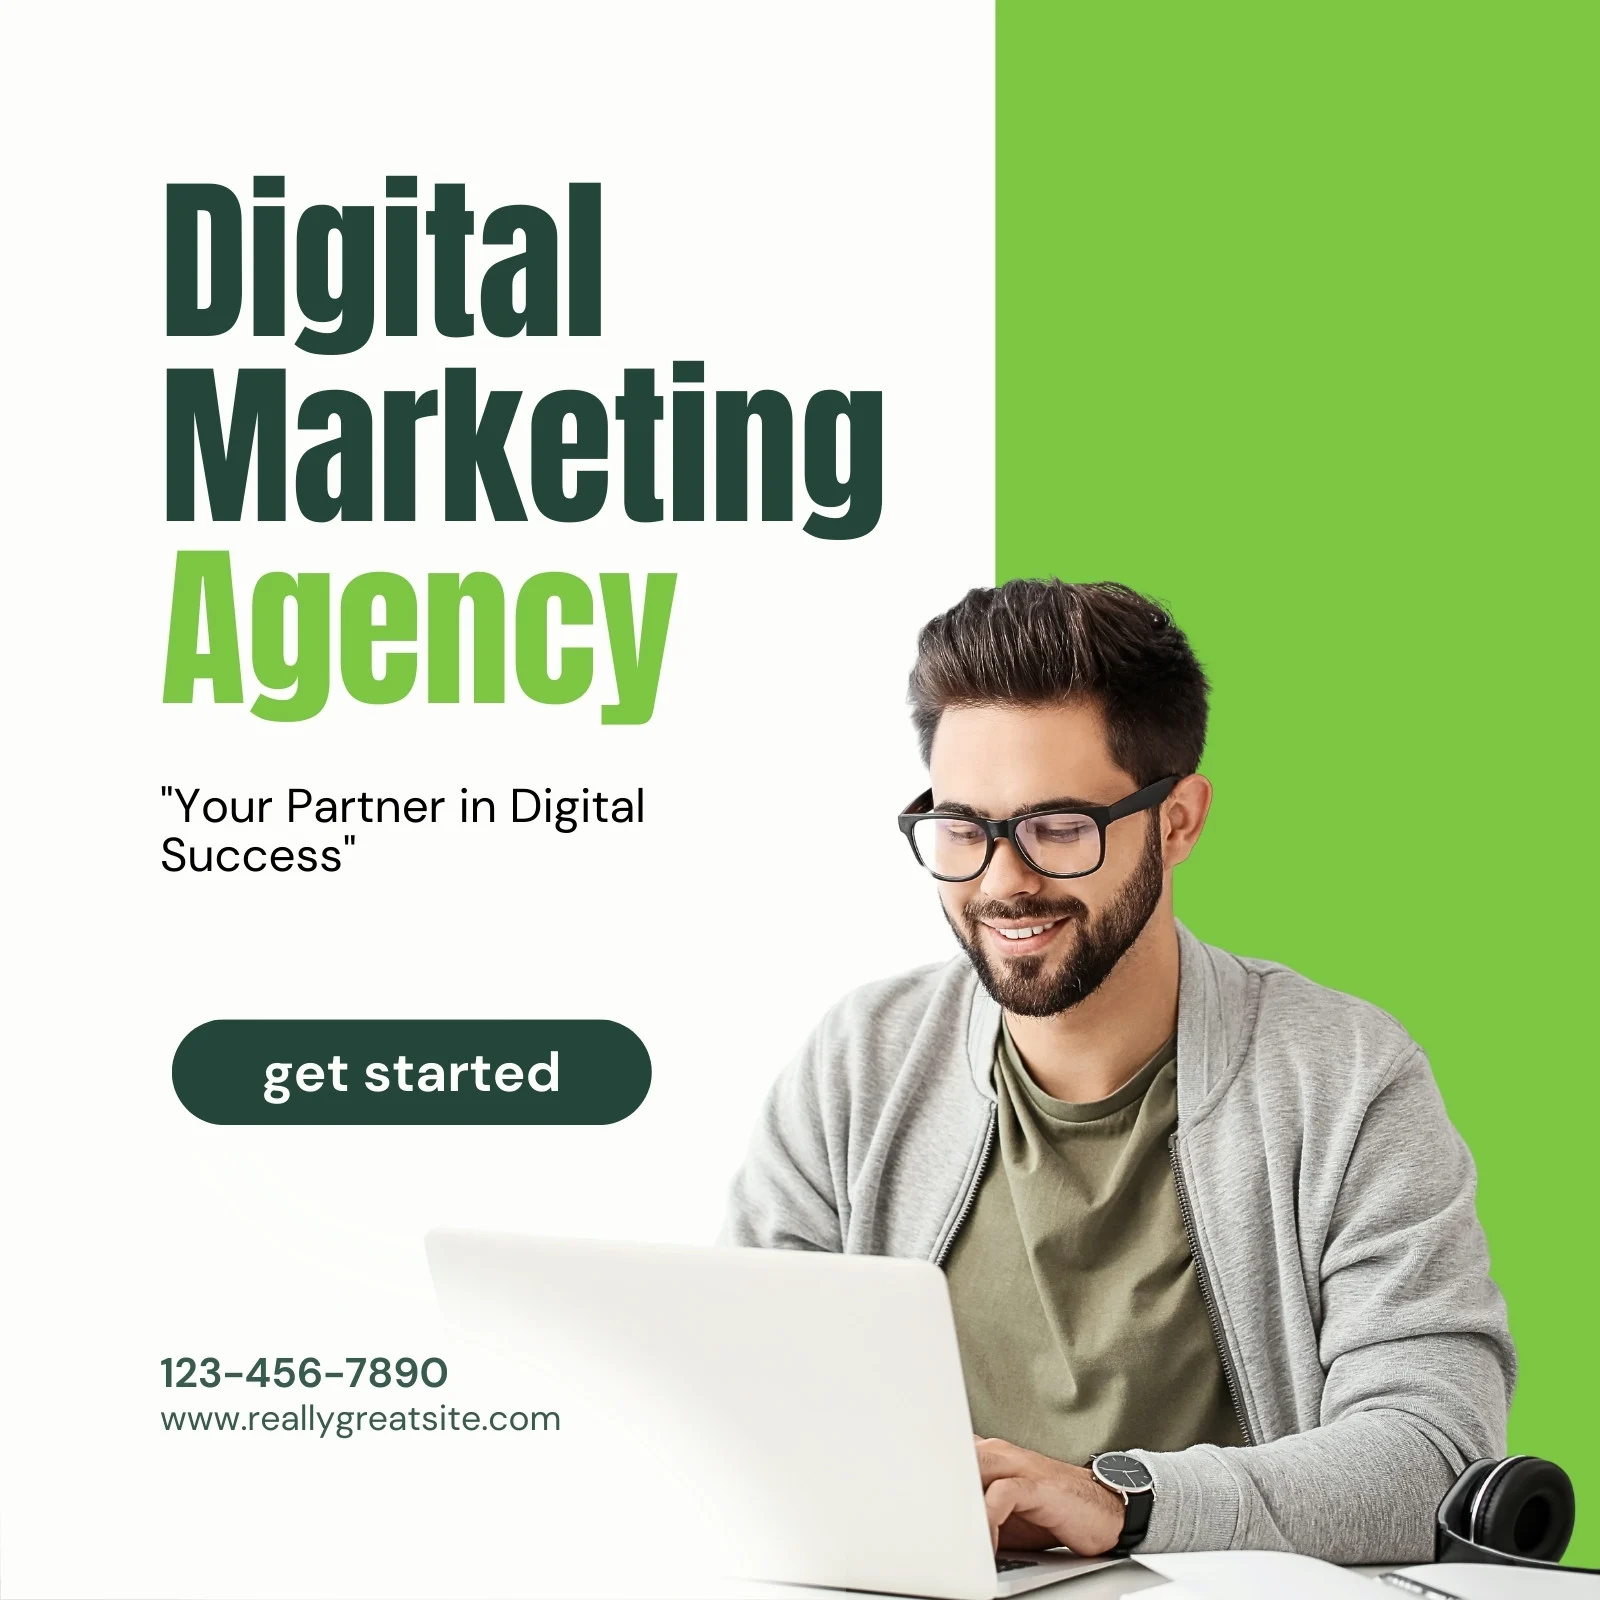

[0/7] ERROR 1600w-K18O8e4K488.webp: litellm.RateLimitError: RateLimitError: OpenAIException - You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.


14:47:22 - LiteLLM:DEBUG: main.py:6065 - openai.py: Received openai error - Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
14:47:22 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


14:47:22 - LiteLLM:DEBUG: exception_mapping_utils.py:2302 - Logging Details: logger_fn - None | callable(logger_fn) - False
14:47:22 - LiteLLM:DEBUG: litellm_logging.py:2540 - Logging Details LiteLLM-Failure Call: []



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:23 - LiteLLM:DEBUG: utils.py:366 - 

14:47:23 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:23 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
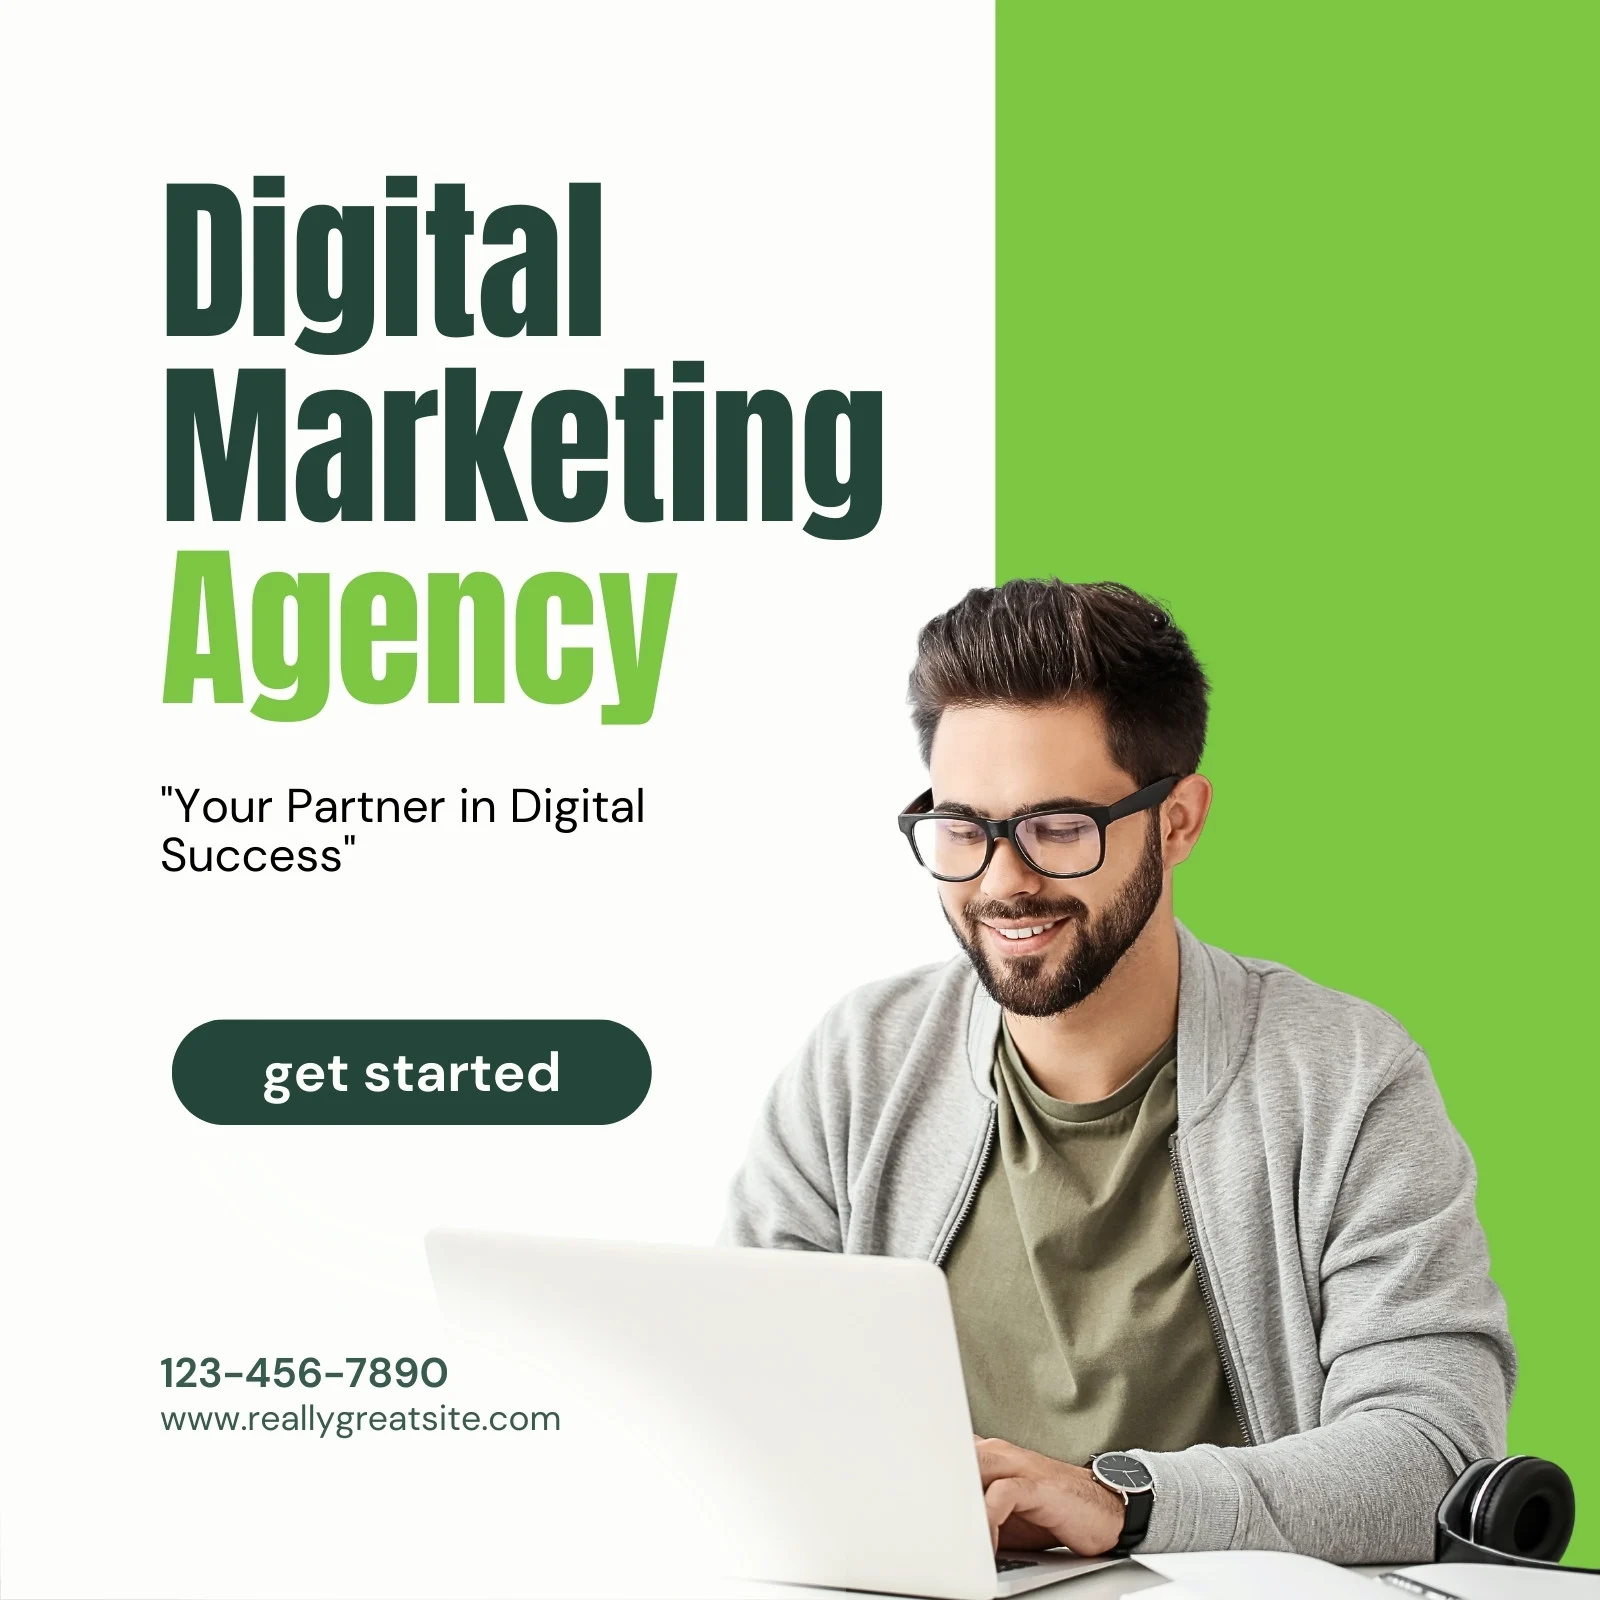
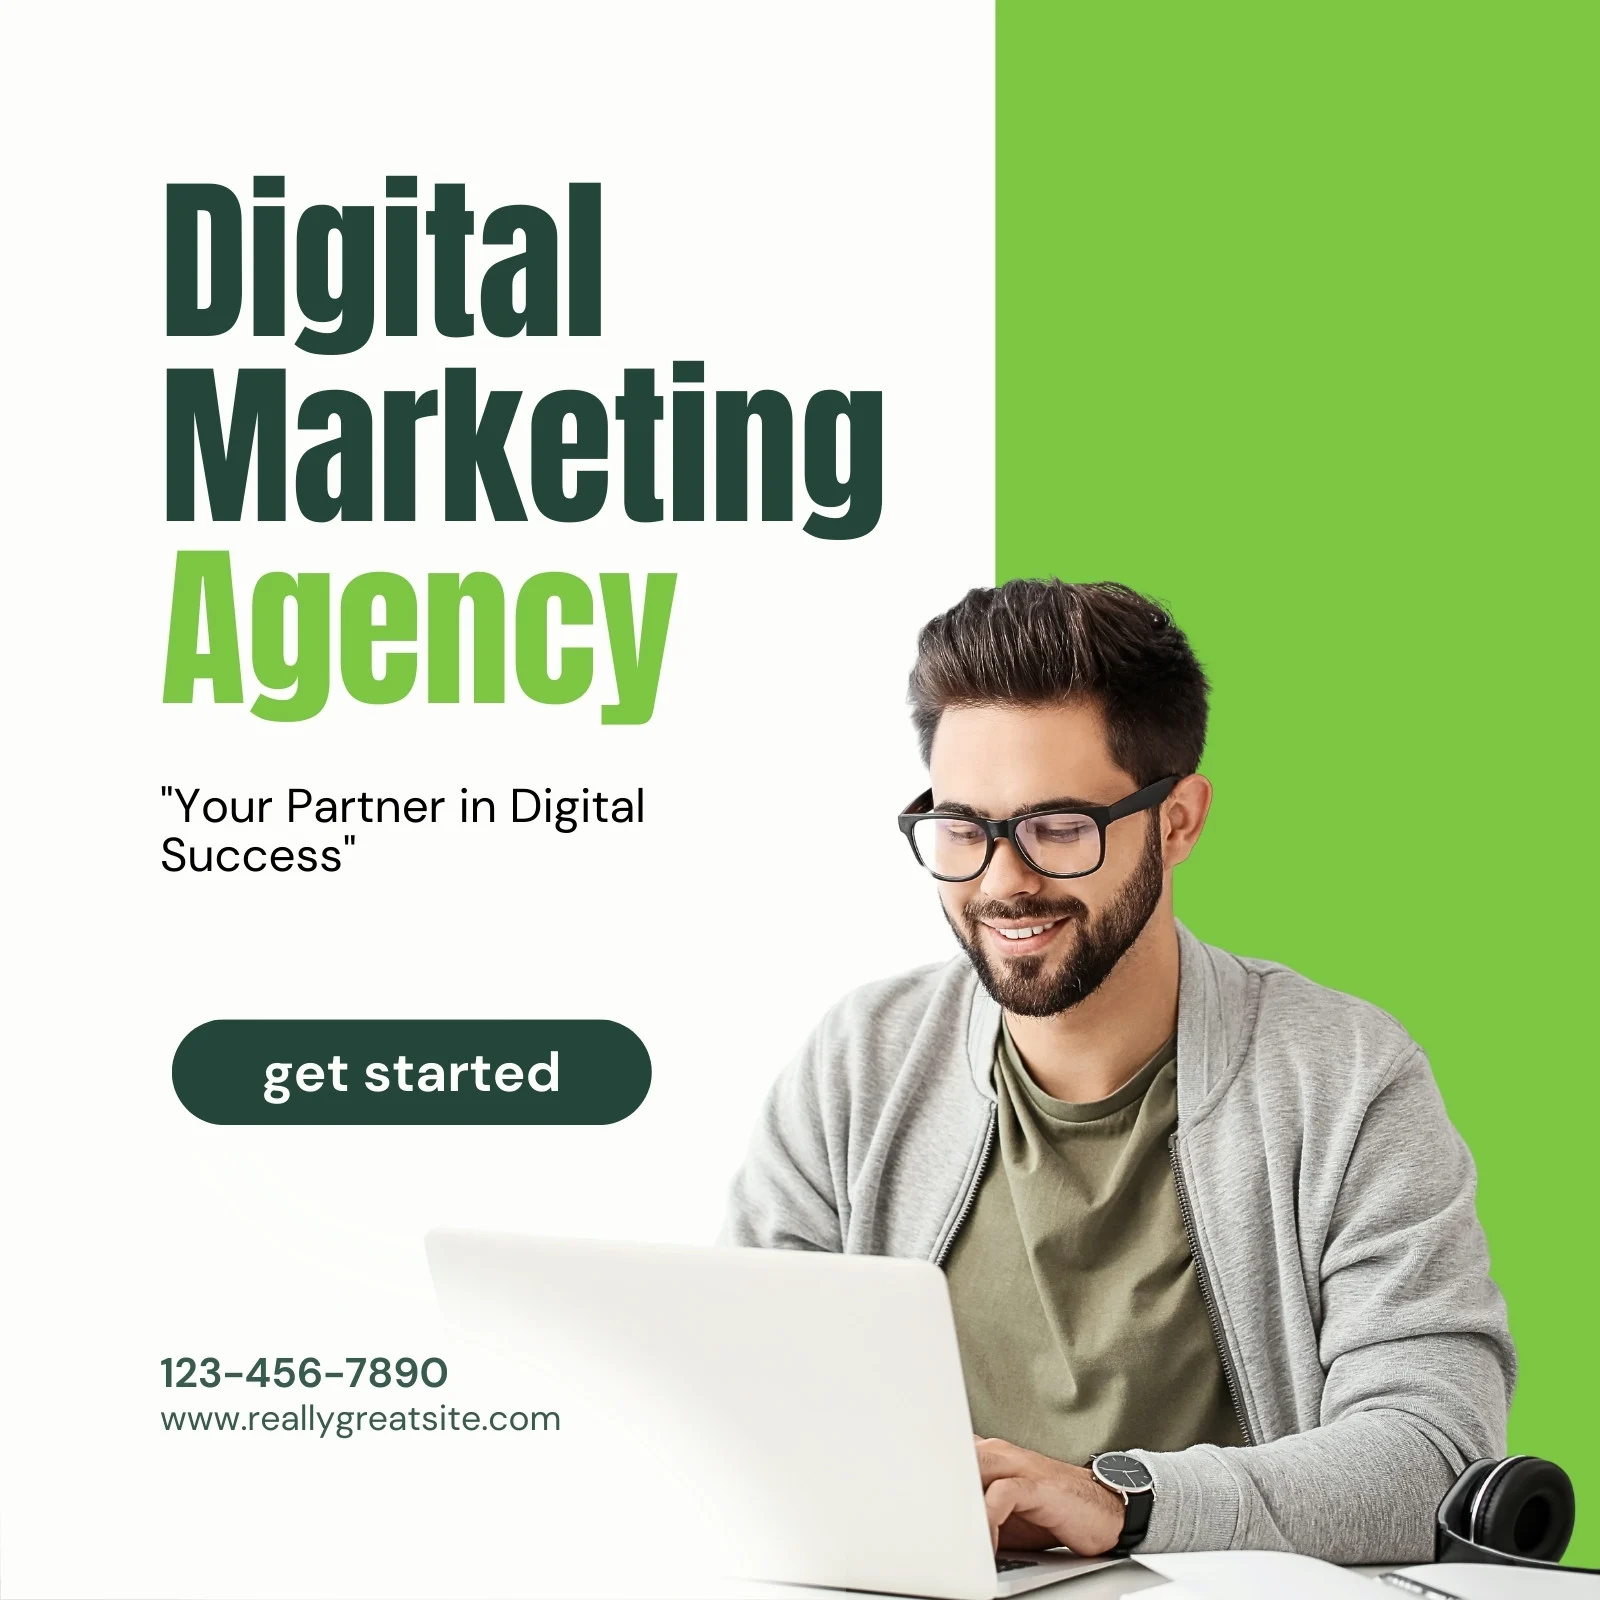
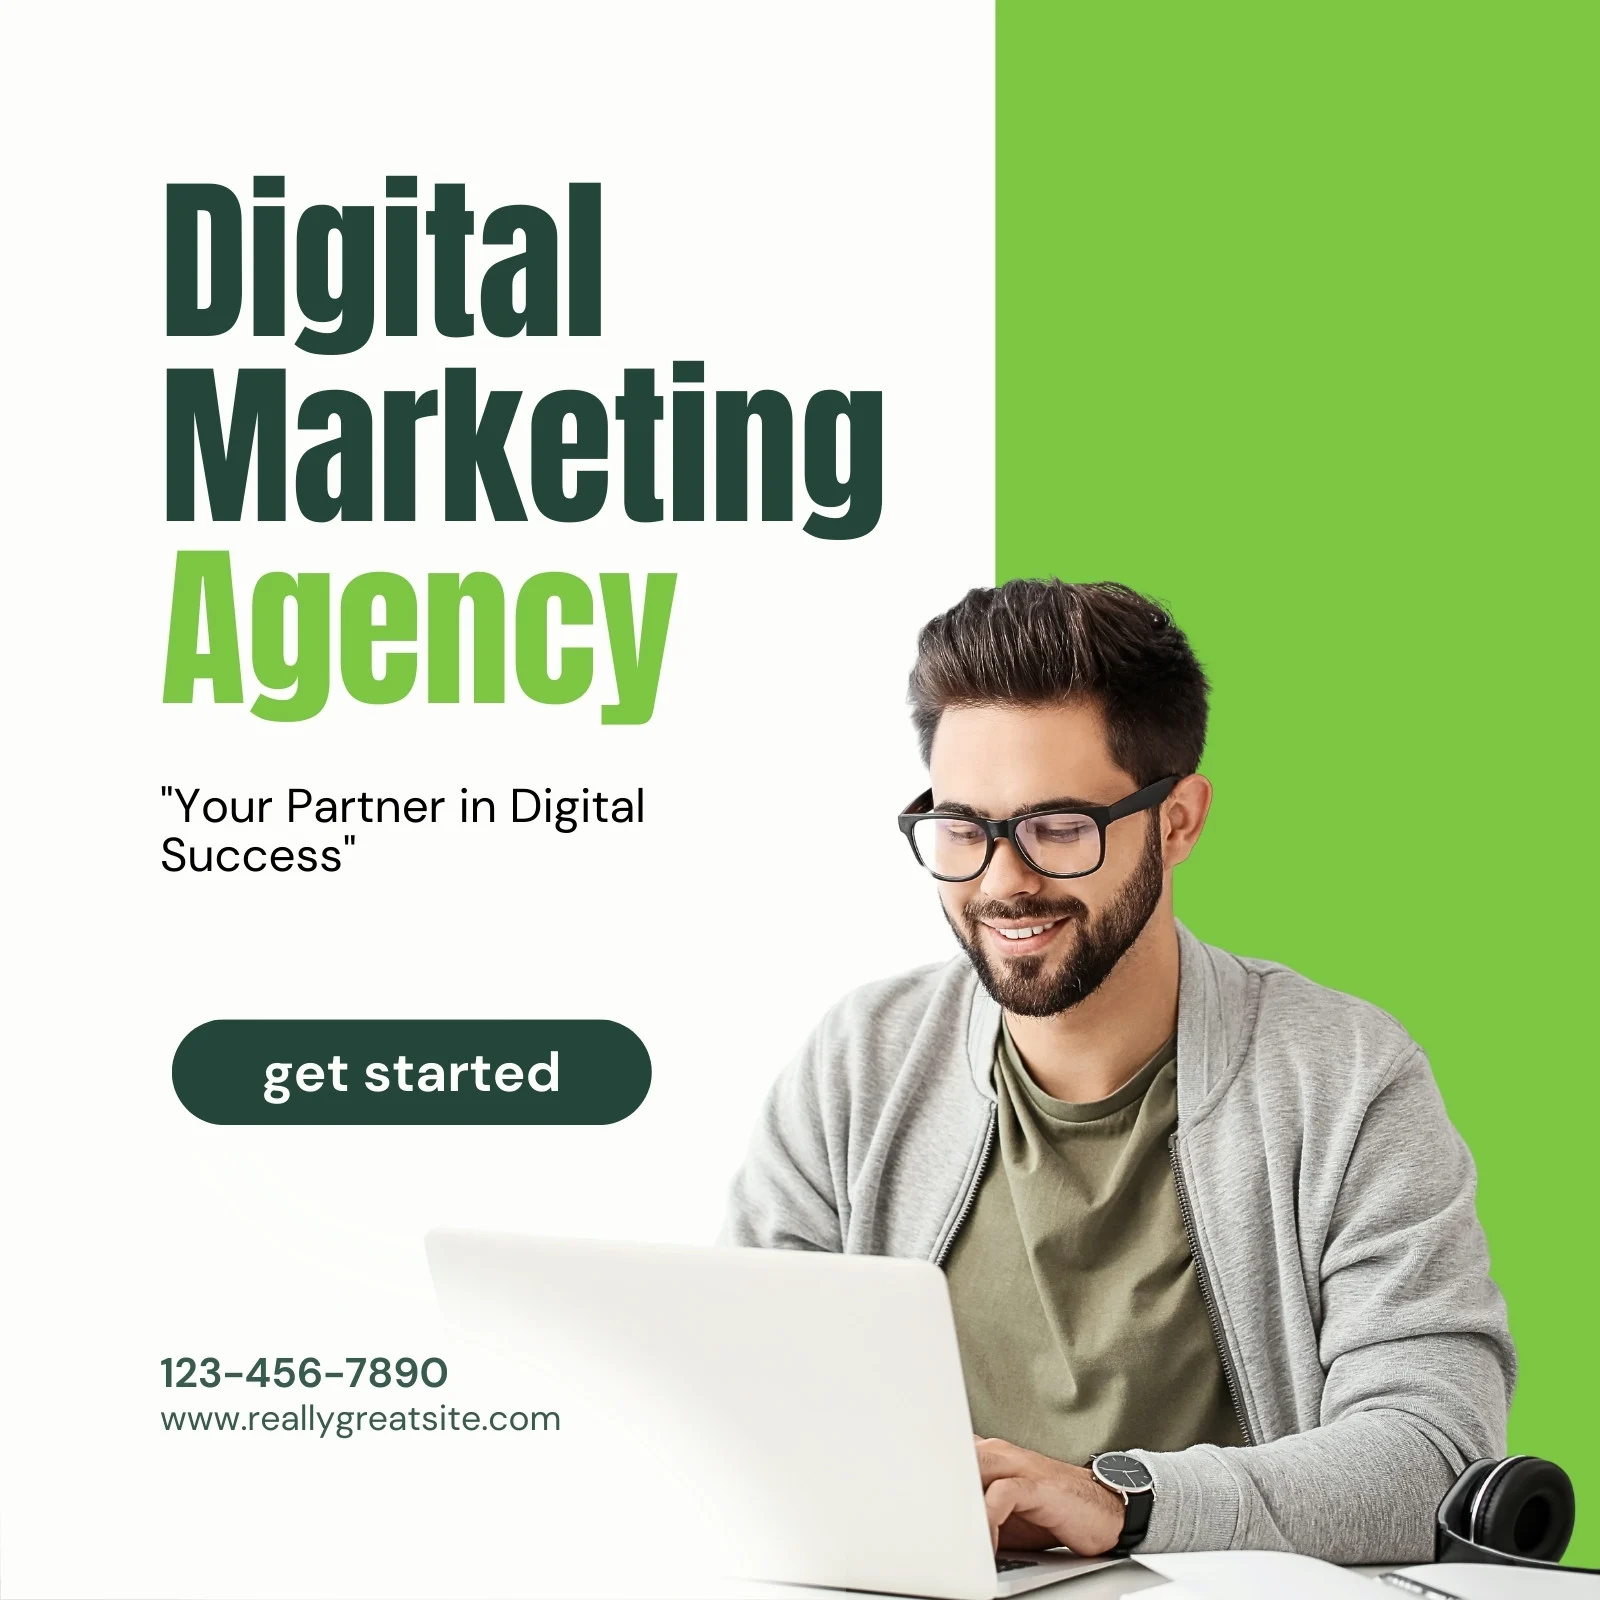


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:26 - LiteLLM:DEBUG: utils.py:366 - 

14:47:26 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:26 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
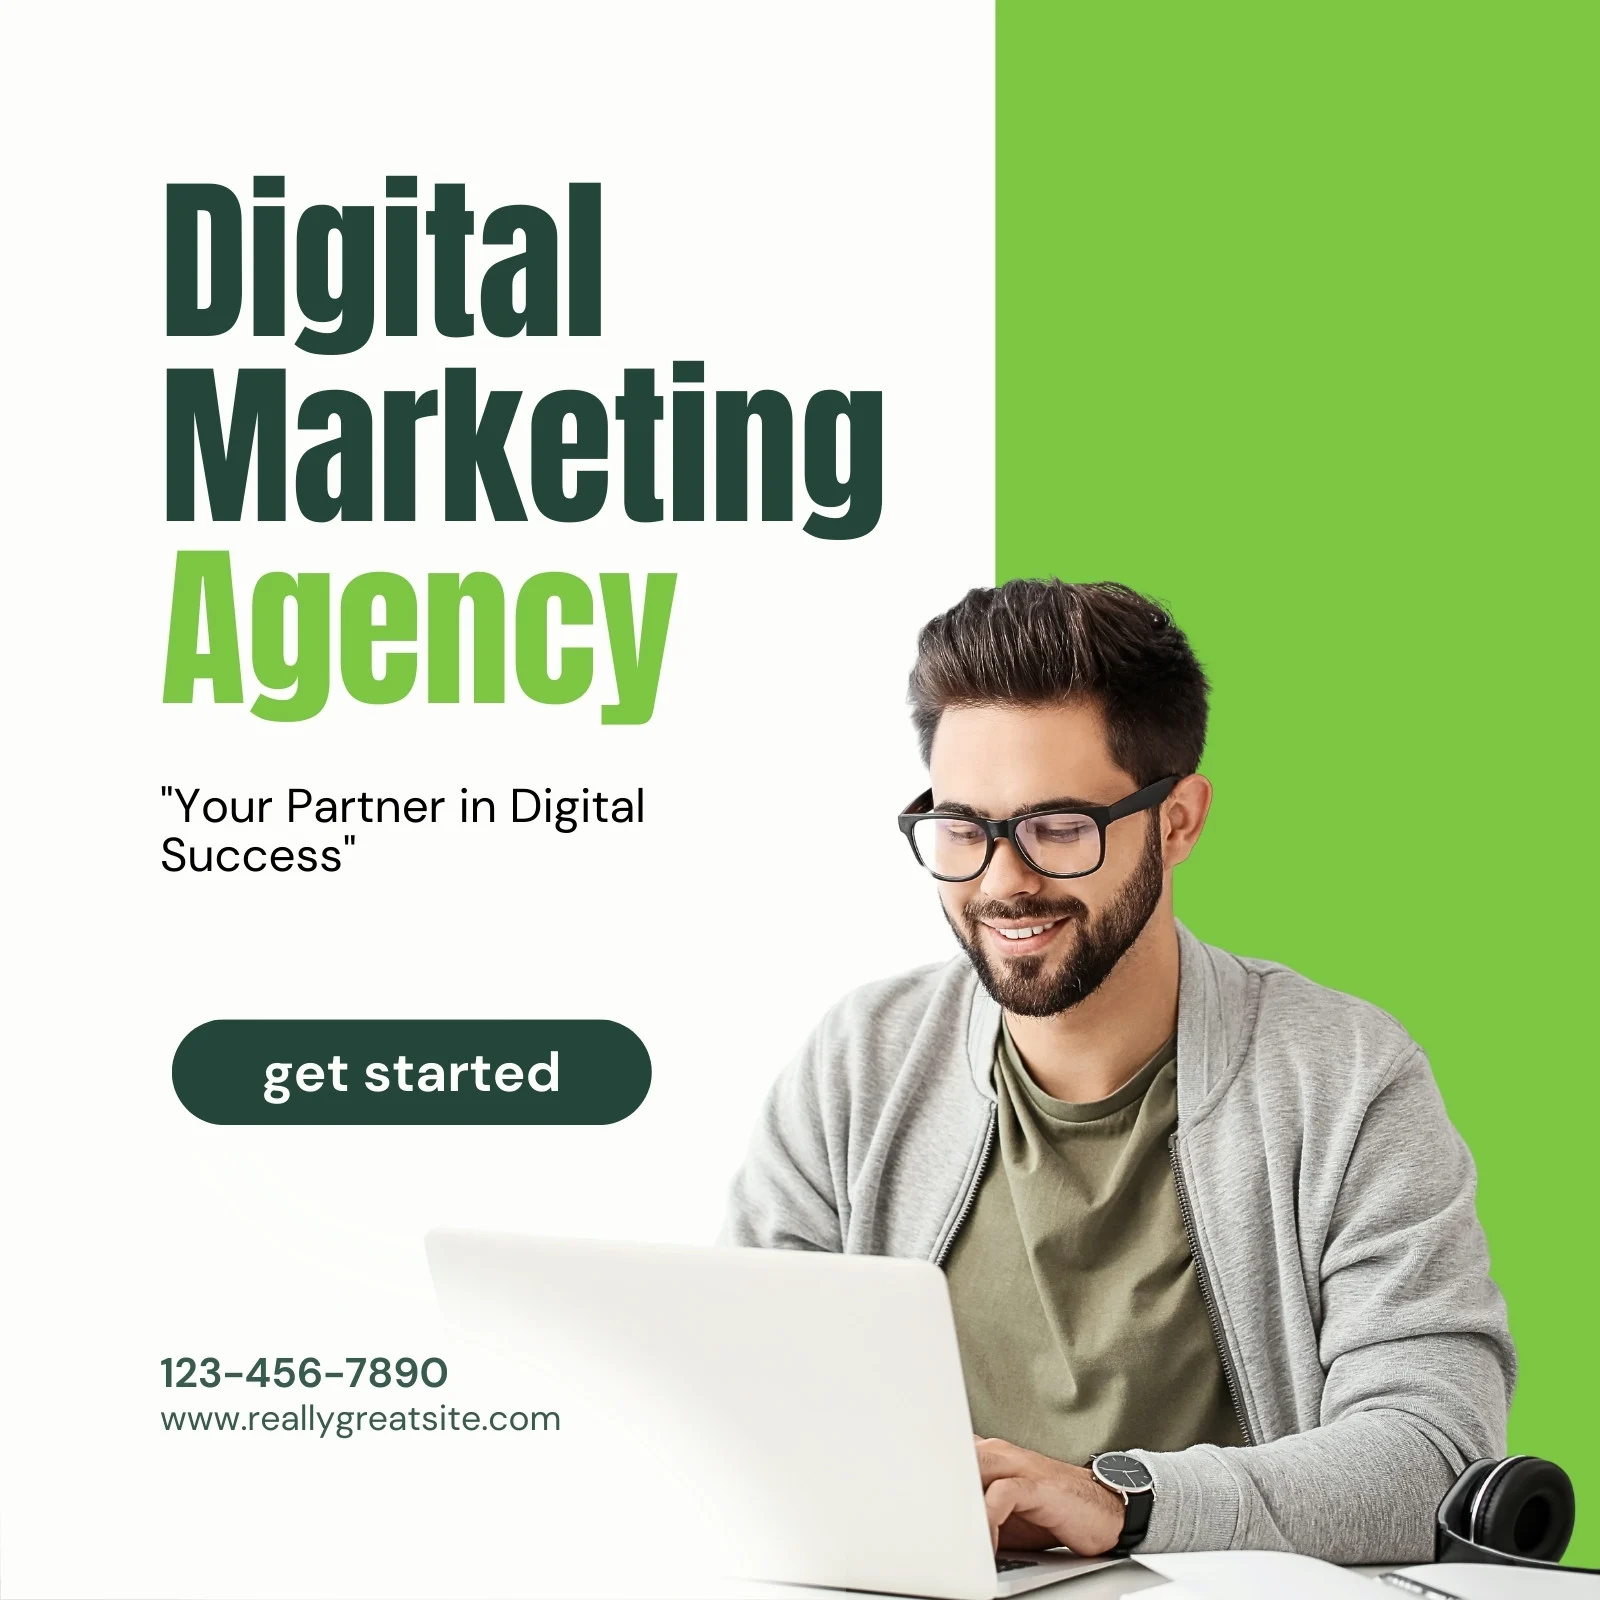
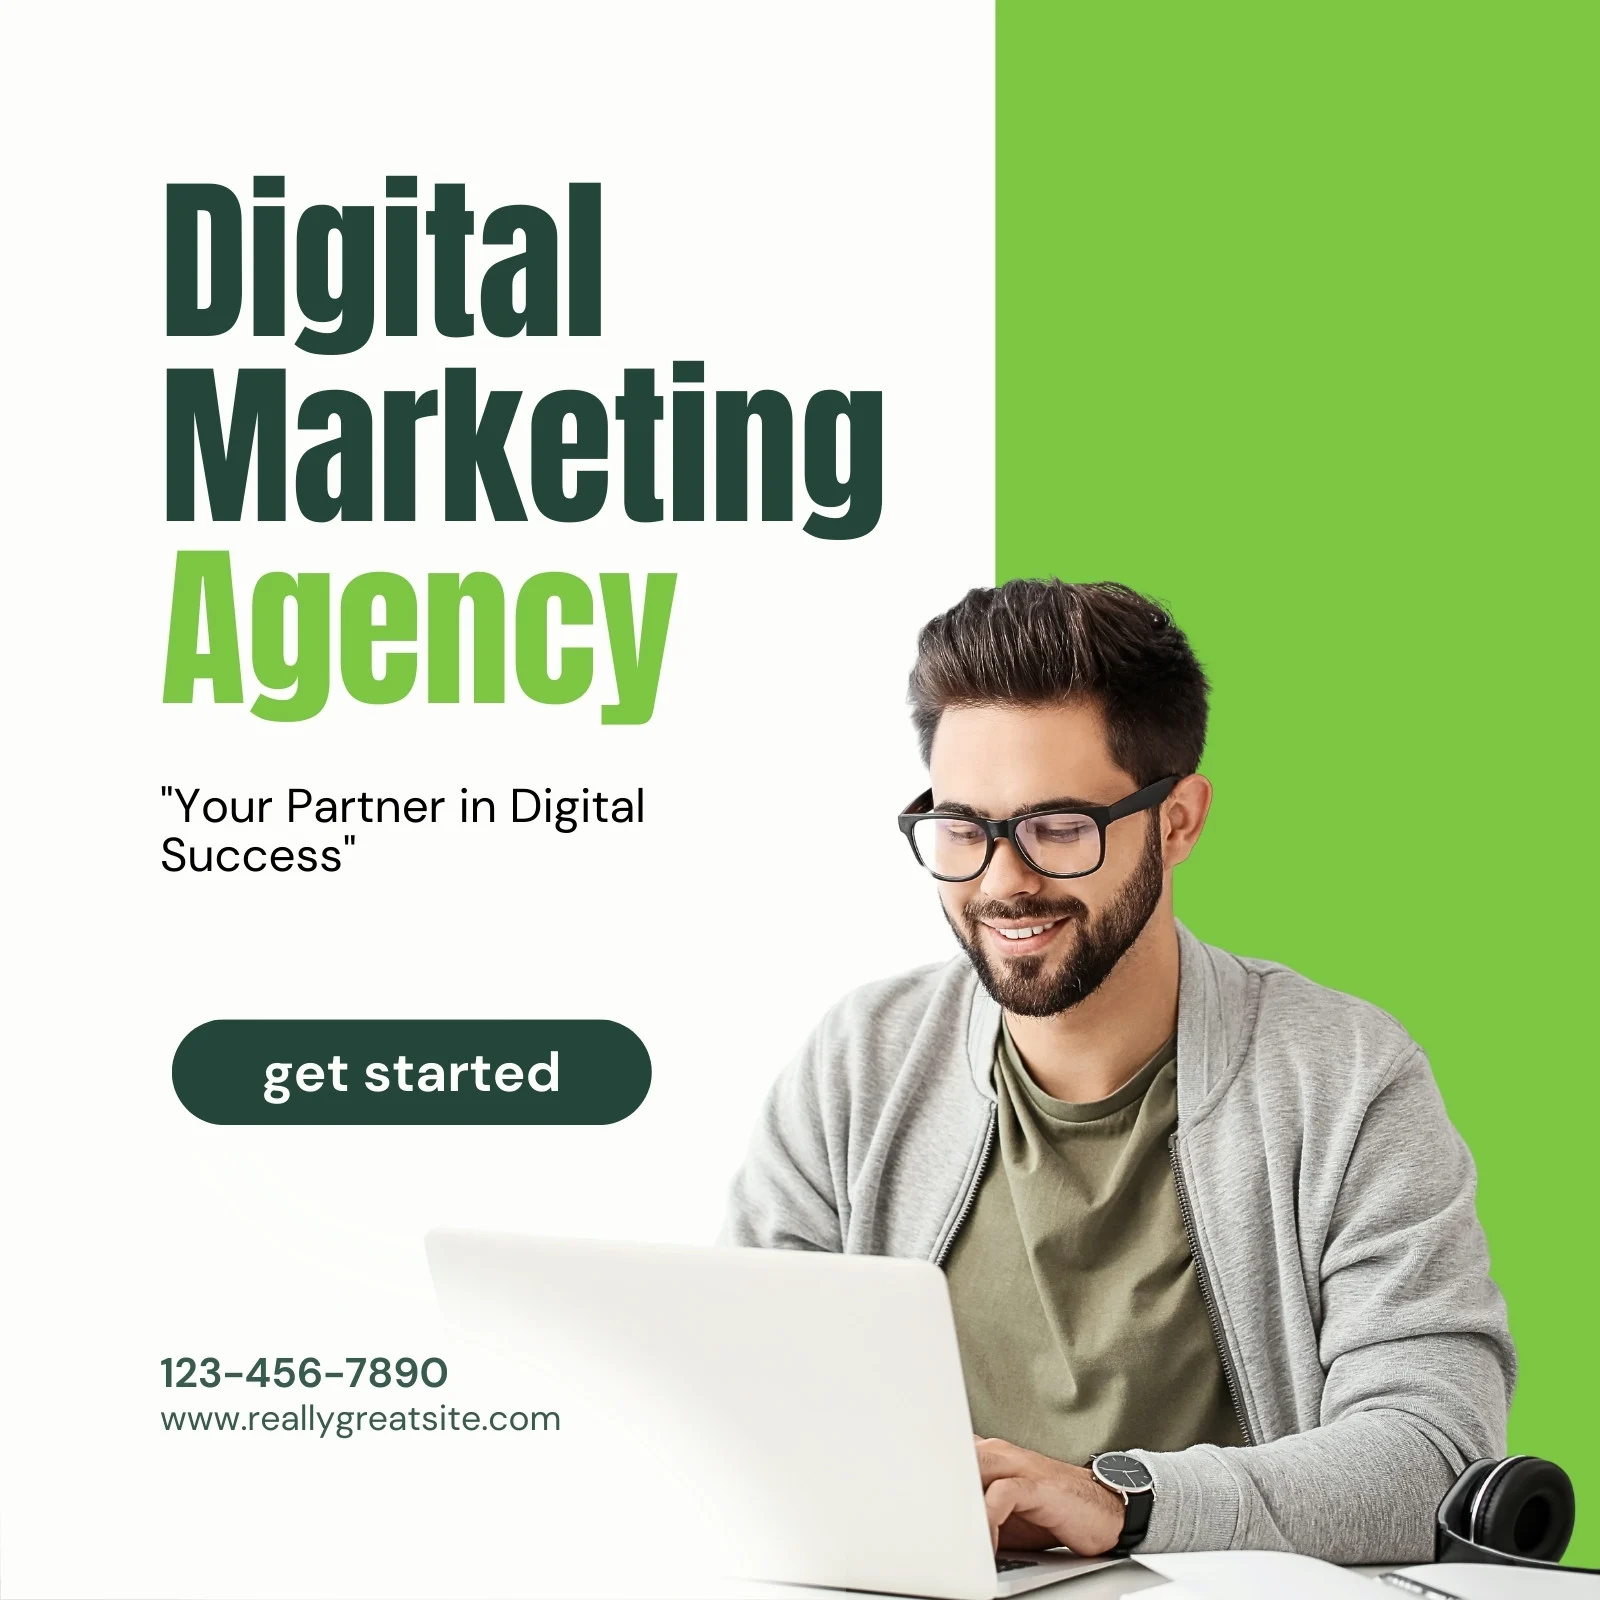
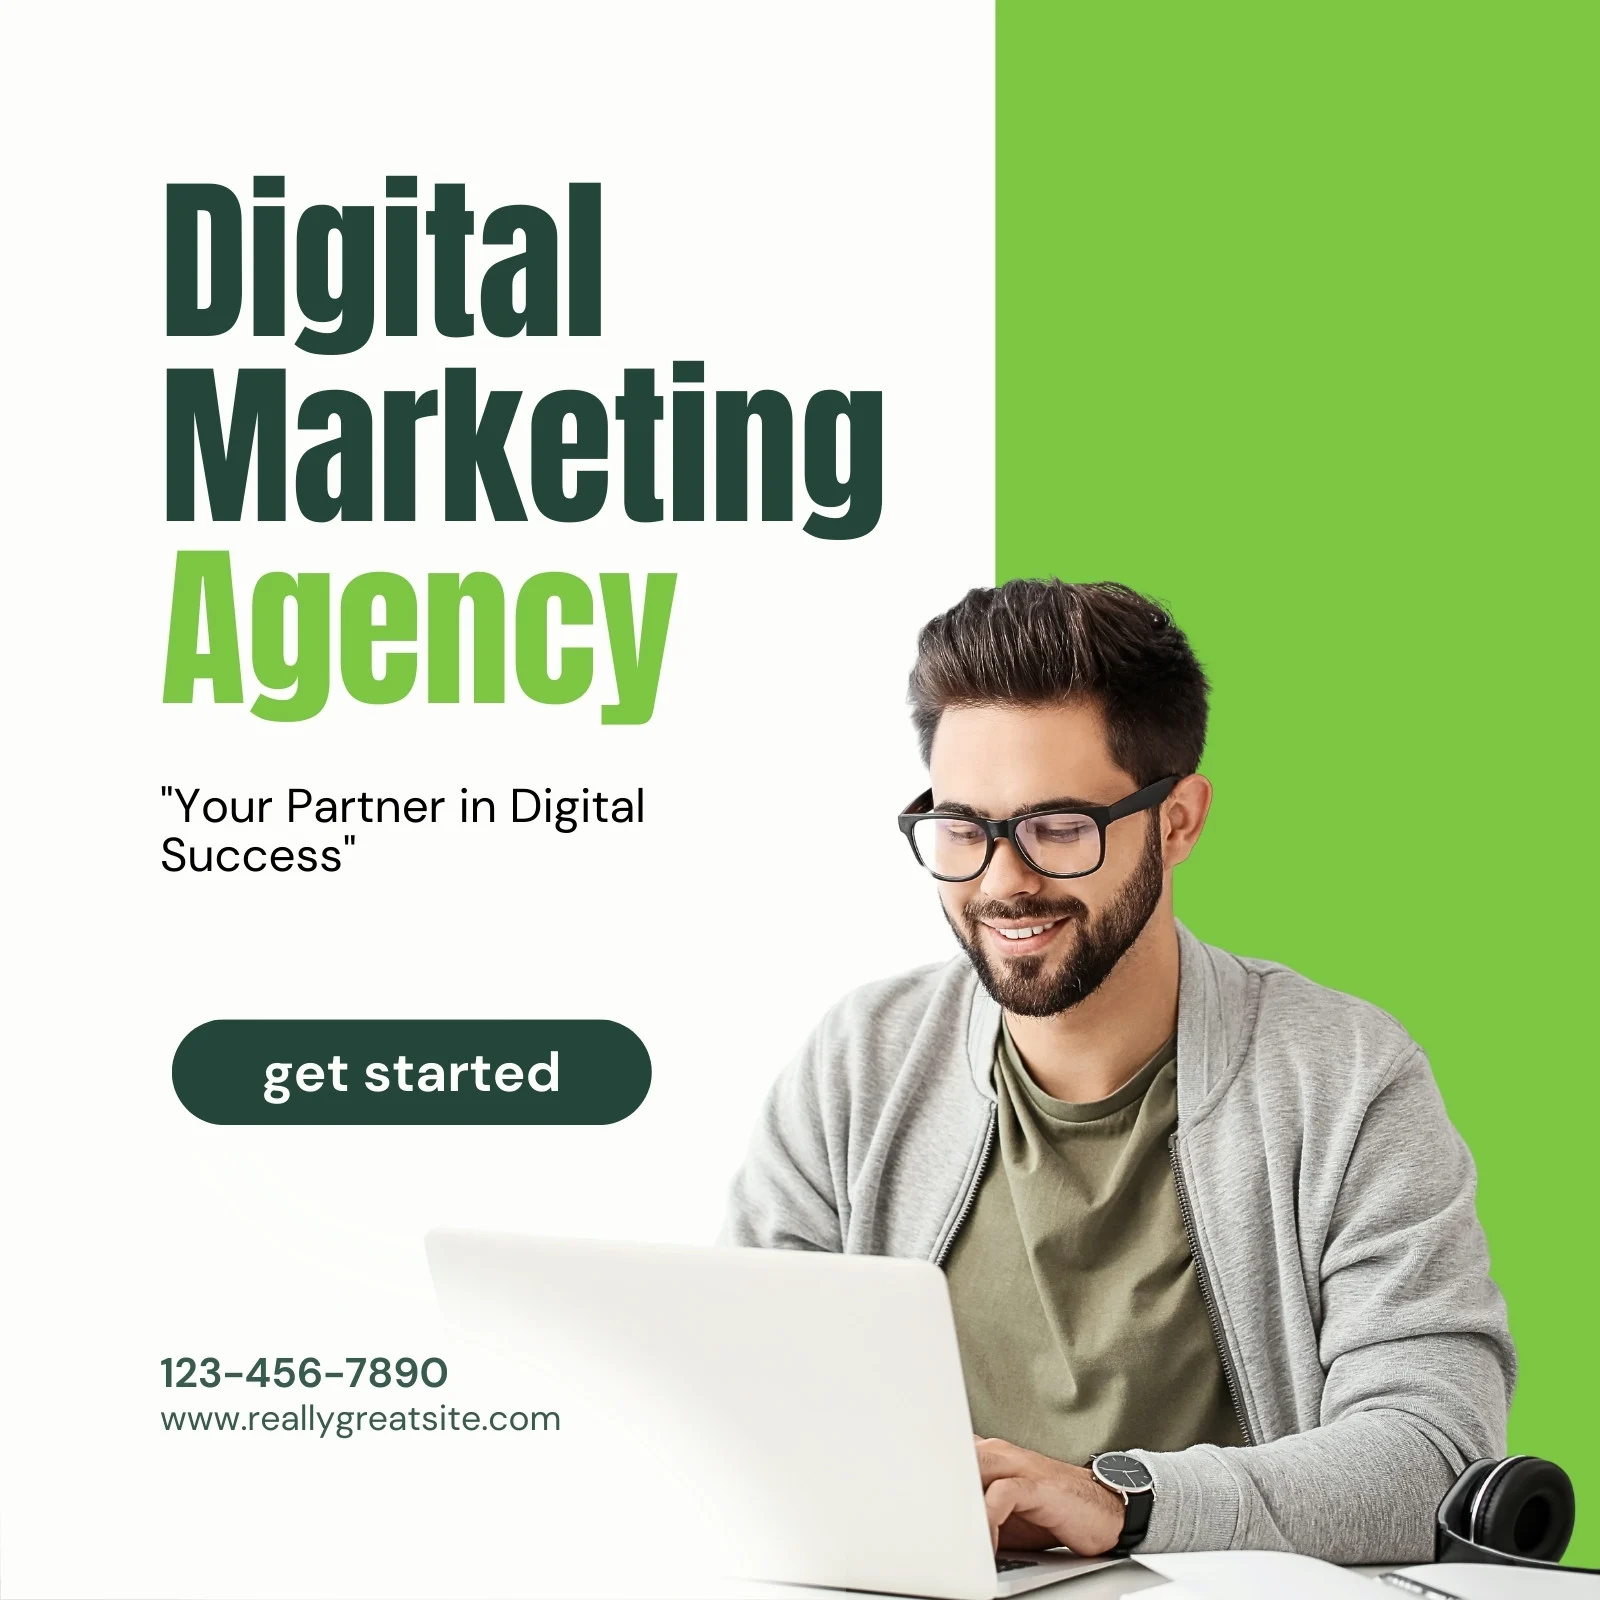


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:29 - LiteLLM:DEBUG: utils.py:366 - 

14:47:29 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:29 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
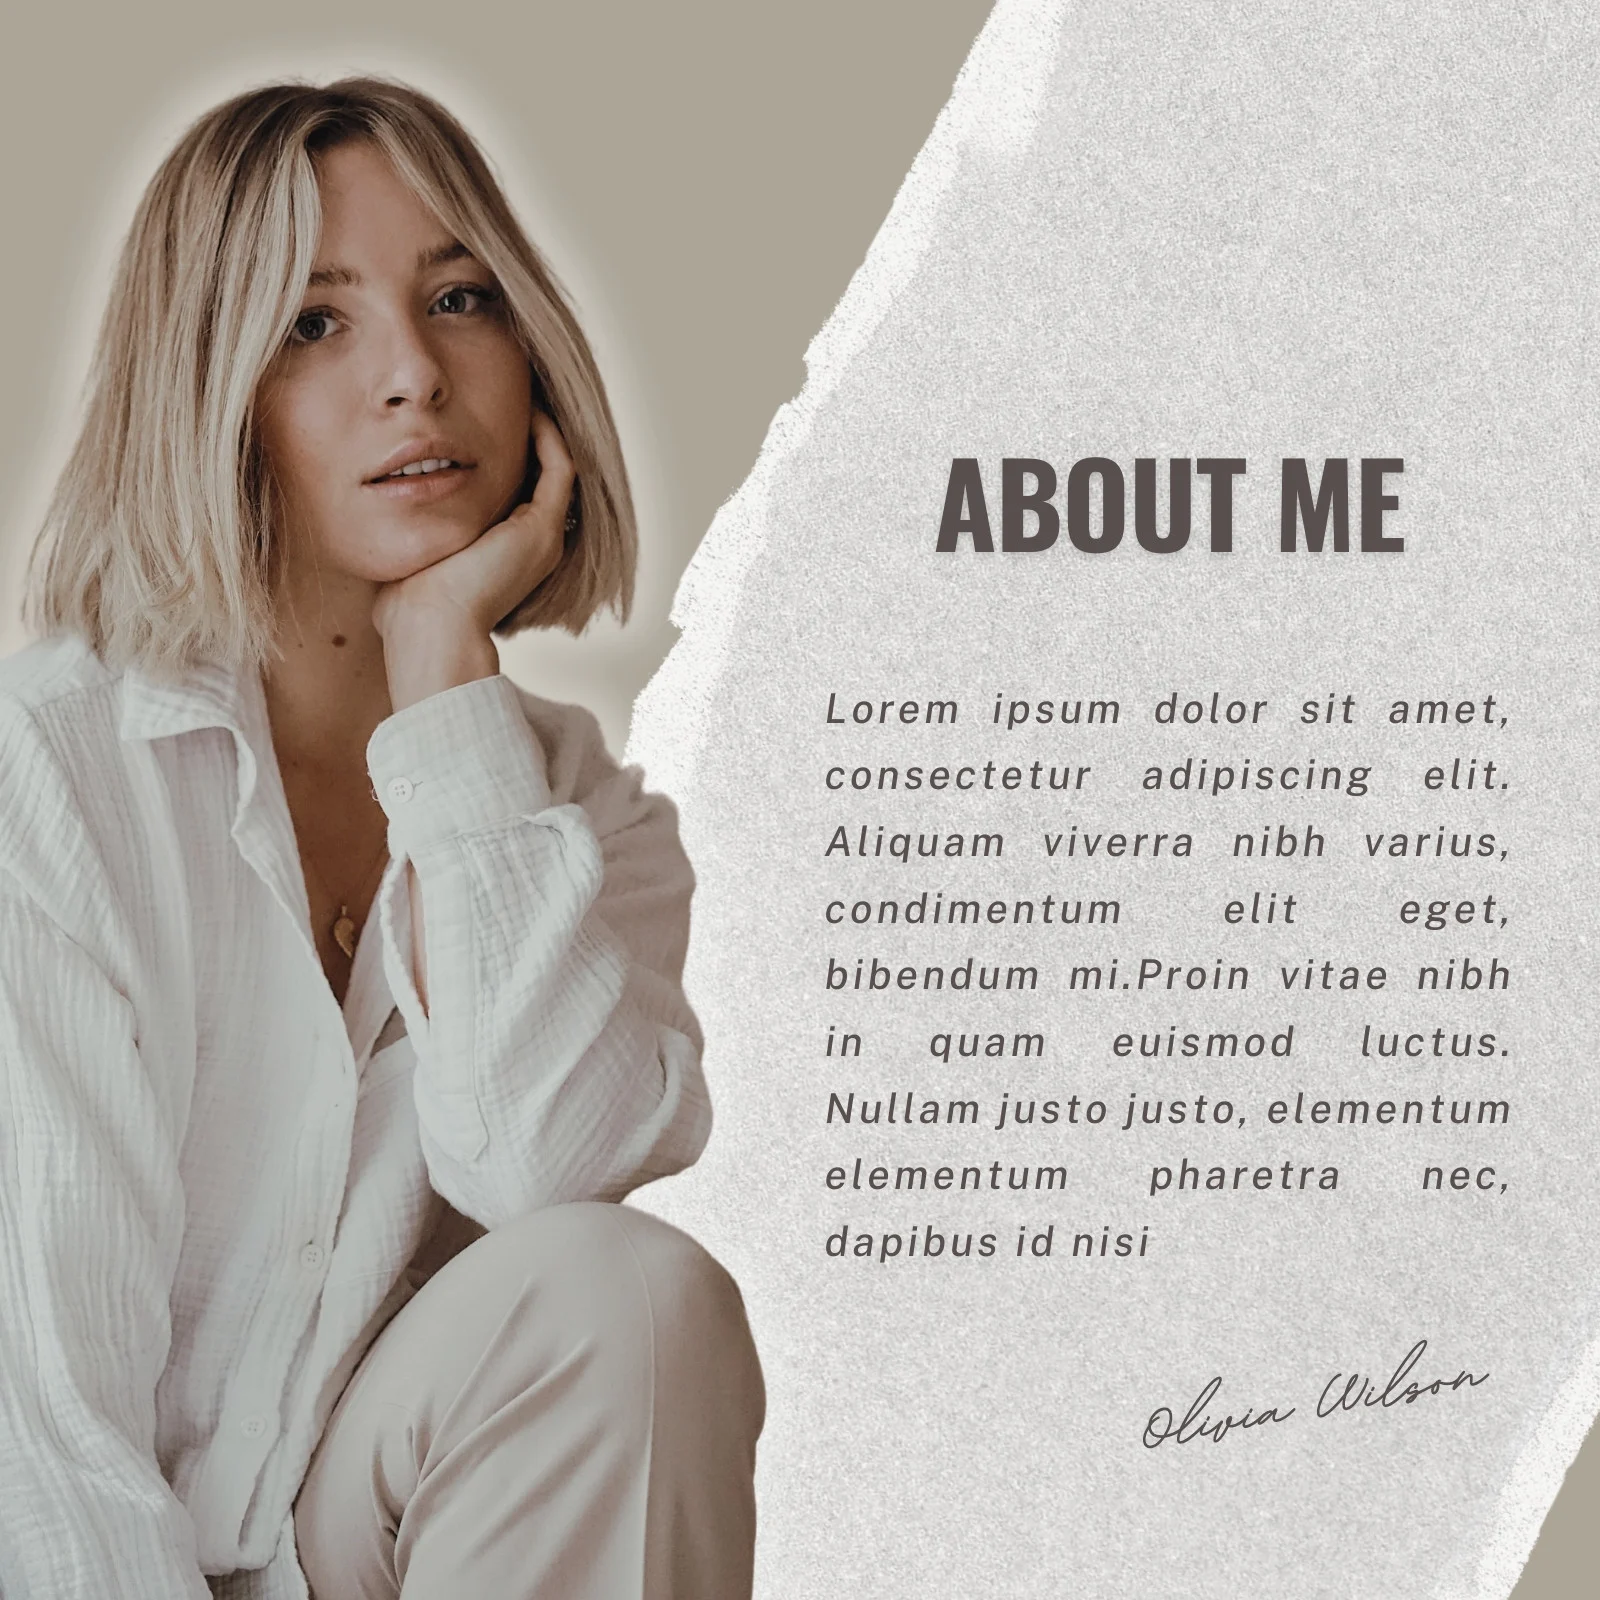
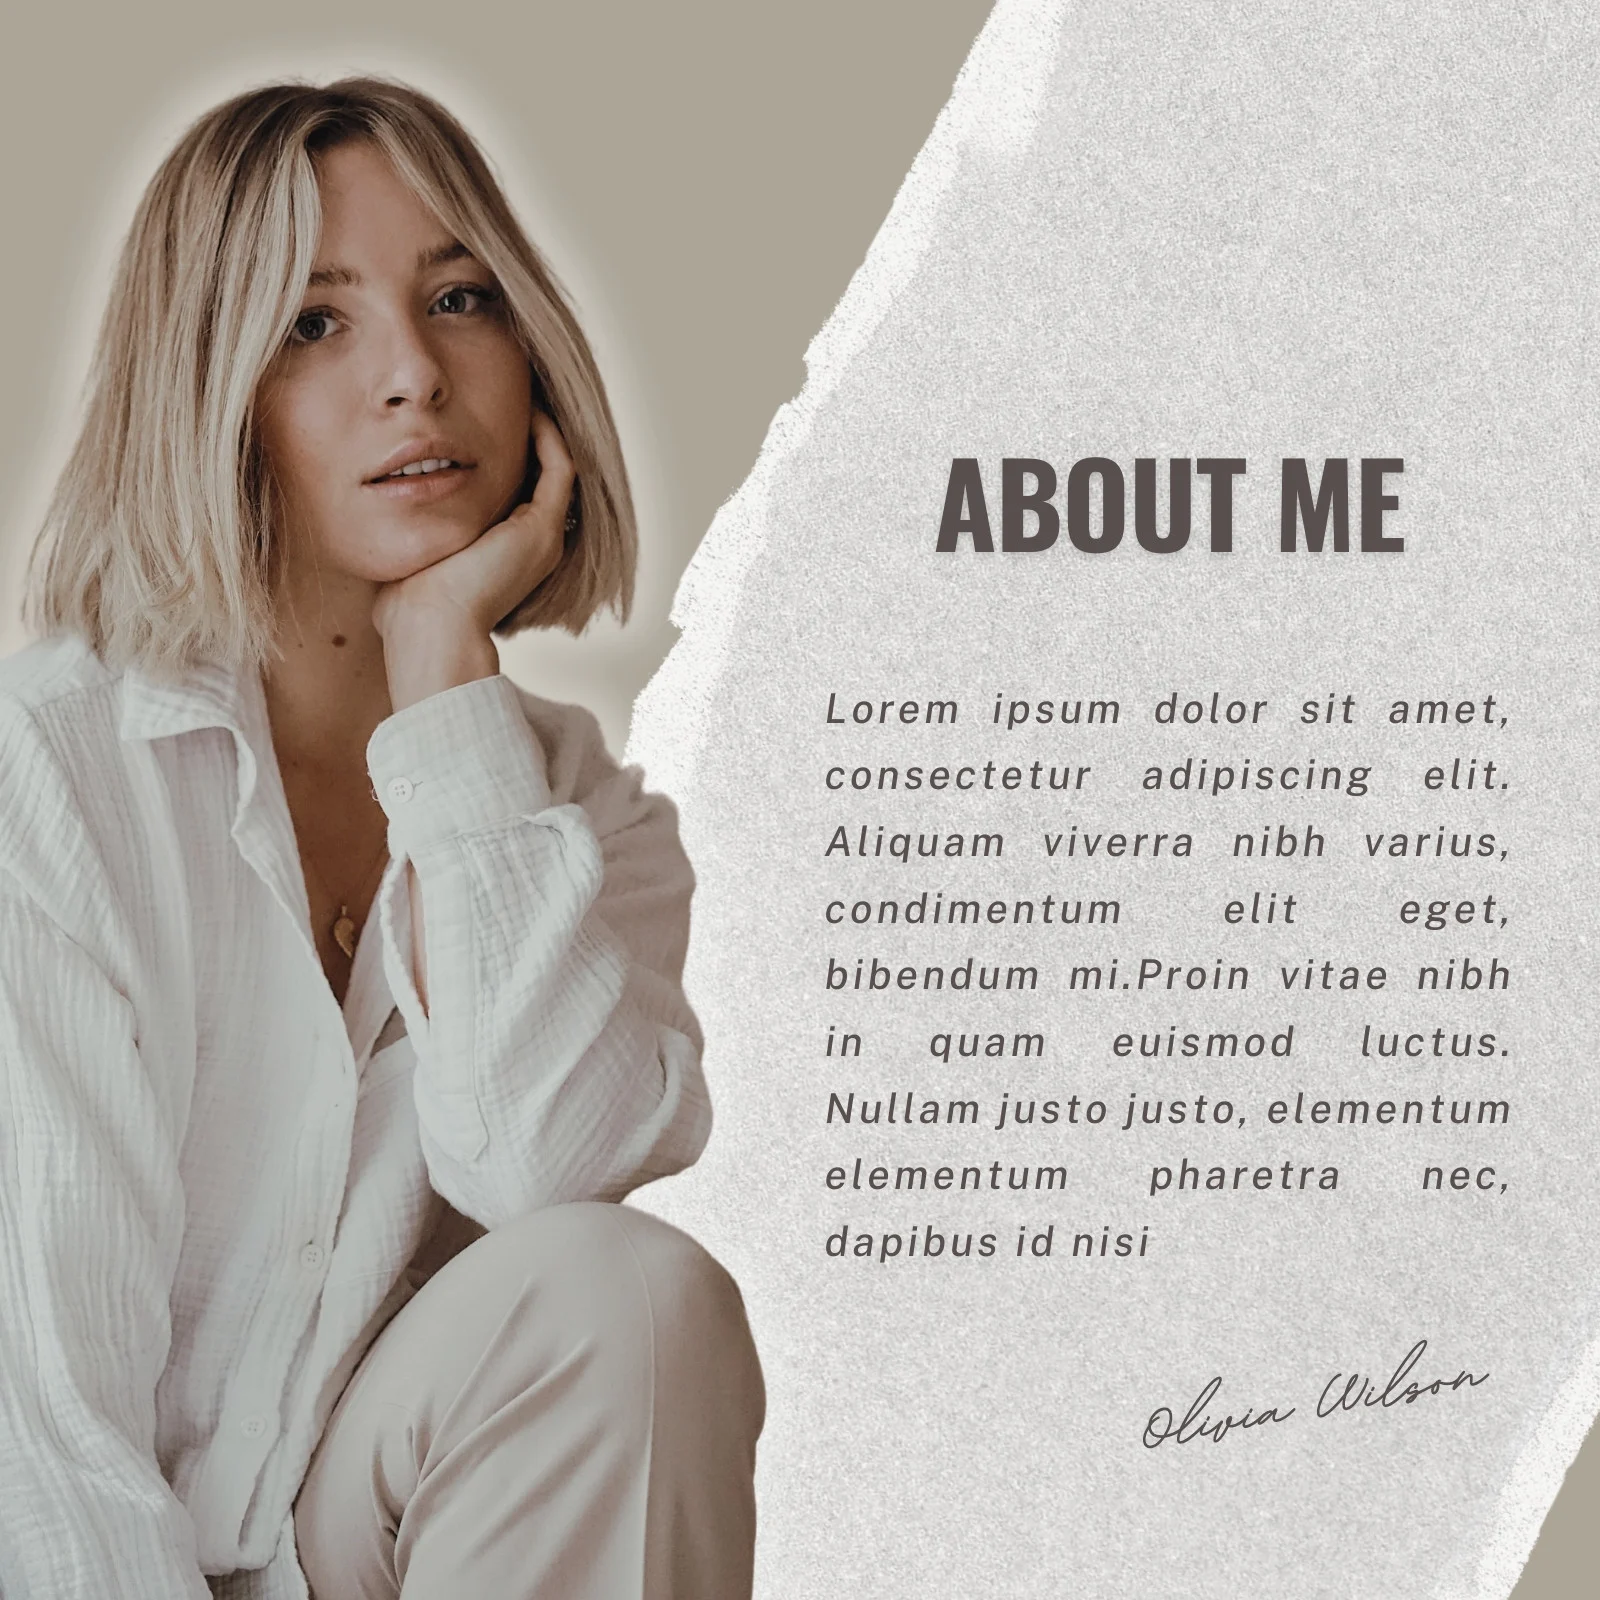
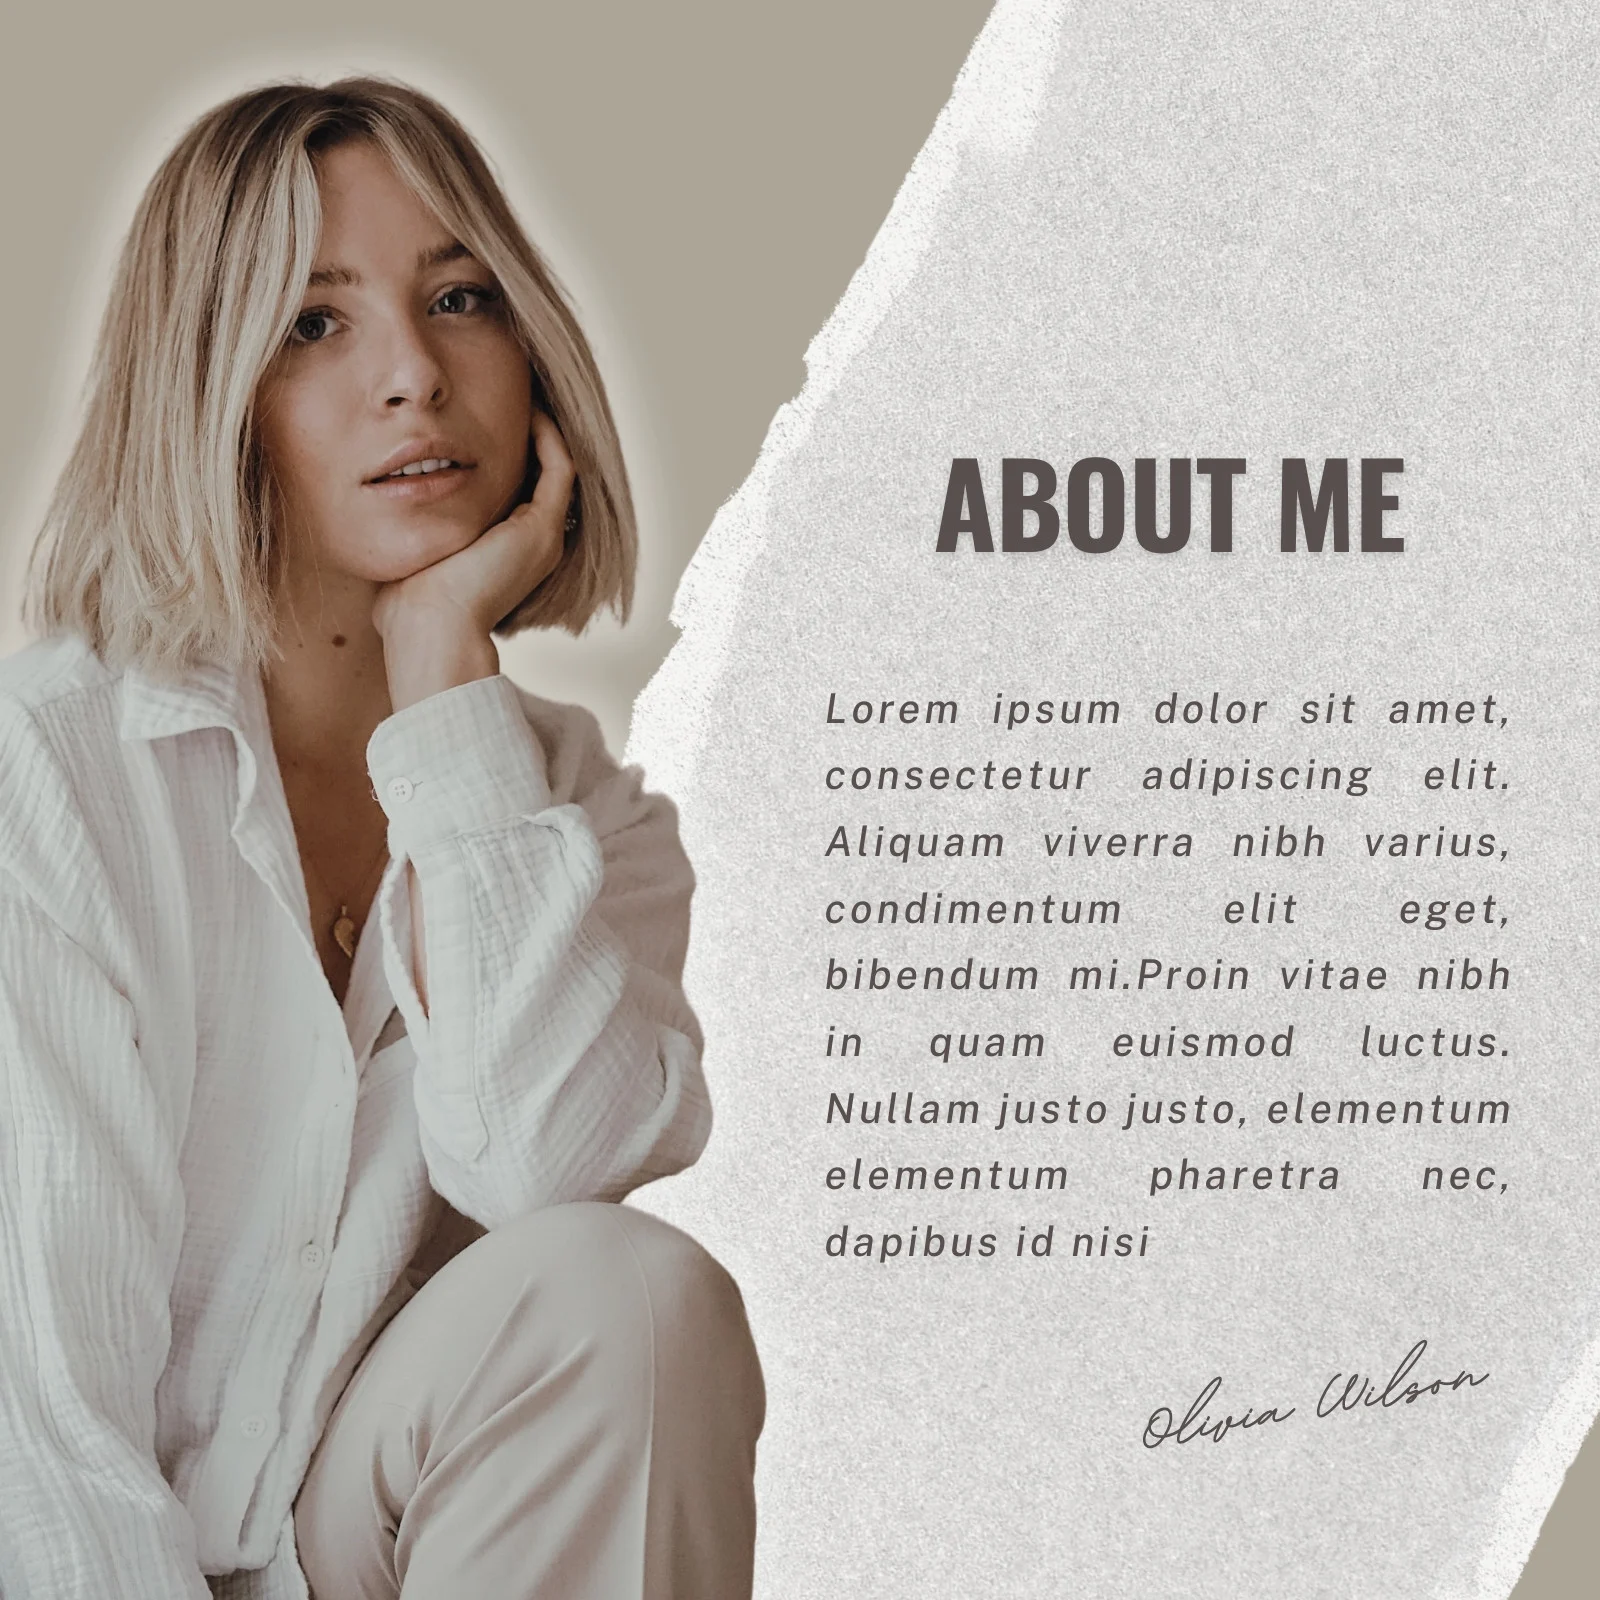

[1/7] ERROR 1600w-CxALar1xspQ.webp: litellm.RateLimitError: RateLimitError: OpenAIException - You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.


14:47:31 - LiteLLM:DEBUG: main.py:6065 - openai.py: Received openai error - Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
14:47:31 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


14:47:31 - LiteLLM:DEBUG: exception_mapping_utils.py:2302 - Logging Details: logger_fn - None | callable(logger_fn) - False
14:47:31 - LiteLLM:DEBUG: litellm_logging.py:2540 - Logging Details LiteLLM-Failure Call: []



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:32 - LiteLLM:DEBUG: utils.py:366 - 

14:47:32 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:32 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
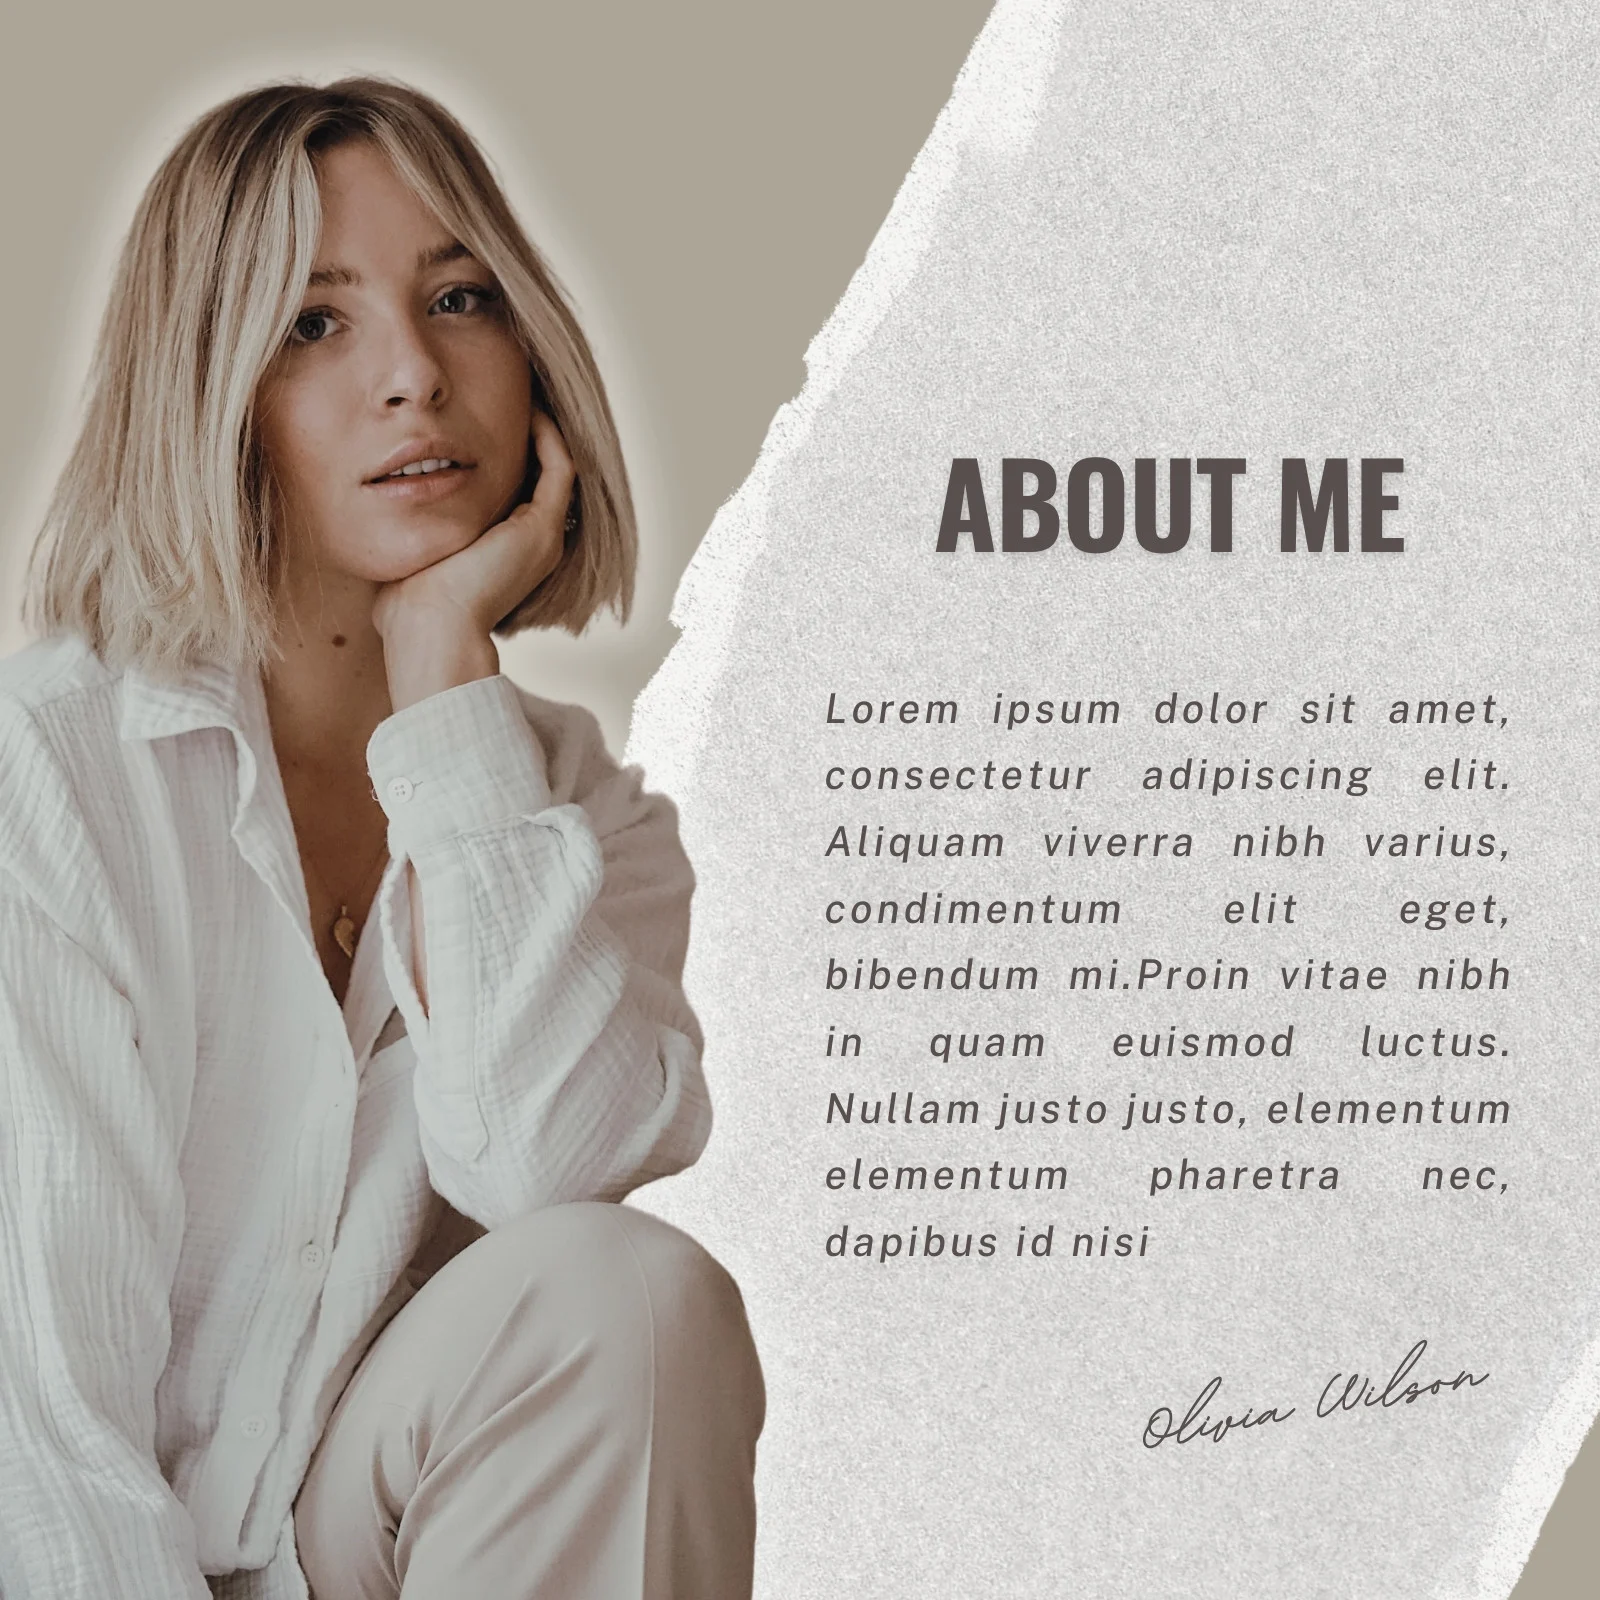
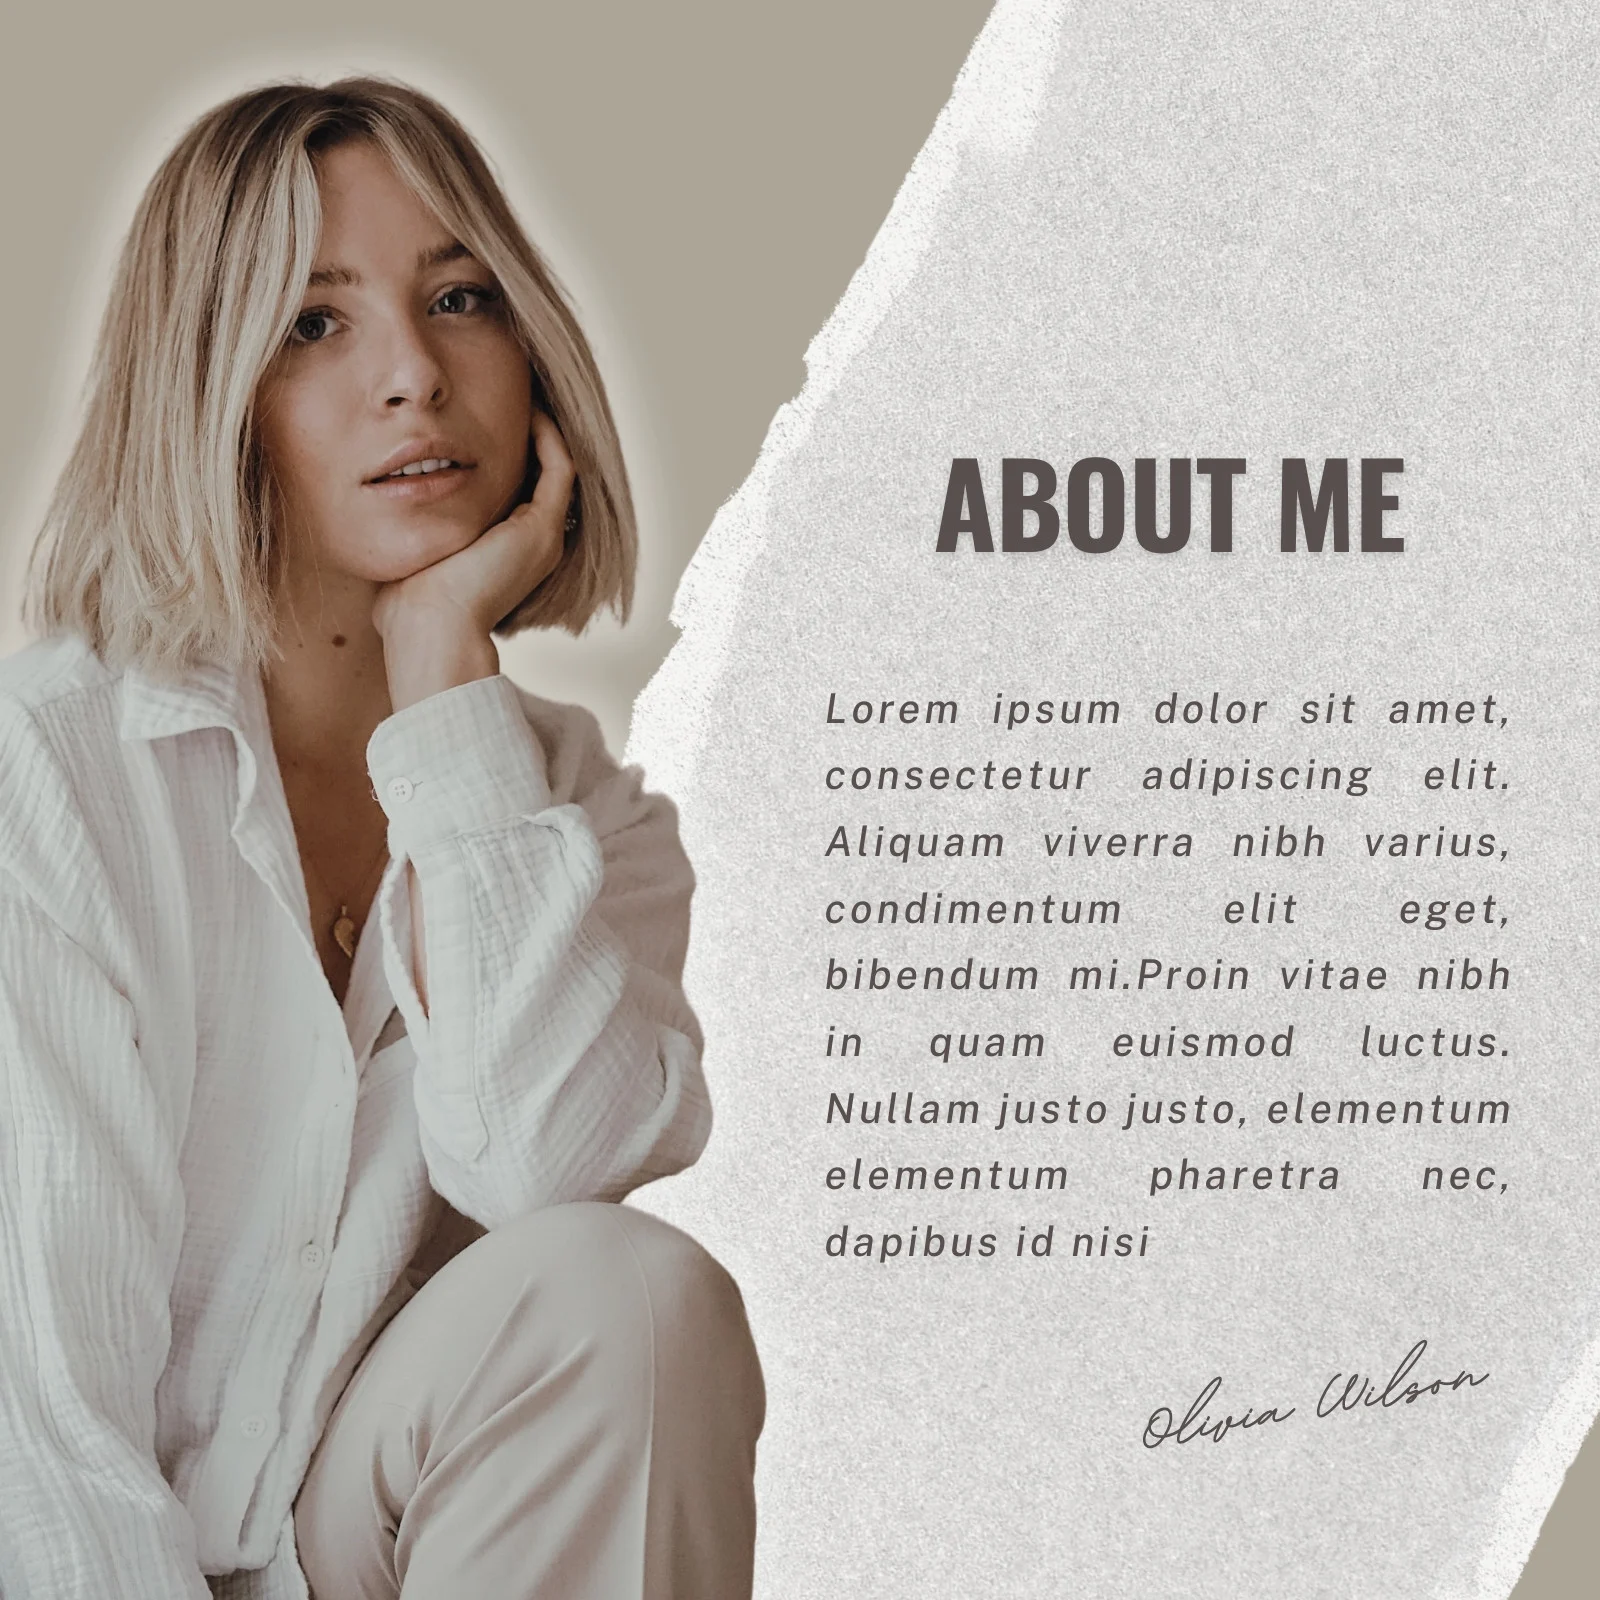
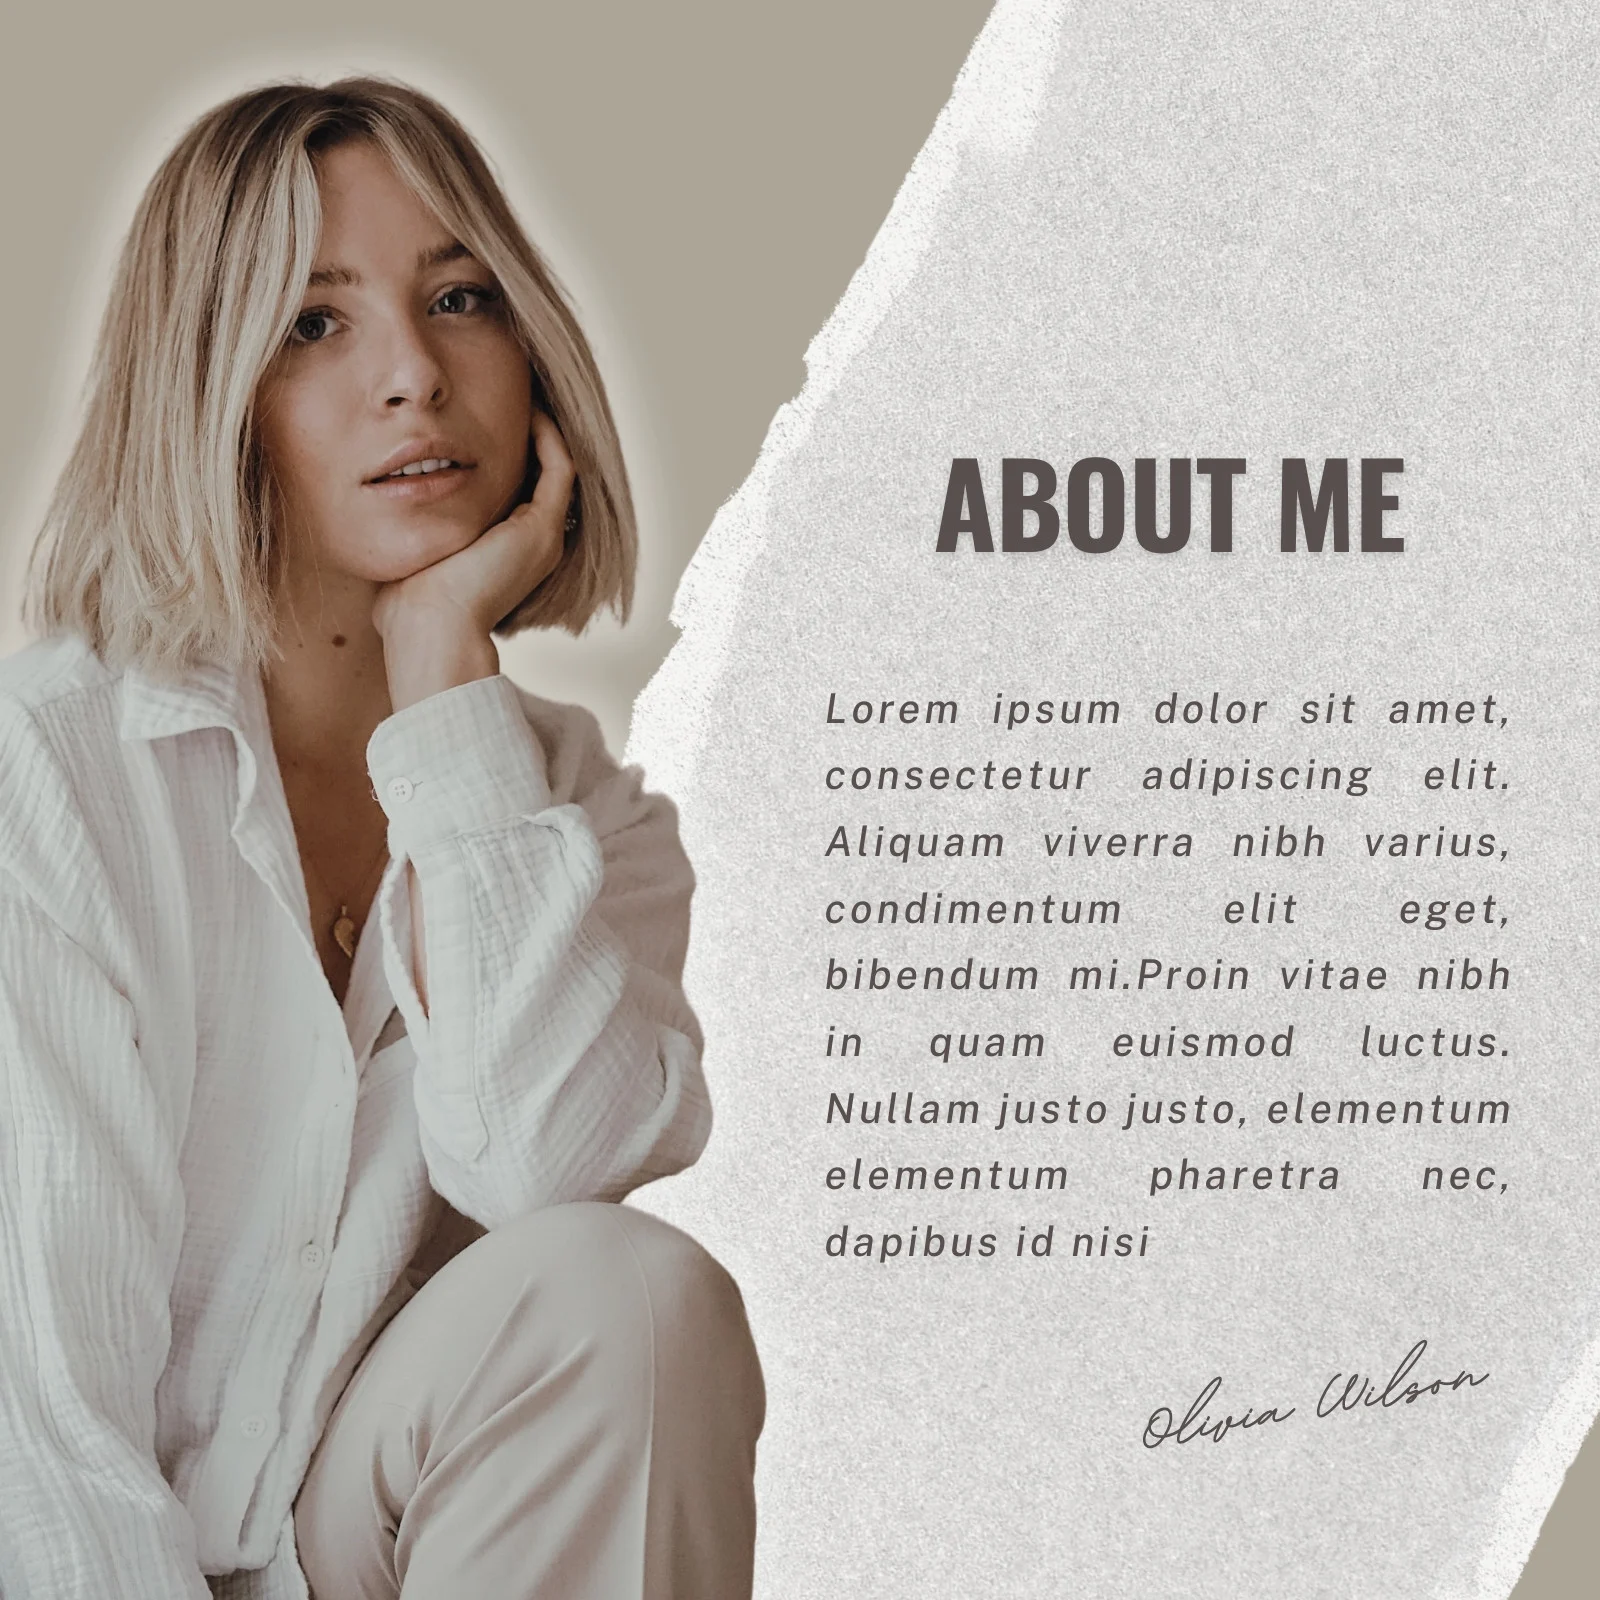


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:35 - LiteLLM:DEBUG: utils.py:366 - 

14:47:35 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:35 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
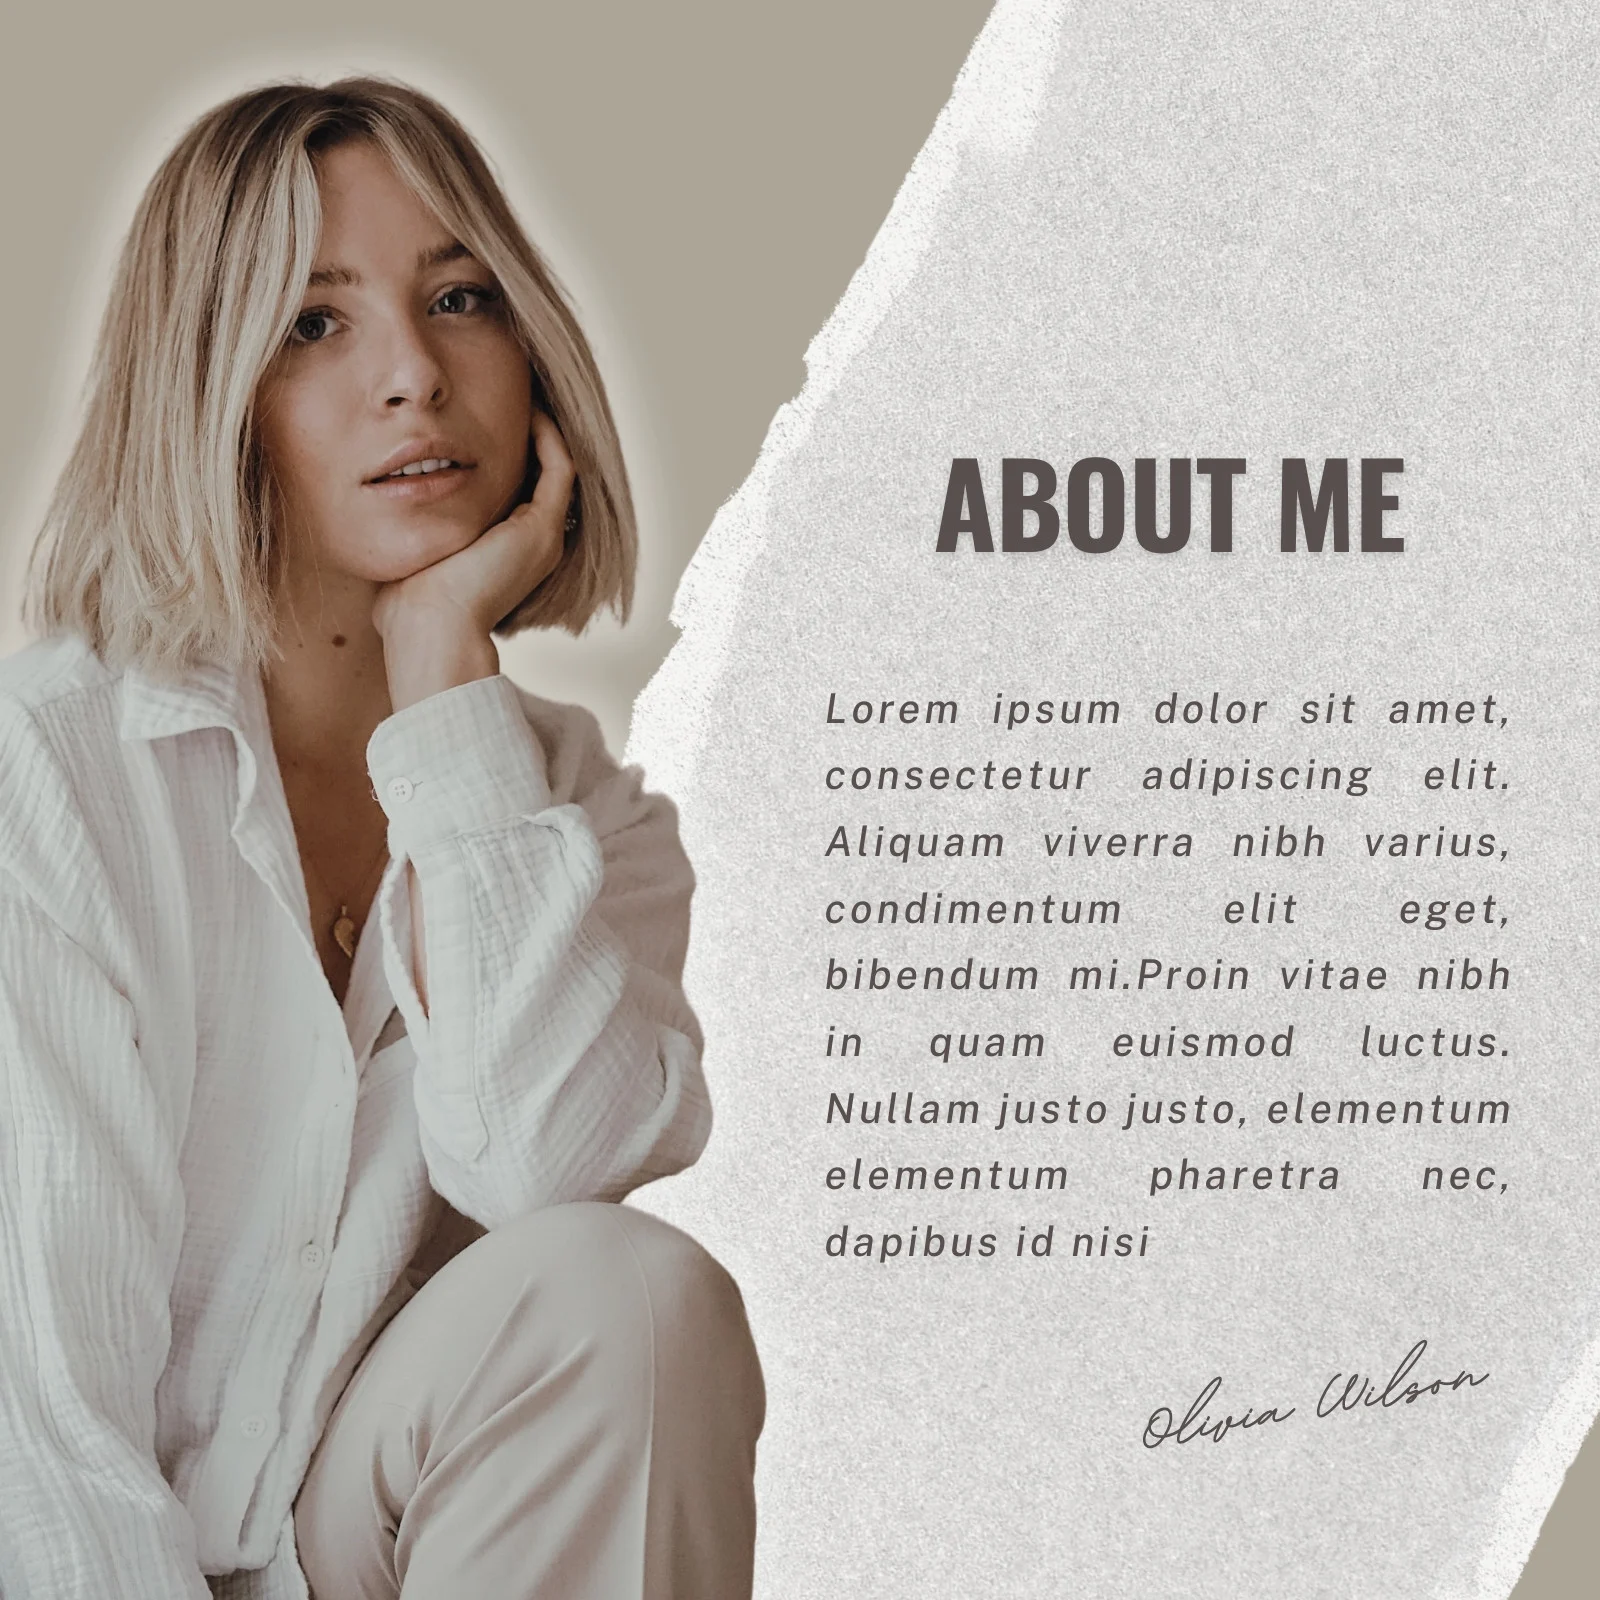
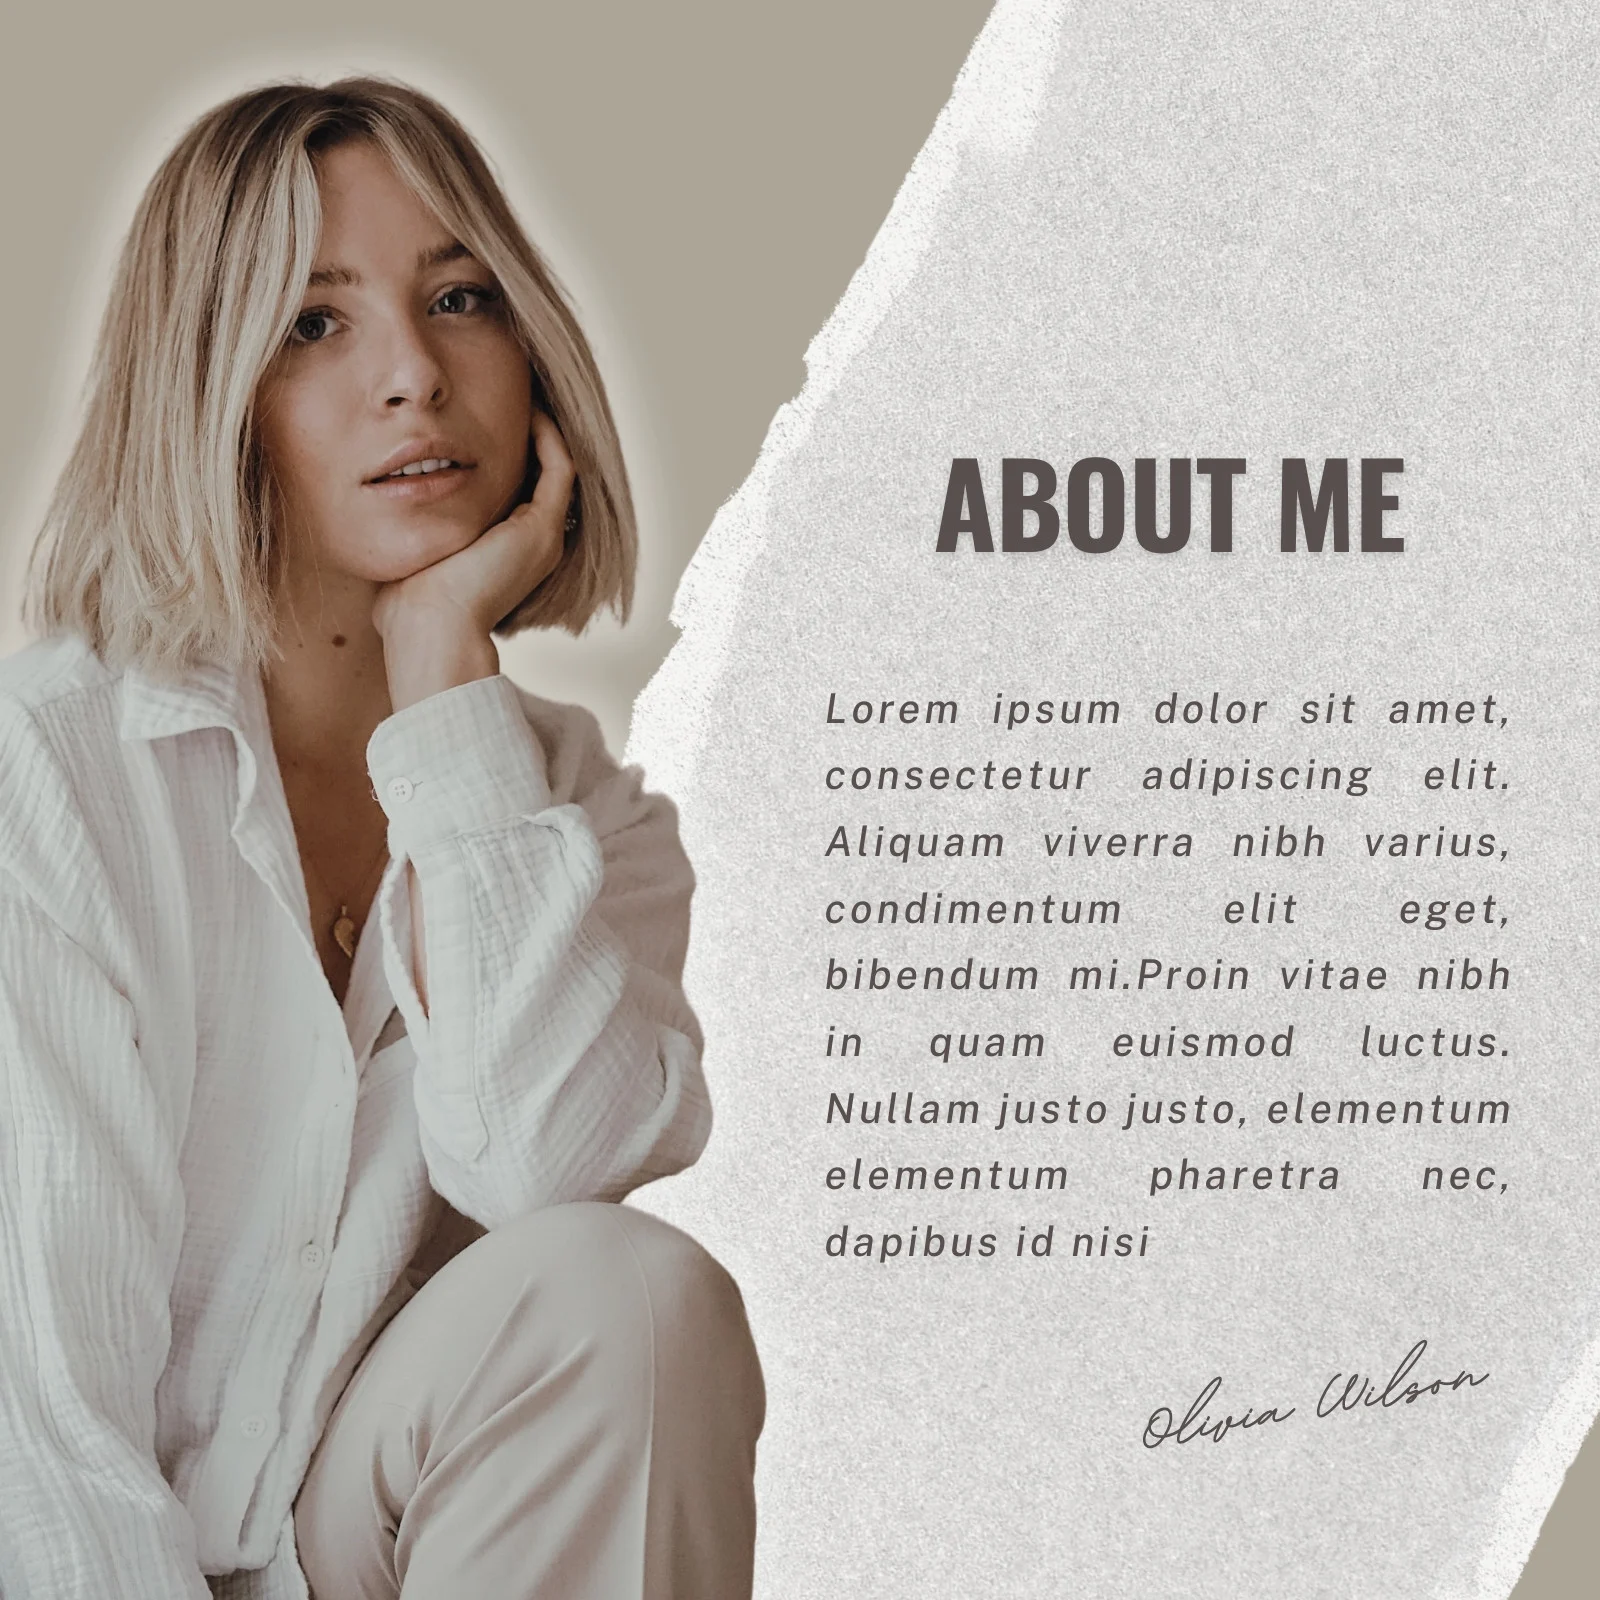
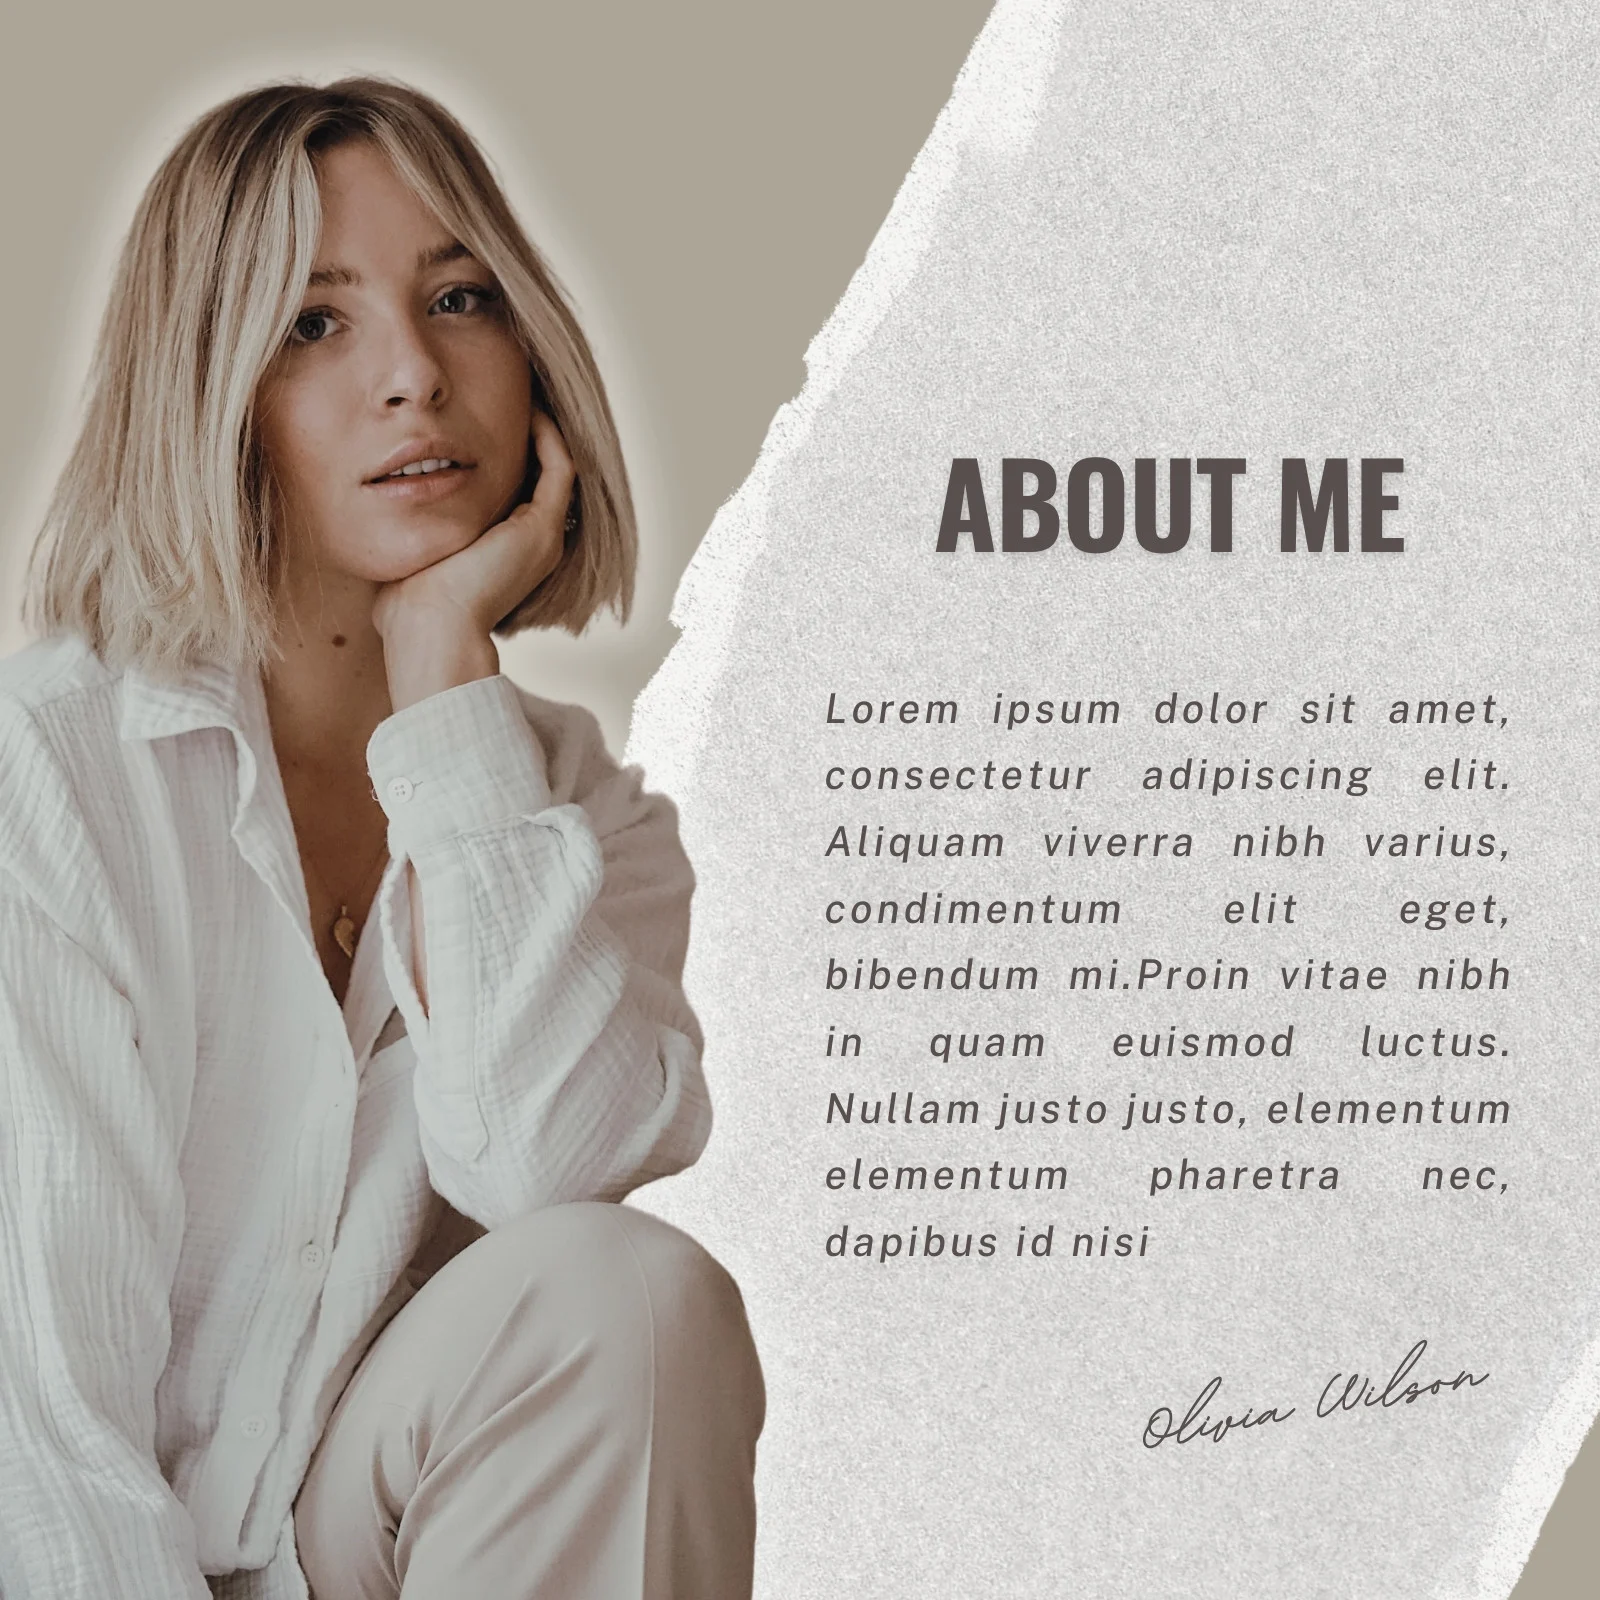


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:38 - LiteLLM:DEBUG: utils.py:366 - 

14:47:38 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:38 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
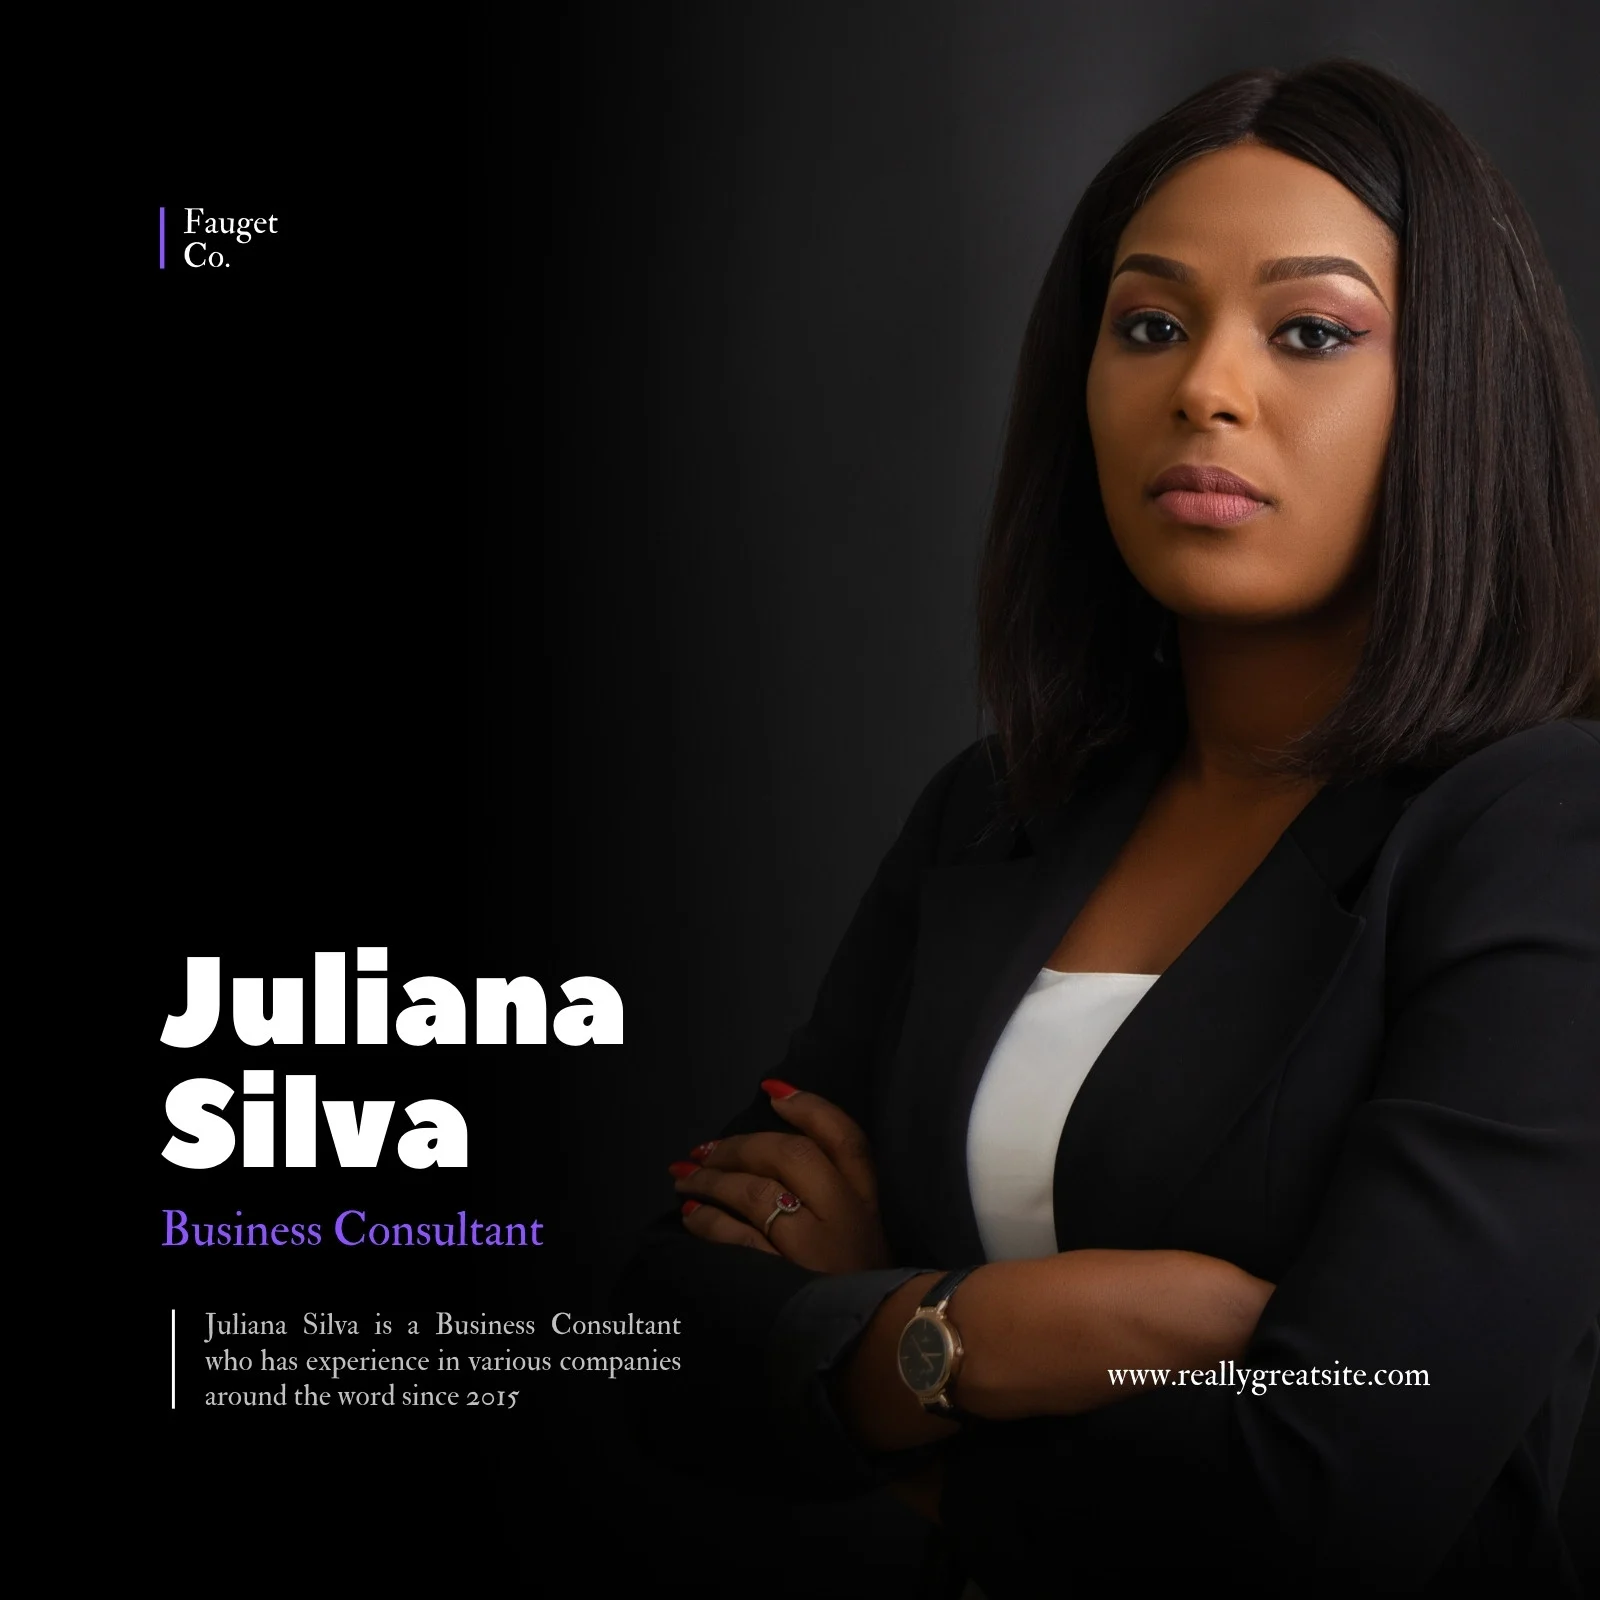
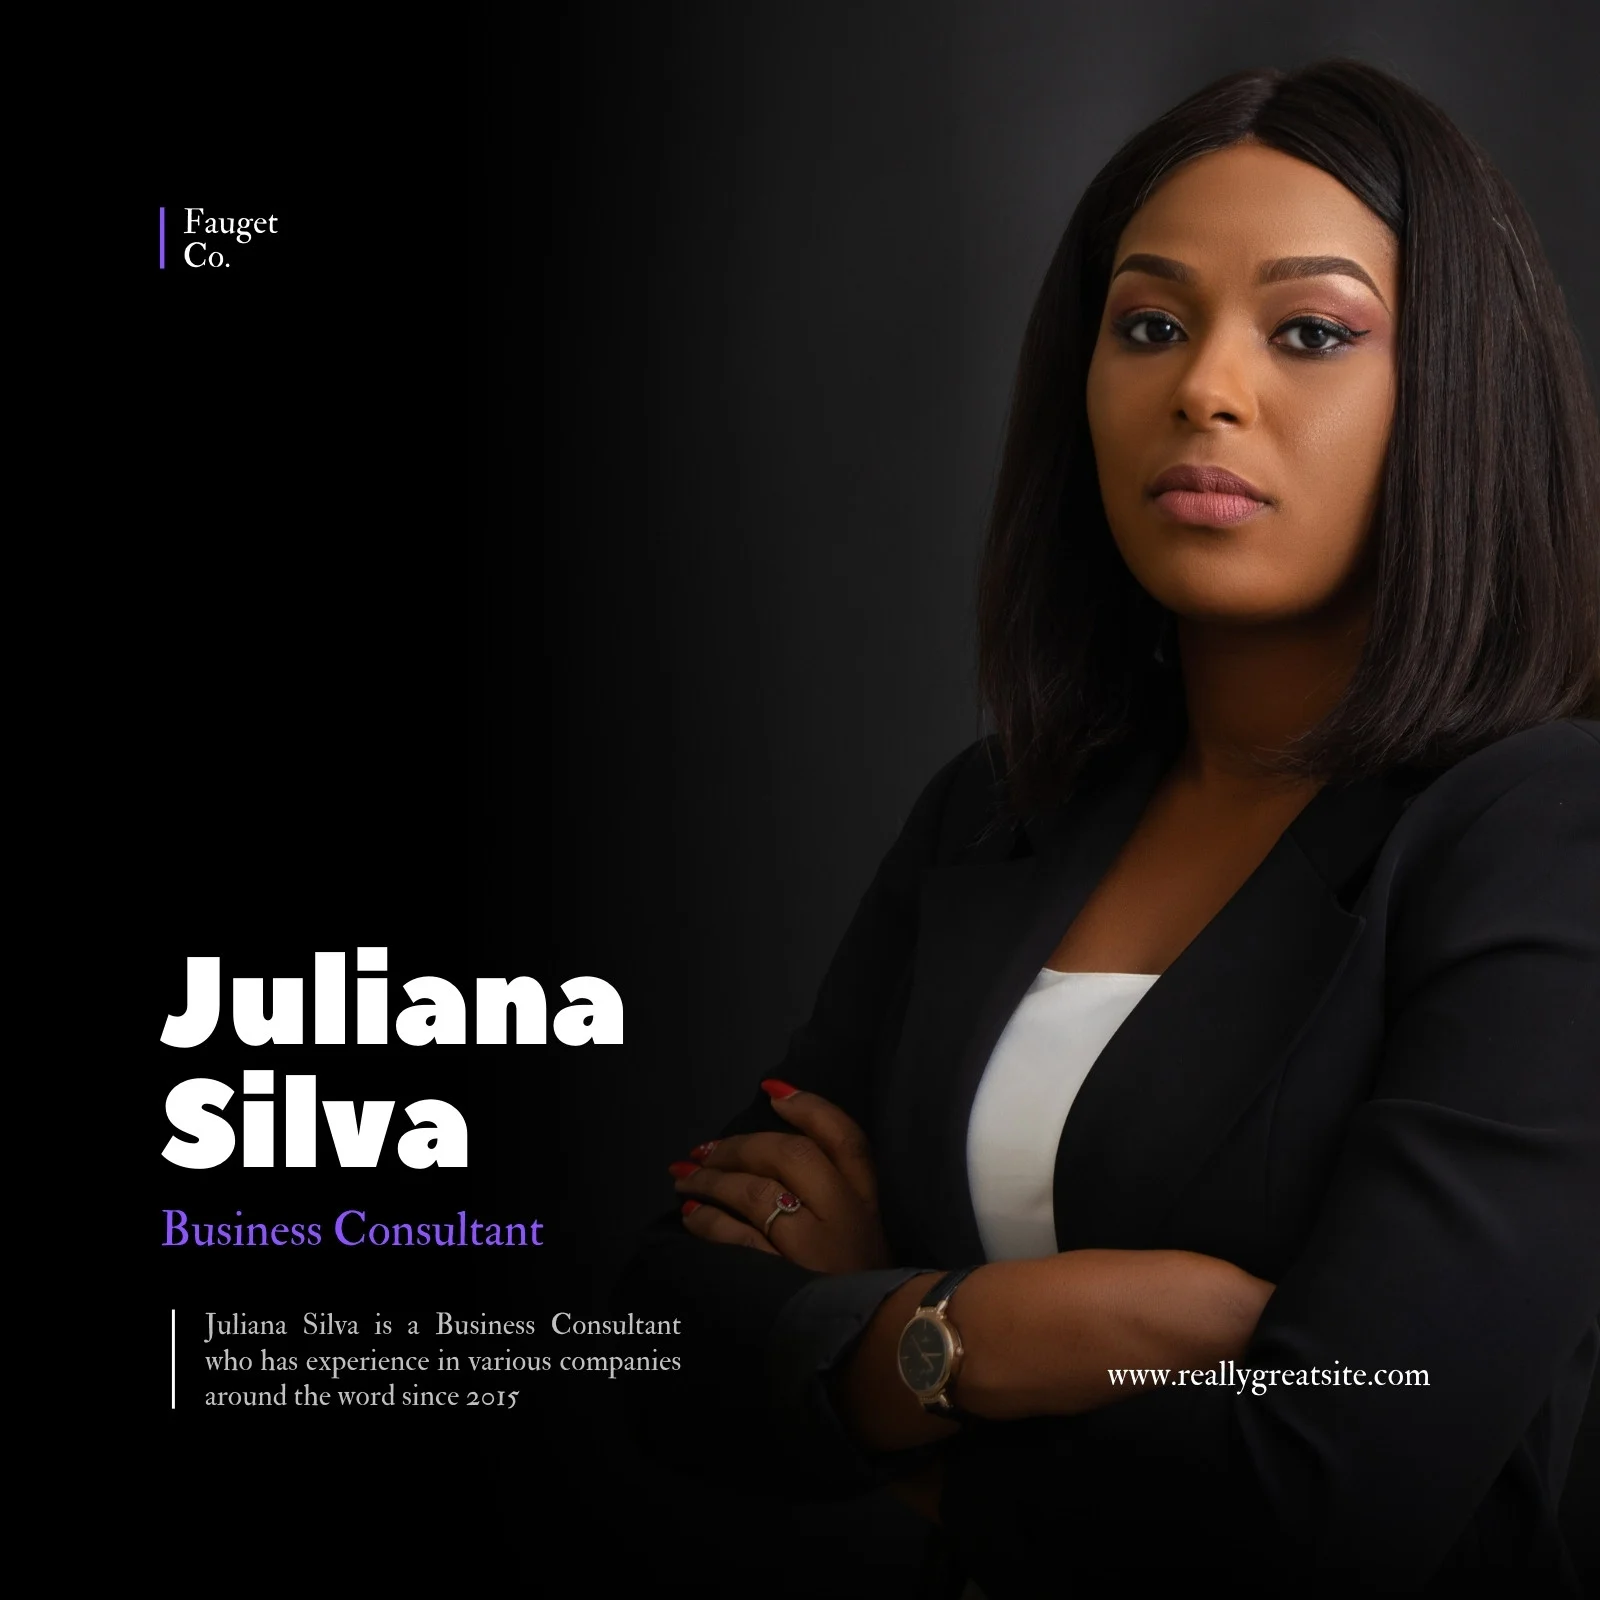
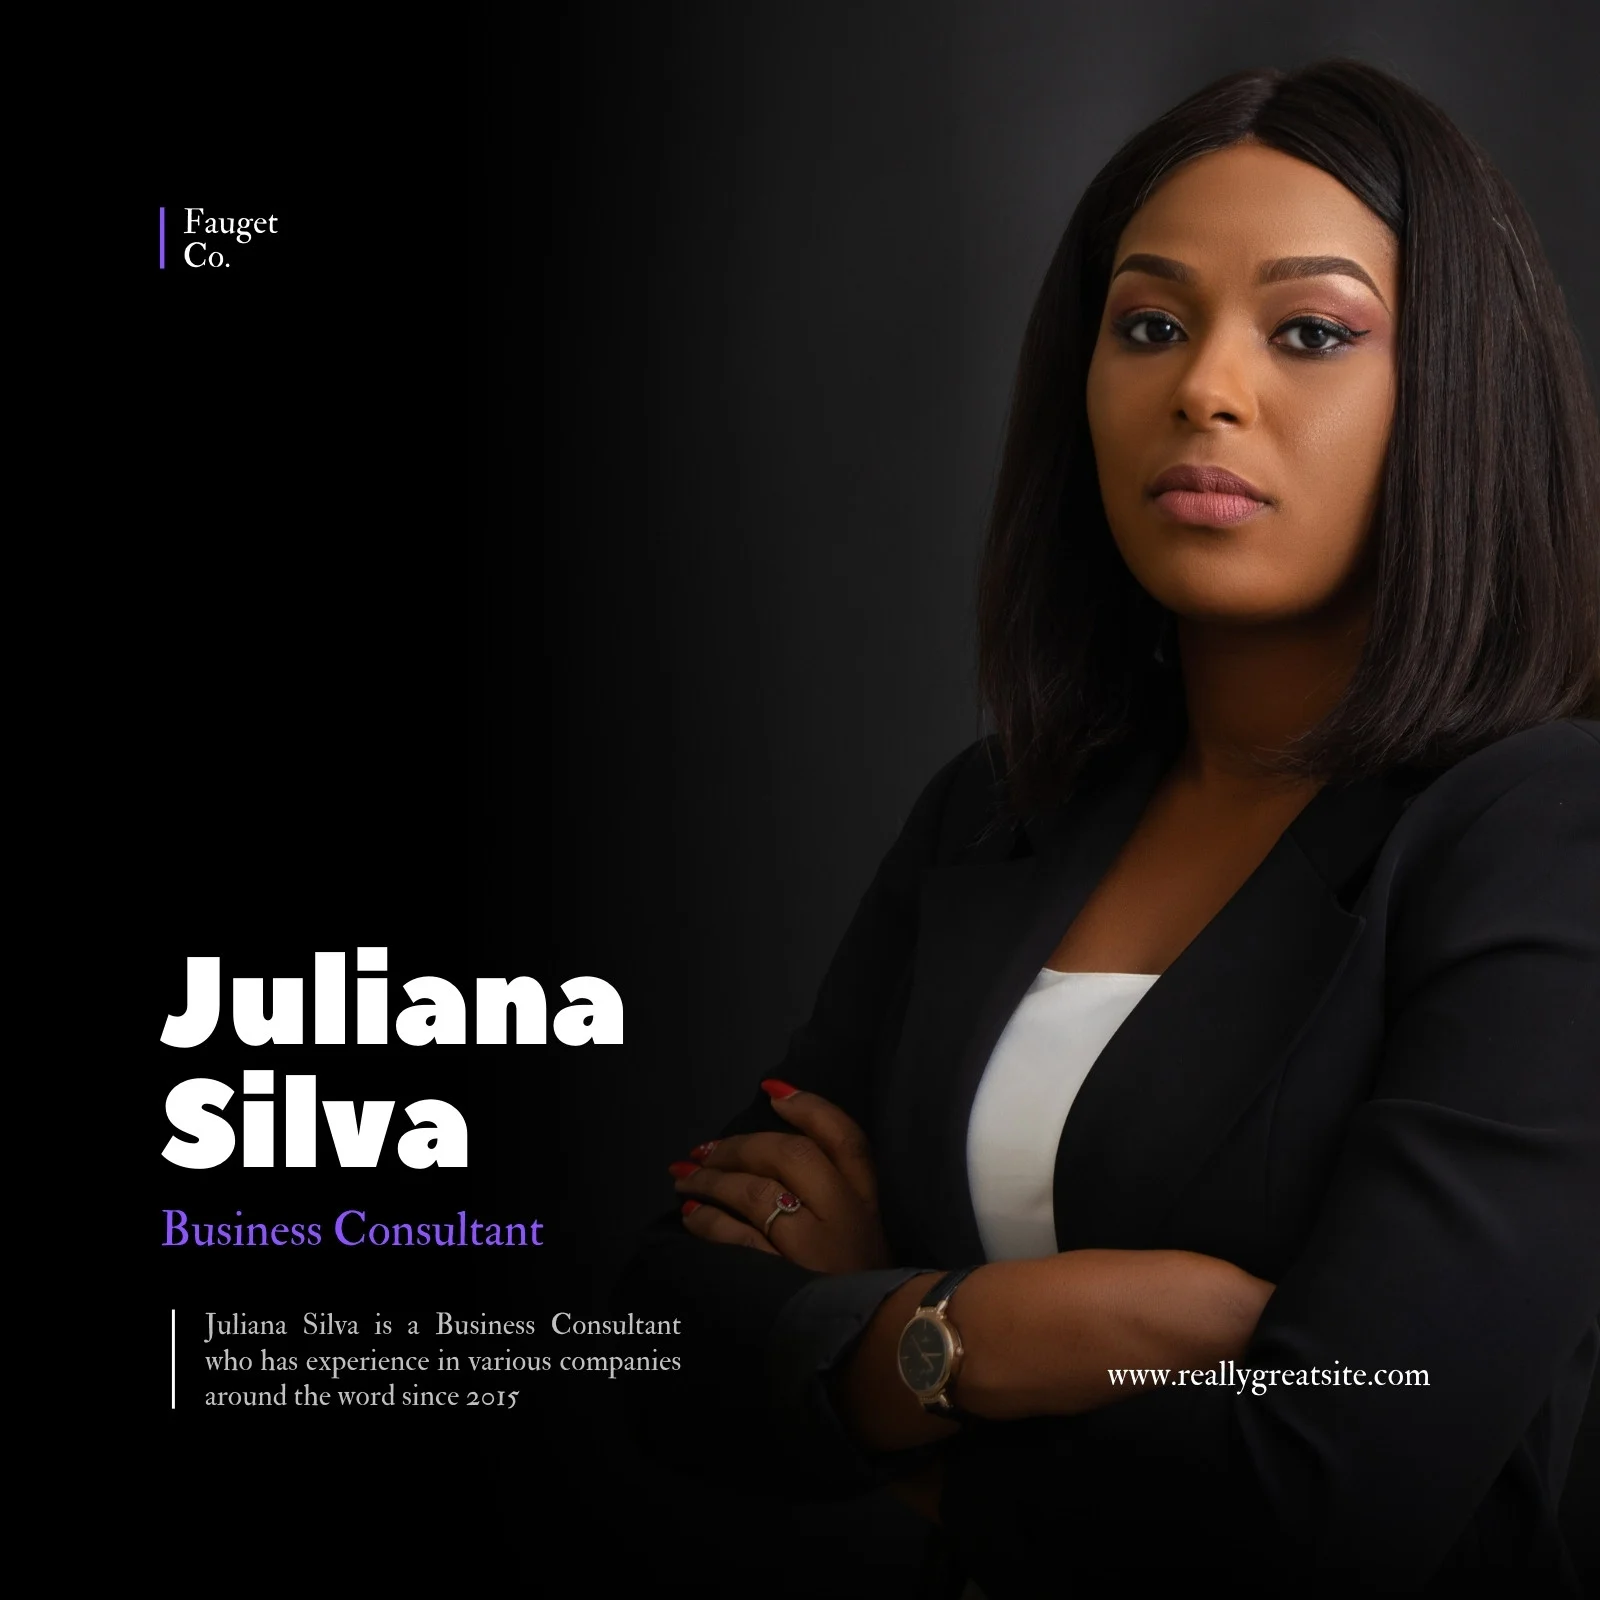

[2/7] ERROR 1600w-DVXZyB158ss.webp: litellm.RateLimitError: RateLimitError: OpenAIException - You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.


14:47:40 - LiteLLM:DEBUG: main.py:6065 - openai.py: Received openai error - Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
14:47:40 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


14:47:40 - LiteLLM:DEBUG: exception_mapping_utils.py:2302 - Logging Details: logger_fn - None | callable(logger_fn) - False
14:47:40 - LiteLLM:DEBUG: litellm_logging.py:2540 - Logging Details LiteLLM-Failure Call: []



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:40 - LiteLLM:DEBUG: utils.py:366 - 

14:47:40 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:40 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
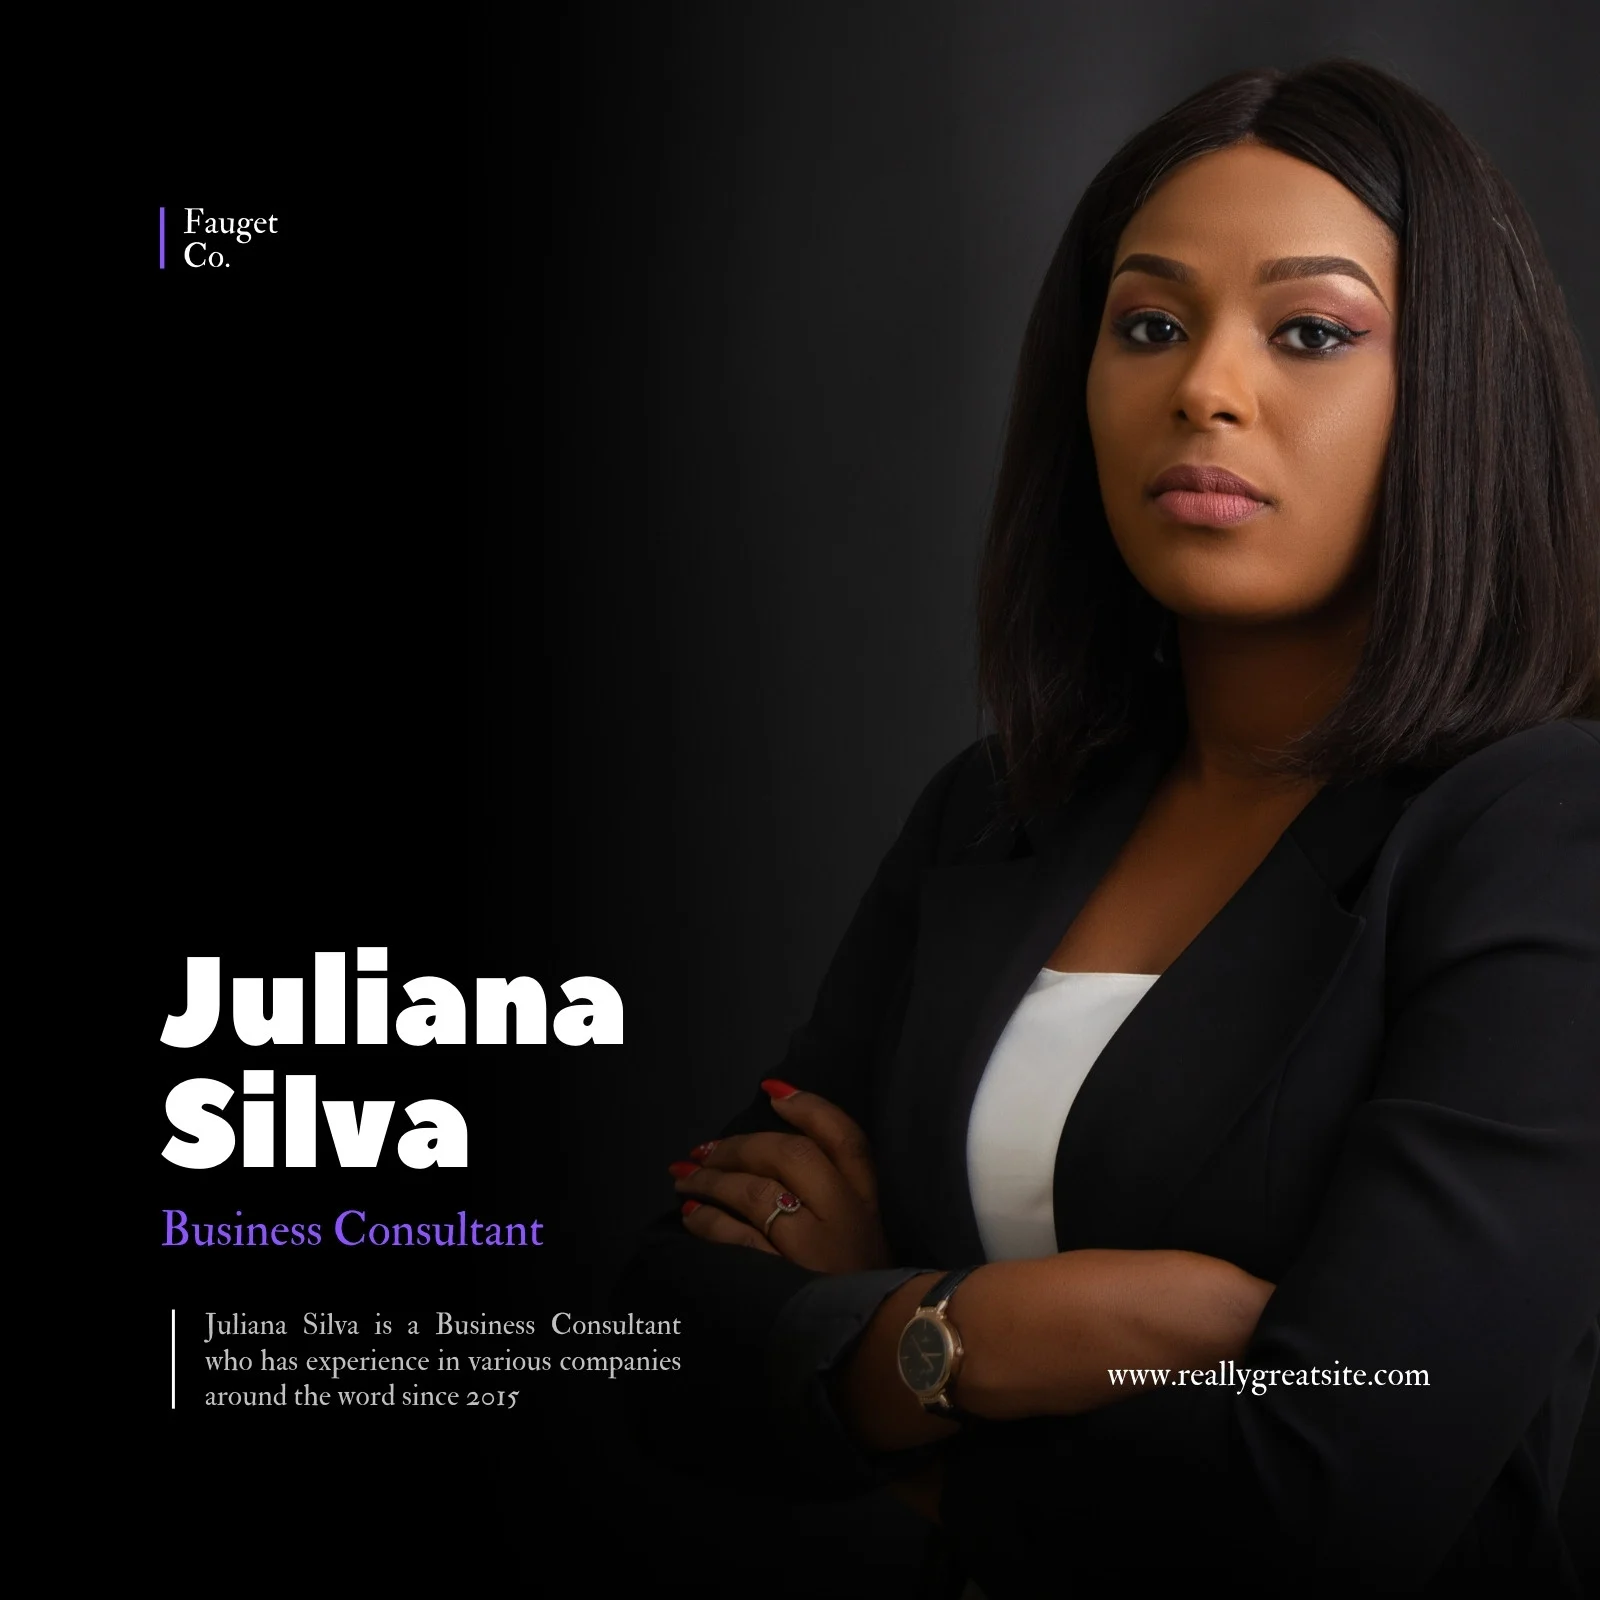
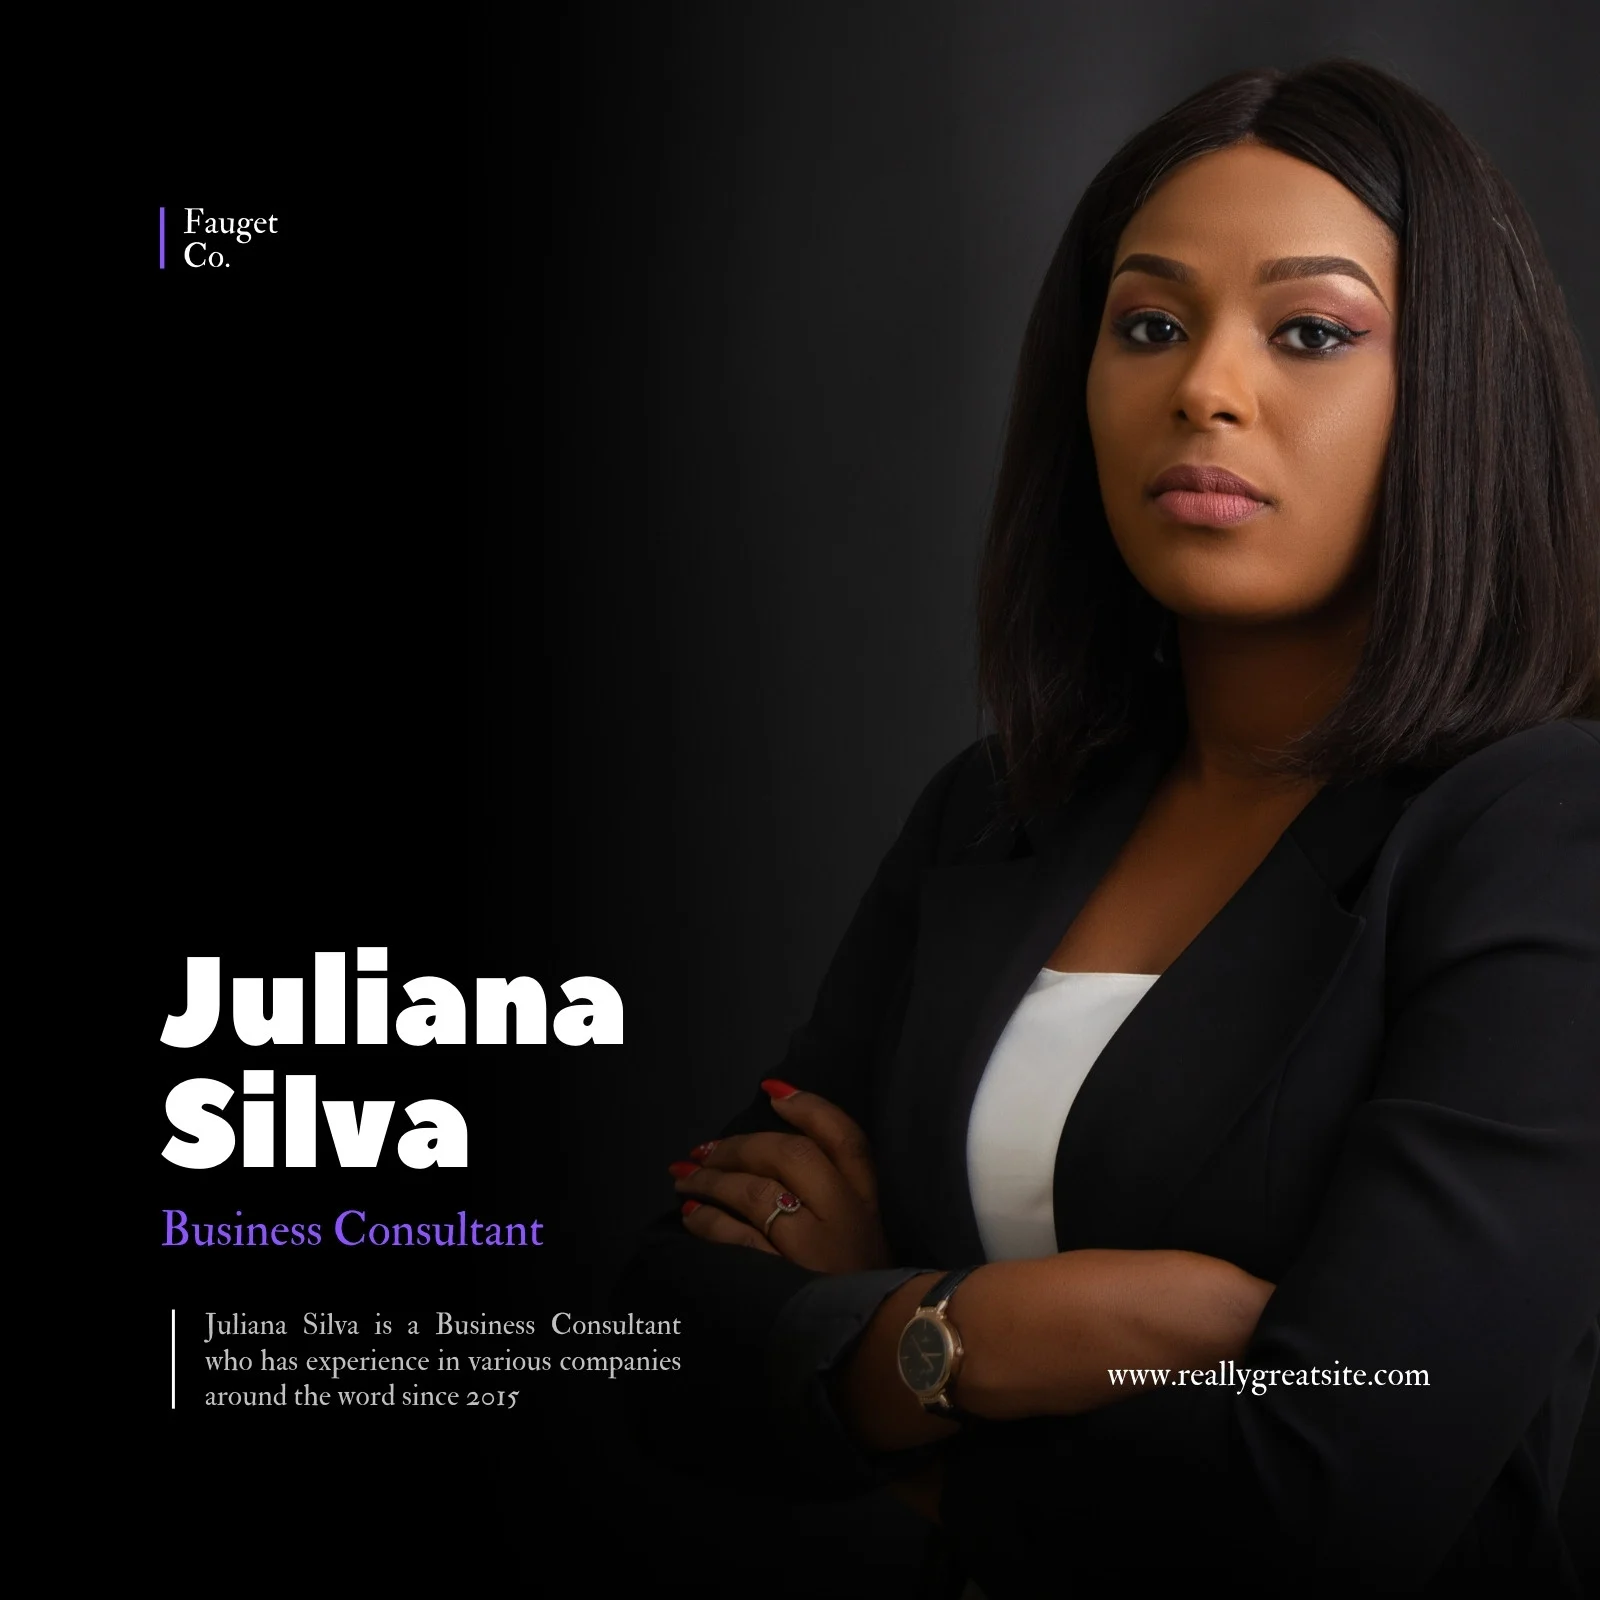
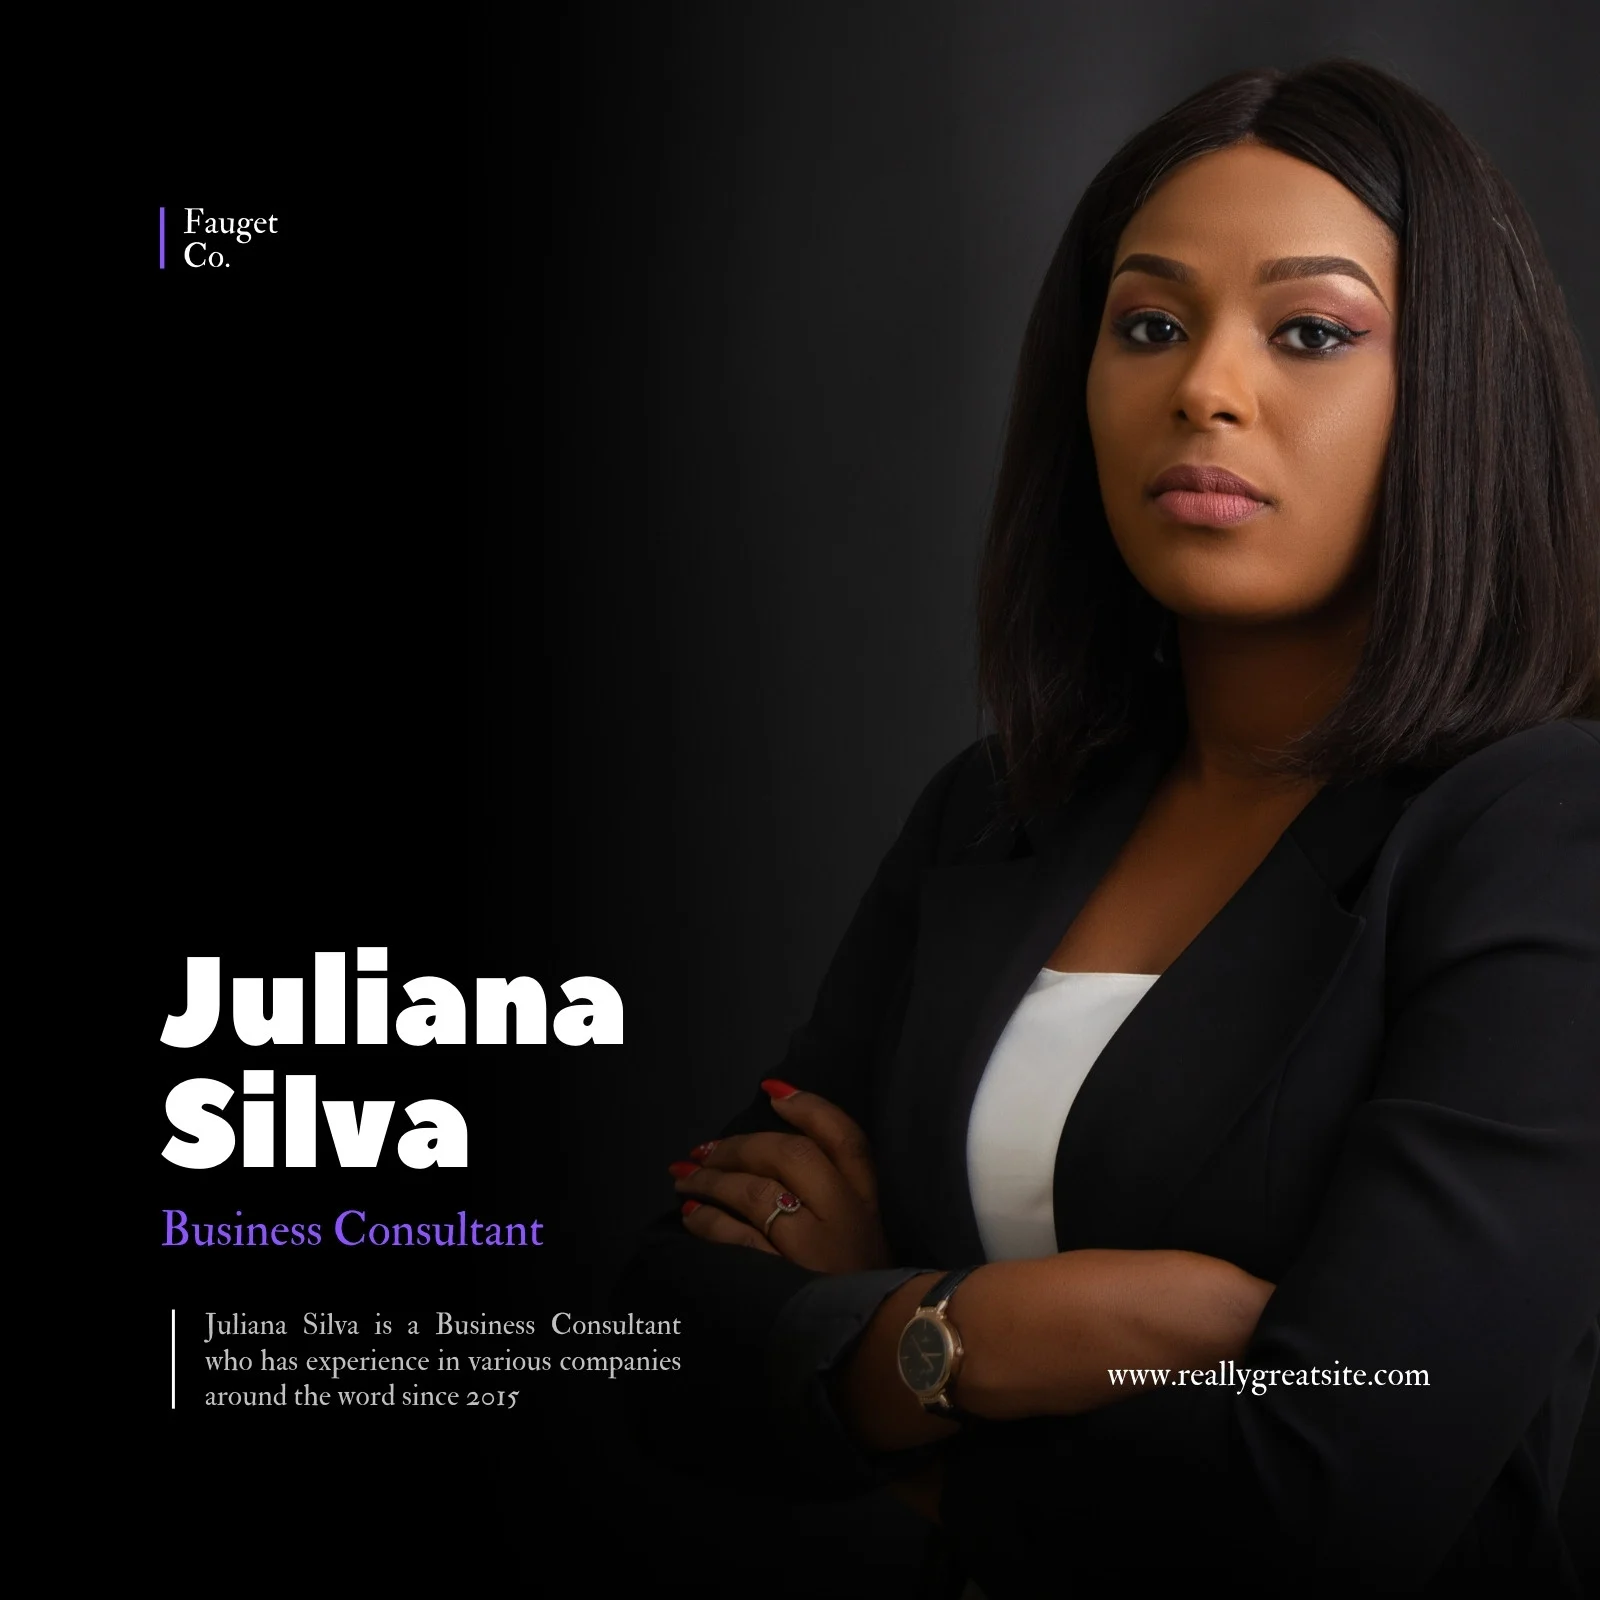


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



14:47:43 - LiteLLM:DEBUG: utils.py:366 - 

14:47:43 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
14:47:43 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            font_family: 'Arial',\n            font_size: 12,\n            text: 'Hello, world!'\n        },\n        {\n            type: 'image'\n            asset_description: '<A description of the image>'\n        },\n        ...\n    ]\n}\n"}, {'role': 'user', 'content': [{'type': 'text', 'text': 'Return ONLY a strict JSON object matching the schema from the syst
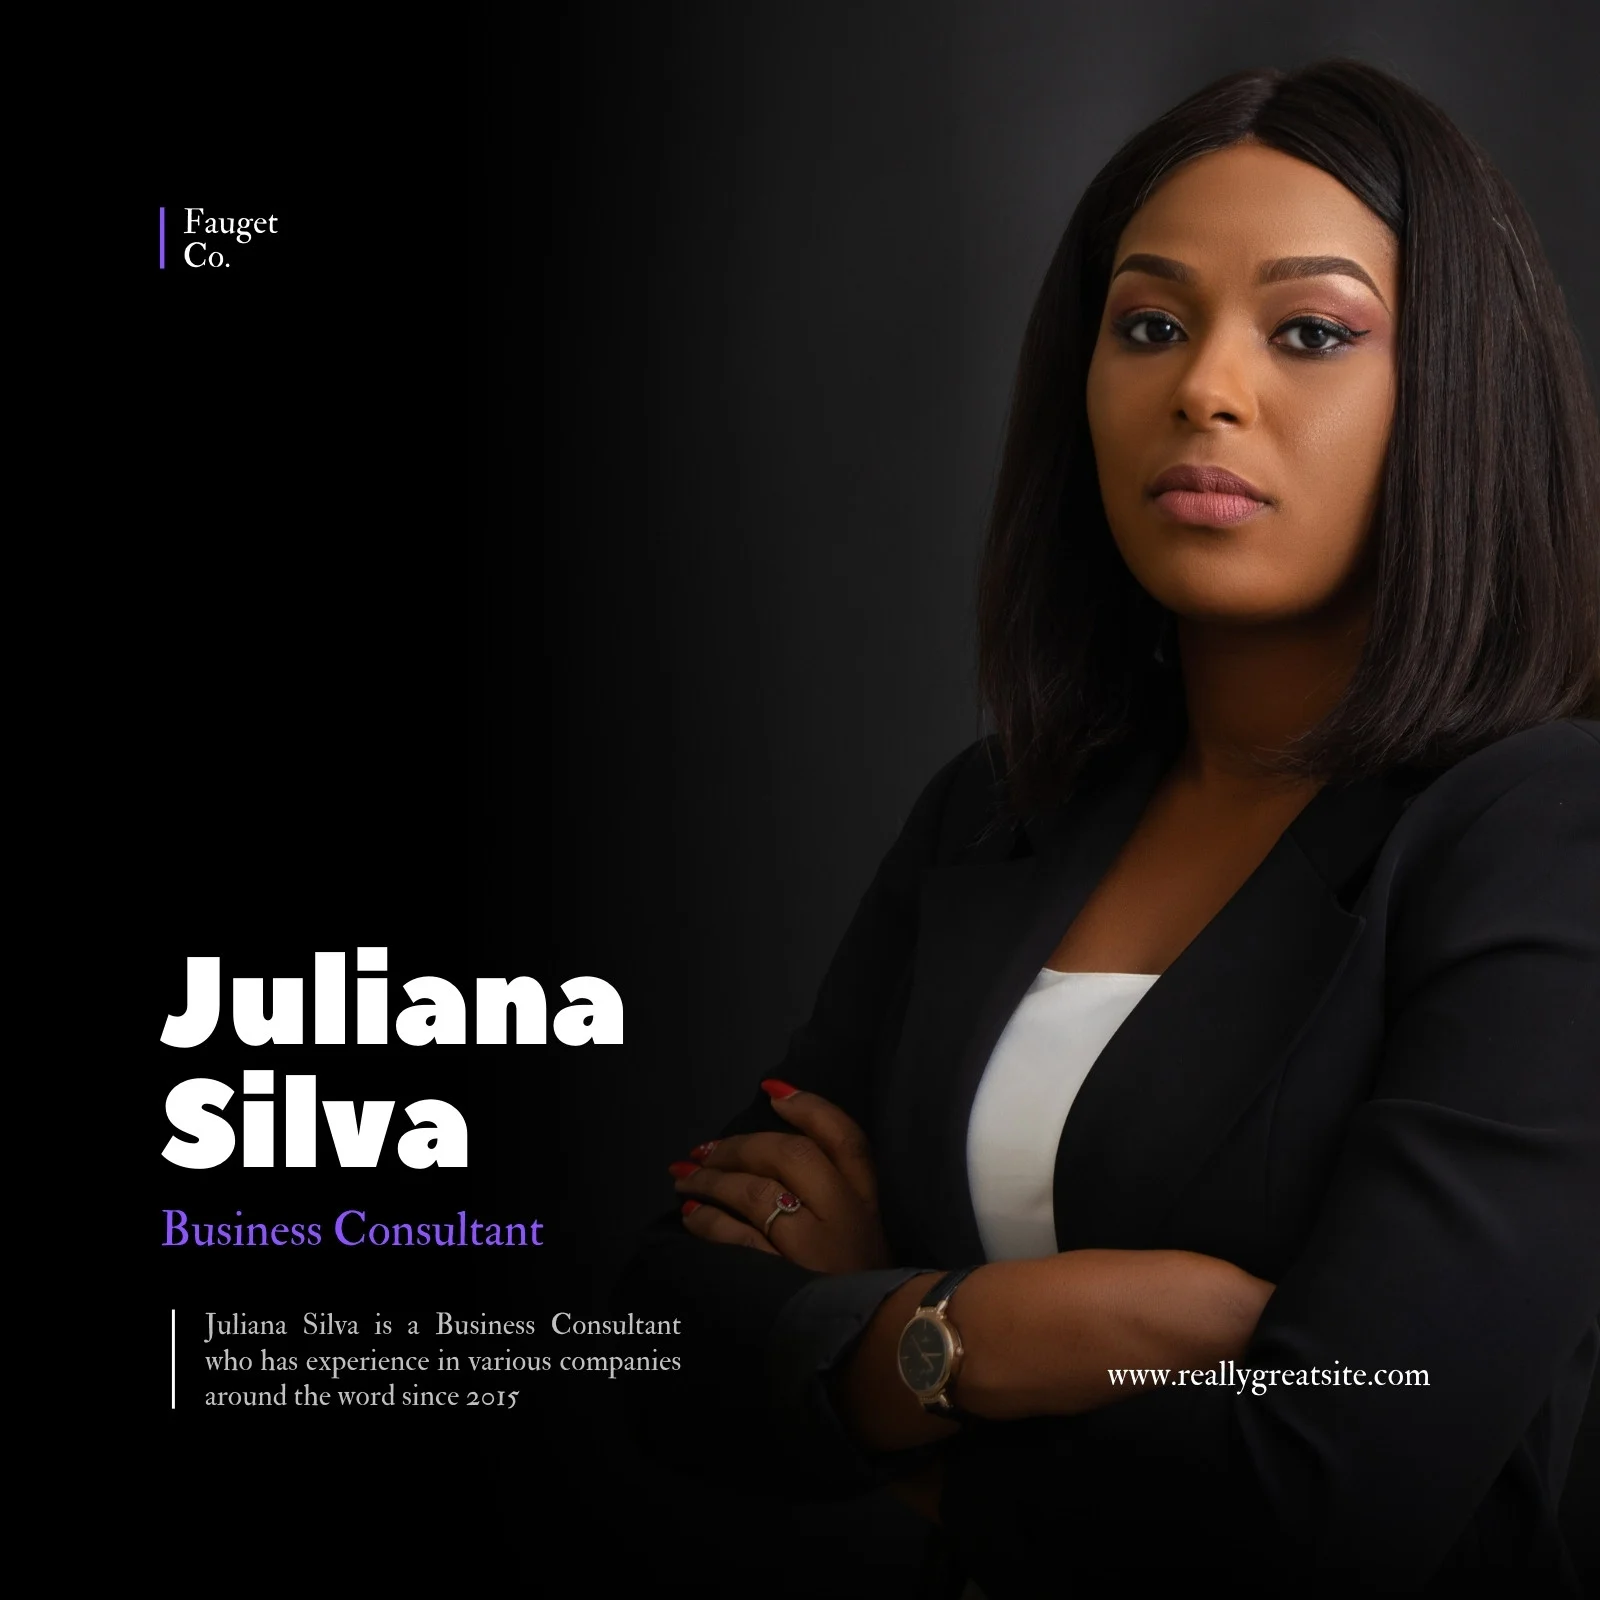
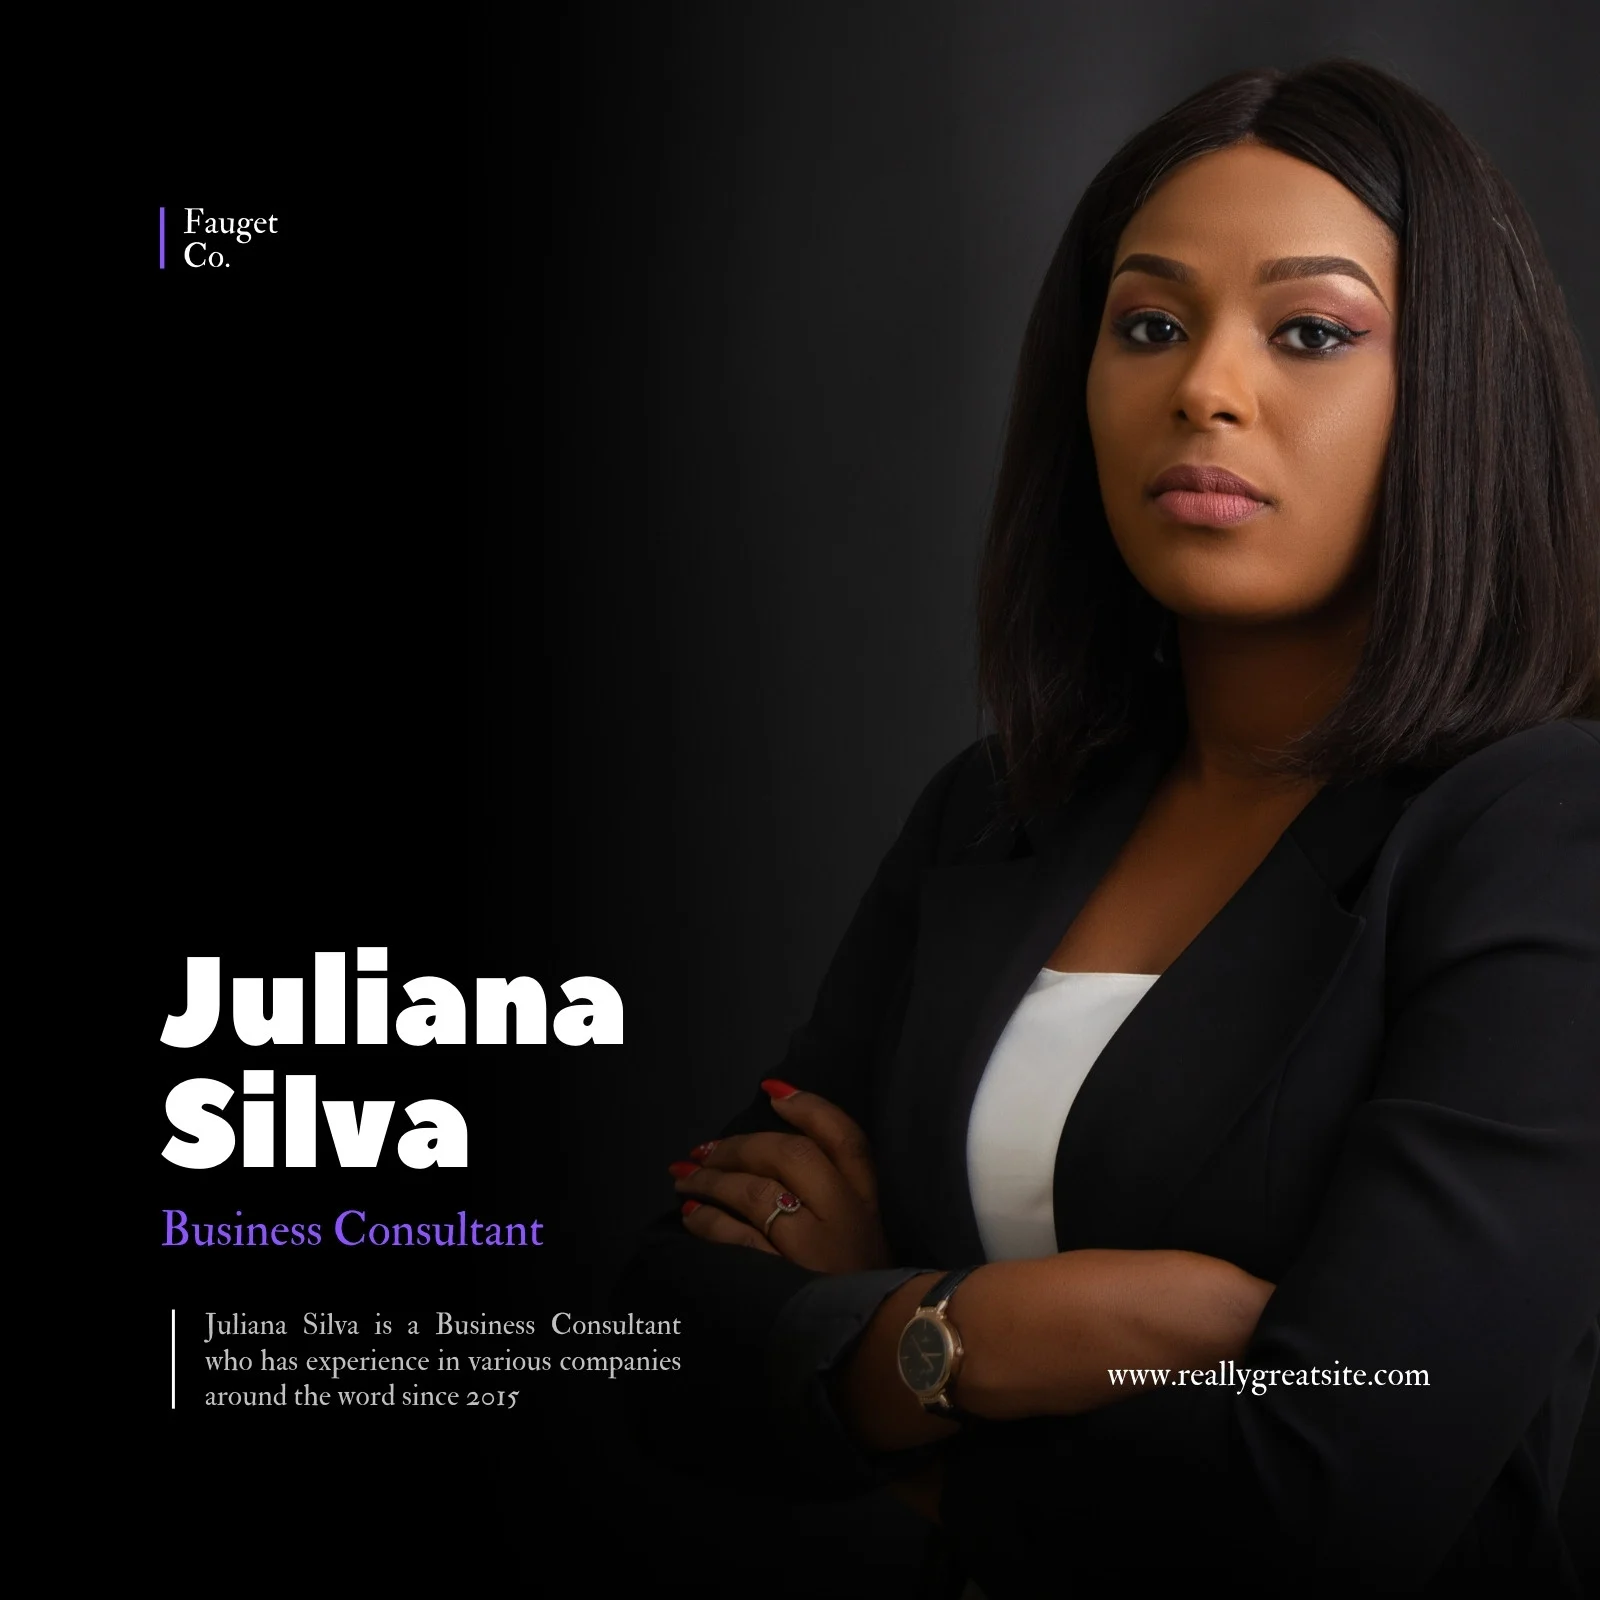
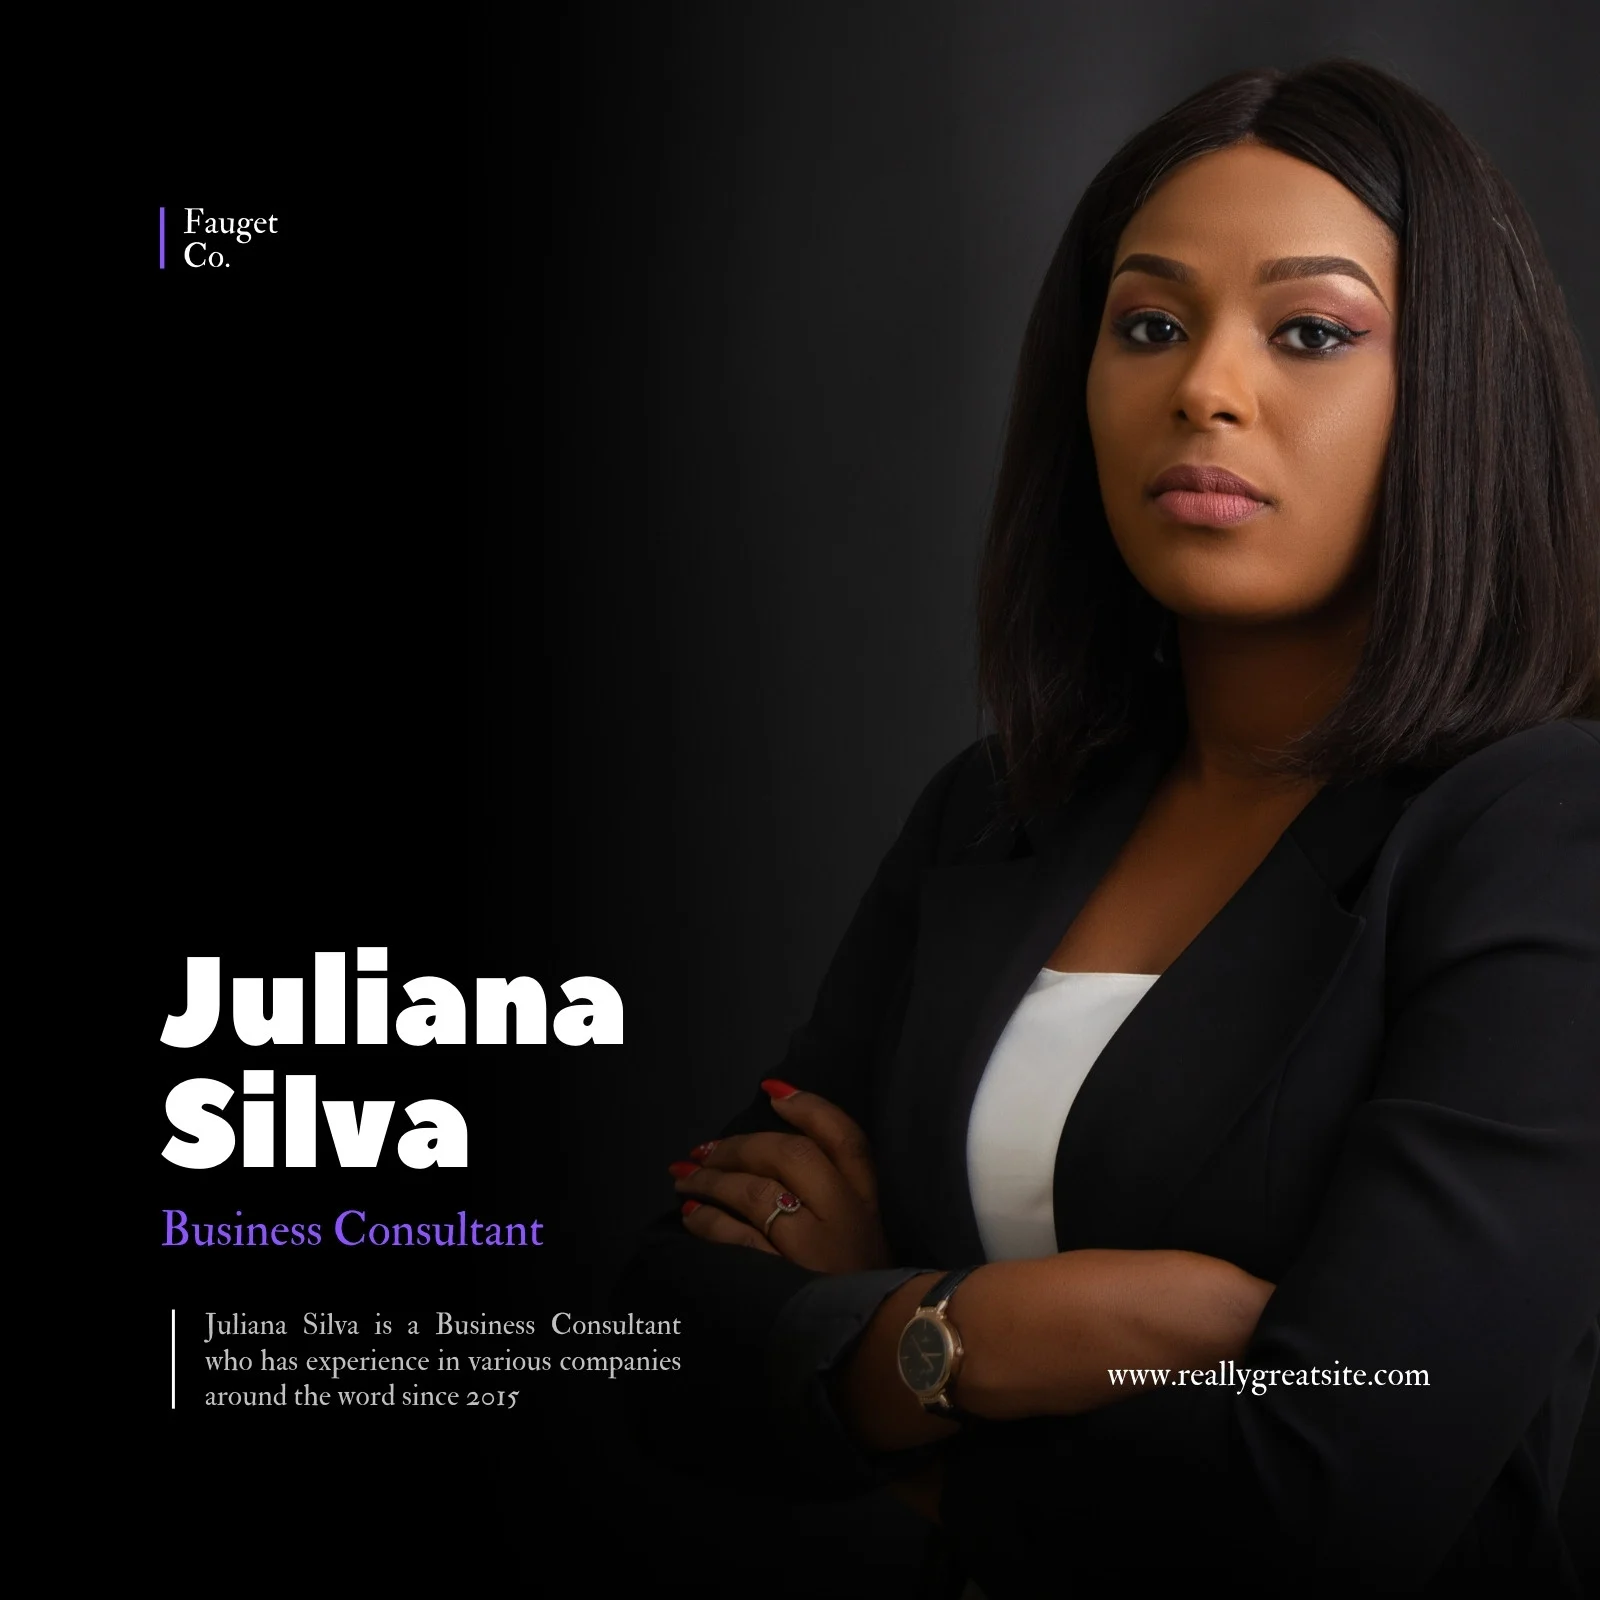


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



In [ ]:
import os, litellm
print(os.getenv("OPENAI_API_KEY", "")[-6:])   # endswith?
print((litellm.api_key or "")[-6:])

# extract a .json file for each sample in canva_samples df
OUTPUT_DIR = Path('../datasets/canva_specs')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
MODEL = os.getenv('OPENAI_MODEL', 'gpt-4o-mini')

litellm._turn_on_debug()

MIME_BY_SUFFIX = {
    '.webp': 'image/webp',
    '.png': 'image/png',
    '.jpg': 'image/jpeg',
    '.jpeg': 'image/jpeg',
}

def _to_data_url(image_path: Path) -> str:
    suffix = image_path.suffix.lower()
    mime = MIME_BY_SUFFIX.get(suffix, 'application/octet-stream')
    b64 = base64.b64encode(image_path.read_bytes()).decode('utf-8')
    return f'data:{mime};base64,{b64}'

_json_block_re = re.compile(r"```(?:json)?\s*([\s\S]*?)```", re.IGNORECASE)

def _parse_json_str(text: str):
    try:
        return json.loads(text)
    except Exception:
        m = _json_block_re.search(text)
        if m:
            try:
                return json.loads(m.group(1))
            except Exception:
                pass
    raise ValueError('Model did not return valid JSON')

instruction = (
    "Return ONLY a strict JSON object matching the schema from the system prompt. "
    "No code fences, no comments, no prose."
)

def describe_image_with_llm(image_path: Path, max_retries: int = 3, cooldown_s: float = 0.5) -> dict:
    data_url = _to_data_url(image_path)
    messages = [
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": instruction},
                {"type": "image_url", "image_url": {"url": data_url}},
            ],
        },
    ]
    last_err = None
    for attempt in range(1, max_retries + 1):
        try:
            resp = litellm.completion(model=MODEL, messages=messages, temperature=0.2, max_tokens=1500)
            text = resp["choices"][0]["message"]["content"]
            return _parse_json_str(text)
        except Exception as e:
            last_err = e
            time.sleep(cooldown_s * attempt)
    raise last_err

# Filter to image files
img_df = canva_samples_df[canva_samples_df['path'].astype(str).str.lower().str.endswith(tuple(MIME_BY_SUFFIX.keys()))].copy()
print(f"Found {len(img_df)} image files")

# Generate specs
for i, p in enumerate(img_df['path']):
    p = Path(p)
    out_path = OUTPUT_DIR / f"{p.stem}.json"
    if out_path.exists():
        if i % 10 == 0:
            print(f"[{i}/{len(img_df)}] Skip existing: {out_path.name}")
        continue
    try:
        spec = describe_image_with_llm(p)
        with out_path.open('w', encoding='utf-8') as f:
            json.dump(spec, f, ensure_ascii=False, indent=2)
        print(f"[{i}/{len(img_df)}] Wrote {out_path.name}")
    except Exception as e:
        print(f"[{i}/{len(img_df)}] ERROR {p.name}: {e}")
        with (out_path.with_suffix('.error.txt')).open('w', encoding='utf-8') as f:
            f.write(str(e))
        continue

print('Done.')
